In [3]:
!nvidia-smi

Wed Feb 16 01:39:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 495.29.05    CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
|  0%   29C    P8    21W / 310W |   3255MiB /  7979MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [2]:
df = pd.read_csv(path + 'train.csv')
df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,190590,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3416326.0,7657
1,2017,190590,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,438747025.0,5294788
2,2017,190590,40,Austria,1.664750e+11,1.948099e+10,0.0,4403.247293,4.172380e+11,3.955690e+11,8797566,NaN,78.856460,8289.029297,453206357.0,335818
3,2017,190590,56,Belgium,4.064120e+11,1.948099e+10,0.0,3980.375563,5.026980e+11,4.757400e+11,11375158,NaN,72.409200,8722.114258,706524512.0,173709
4,2017,190590,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,31329648.0,122850


In [3]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)

In [4]:
df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,190590,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3416326.0,7657
1,2017,190590,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,438747025.0,5294788
2,2017,190590,40,Austria,1.664750e+11,1.948099e+10,0.0,4403.247293,4.172380e+11,3.955690e+11,8797566,NaN,78.856460,8289.029297,453206357.0,335818
3,2017,190590,56,Belgium,4.064120e+11,1.948099e+10,0.0,3980.375563,5.026980e+11,4.757400e+11,11375158,NaN,72.409200,8722.114258,706524512.0,173709
4,2017,190590,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,31329648.0,122850


In [5]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = (x+1)
      break

df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,1,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3416326.0,7657
1,2017,1,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,438747025.0,5294788
2,2017,1,40,Austria,1.664750e+11,1.948099e+10,0.0,4403.247293,4.172380e+11,3.955690e+11,8797566,NaN,78.856460,8289.029297,453206357.0,335818
3,2017,1,56,Belgium,4.064120e+11,1.948099e+10,0.0,3980.375563,5.026980e+11,4.757400e+11,11375158,NaN,72.409200,8722.114258,706524512.0,173709
4,2017,1,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,31329648.0,122850


In [6]:
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM', 'SNDIST', 'PA_NUS_FCRF'])

In [7]:
df.head()

,HSCD,COUNTRYCD,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,1,12,4.605299e+10,1.948099e+10,30.0,1.701630e+11,1.599950e+11,41389198,46.109810,9954.009766,3416326.0,7657
1,1,36,2.284420e+11,1.948099e+10,0.0,1.329190e+12,1.208850e+12,24601860,80.223690,8329.652344,438747025.0,5294788
2,1,40,1.664750e+11,1.948099e+10,0.0,4.172380e+11,3.955690e+11,8797566,78.856460,8289.029297,453206357.0,335818
3,1,56,4.064120e+11,1.948099e+10,0.0,5.026980e+11,4.757400e+11,11375158,72.409200,8722.114258,706524512.0,173709
4,1,76,1.507490e+11,1.948099e+10,18.0,2.062830e+12,1.795700e+12,207833831,55.382403,18364.505860,31329648.0,122850


<AxesSubplot:>

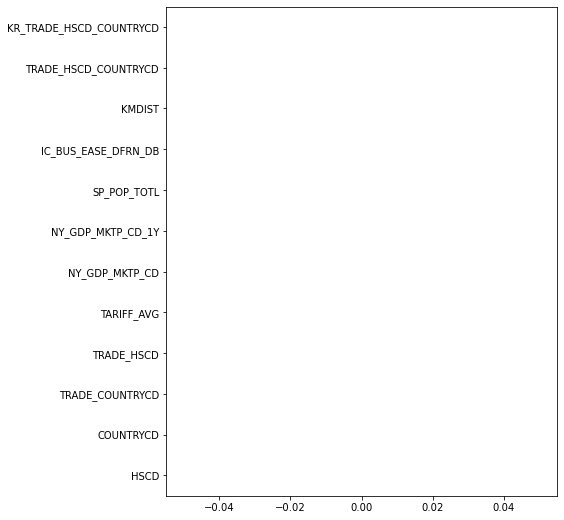

In [8]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [9]:
df.shape


(20713, 12)

In [10]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
2        0.074098
3        0.024586
4        0.392121
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 20713, dtype: float64

In [11]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

,HSCD,COUNTRYCD,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,1,12,4.605299e+10,1.948099e+10,30.0,1.701630e+11,1.599950e+11,41389198,46.109810,9954.009766,3416326.0,7657,0.007418,0.017537,106.355199,0.224130
1,1,36,2.284420e+11,1.948099e+10,0.0,1.329190e+12,1.208850e+12,24601860,80.223690,8329.652344,438747025.0,5294788,0.192061,2.252181,109.954916,1.206797
2,1,40,1.664750e+11,1.948099e+10,0.0,4.172380e+11,3.955690e+11,8797566,78.856460,8289.029297,453206357.0,335818,0.272237,2.326404,105.477932,0.074098
3,1,56,4.064120e+11,1.948099e+10,0.0,5.026980e+11,4.757400e+11,11375158,72.409200,8722.114258,706524512.0,173709,0.173844,3.626739,105.666541,0.024586
4,1,76,1.507490e+11,1.948099e+10,18.0,2.062830e+12,1.795700e+12,207833831,55.382403,18364.505860,31329648.0,122850,0.020783,0.160822,114.876093,0.392121


In [12]:
df['KMDIST'] = df['KMDIST']/100
df = df.drop(columns=['SP_POP_TOTL', 'KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [13]:
df.head()

,HSCD,COUNTRYCD,TARIFF_AVG,IC_BUS_EASE_DFRN_DB,KMDIST,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,1,12,30.0,46.109810,99.540098,0.007418,0.017537,106.355199,0.224130
1,1,36,0.0,80.223690,83.296523,0.192061,2.252181,109.954916,1.206797
2,1,40,0.0,78.856460,82.890293,0.272237,2.326404,105.477932,0.074098
3,1,56,0.0,72.409200,87.221143,0.173844,3.626739,105.666541,0.024586
4,1,76,18.0,55.382403,183.645059,0.020783,0.160822,114.876093,0.392121


In [14]:
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = (x+1)
      break
df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
df['KMDIST'] = df['KMDIST']/100 # total -> divided 10000
df['gdp_percent'] = df['gdp_percent'] / 100


######################################################################
df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,HSCD,COUNTRYCD,TARIFF_AVG,IC_BUS_EASE_DFRN_DB,KMDIST,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,1,1,0.30,0.461098,0.995401,0.007418,0.017537,1.063552,0.224130
1,1,2,0.00,0.802237,0.832965,0.192061,2.252181,1.099549,1.206797
2,1,3,0.00,0.788565,0.828903,0.272237,2.326404,1.054779,0.074098
3,1,4,0.00,0.724092,0.872211,0.173844,3.626739,1.056665,0.024586
4,1,5,0.18,0.553824,1.836451,0.020783,0.160822,1.148761,0.392121


In [15]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(20713, 9)
12427 4143 4143


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opti
torch.manual_seed(1015)
device = torch.device("cuda")

In [17]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [18]:
len(df)

20713

In [19]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

torch.Size([16570, 8])
torch.Size([16570, 1])


In [20]:
class DeepModel(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(DeepModel, self).__init__()

    self.basic = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, 256)
    self.bn1 = nn.BatchNorm1d(256)
    self.layer2 = nn.Linear(256, 64)
    self.bn2 = nn.BatchNorm1d(64)
    self.head = nn.Linear(64, out_channel)

  def forward(self, x):
    x = x.to(device)
    x = self.basic(x)
    x = F.relu(self.bn1(self.layer1(x)))
    x = F.relu(self.bn2(self.layer2(x)))
    
    return self.head(x)


# model = nn.Linear(9,1).to(device)
deepmodel = DeepModel(8, 1).to(device)
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=8, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [21]:
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-3)

In [22]:
n_epochs = 100
loss_list = []
for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel(x_train).to(device)
    cost = F.mse_loss(y_train, pred)
    loss_list.append(cost)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/100  Batch 1/259  cost : 49.296417236328125
Ep 0/100  Batch 2/259  cost : 313.2598571777344
Ep 0/100  Batch 3/259  cost : 85.5655517578125
Ep 0/100  Batch 4/259  cost : 83.75775146484375
Ep 0/100  Batch 5/259  cost : 98.54607391357422
Ep 0/100  Batch 6/259  cost : 206.50180053710938
Ep 0/100  Batch 7/259  cost : 31.950672149658203
Ep 0/100  Batch 8/259  cost : 53.09393310546875
Ep 0/100  Batch 9/259  cost : 119.47900390625
Ep 0/100  Batch 10/259  cost : 363.13873291015625
Ep 0/100  Batch 11/259  cost : 17.5965576171875
Ep 0/100  Batch 12/259  cost : 24.4342041015625
Ep 0/100  Batch 13/259  cost : 272.6807861328125
Ep 0/100  Batch 14/259  cost : 60.121280670166016
Ep 0/100  Batch 15/259  cost : 160.4810791015625
Ep 0/100  Batch 16/259  cost : 82.30889892578125
Ep 0/100  Batch 17/259  cost : 172411.890625
Ep 0/100  Batch 18/259  cost : 371.37078857421875
Ep 0/100  Batch 19/259  cost : 143.10464477539062
Ep 0/100  Batch 20/259  cost : 195.32192993164062
Ep 0/100  Batch 21/259  cost :

Ep 0/100  Batch 169/259  cost : 24.660789489746094
Ep 0/100  Batch 170/259  cost : 34.148292541503906
Ep 0/100  Batch 171/259  cost : 385.3502197265625
Ep 0/100  Batch 172/259  cost : 42.159332275390625
Ep 0/100  Batch 173/259  cost : 74.50048065185547
Ep 0/100  Batch 174/259  cost : 116.3999252319336
Ep 0/100  Batch 175/259  cost : 25.11138916015625
Ep 0/100  Batch 176/259  cost : 193.04360961914062
Ep 0/100  Batch 177/259  cost : 436.7381286621094
Ep 0/100  Batch 178/259  cost : 90.00347900390625
Ep 0/100  Batch 179/259  cost : 175922.640625
Ep 0/100  Batch 180/259  cost : 93720.8125
Ep 0/100  Batch 181/259  cost : 186.08587646484375
Ep 0/100  Batch 182/259  cost : 241.1670379638672
Ep 0/100  Batch 183/259  cost : 338.81549072265625
Ep 0/100  Batch 184/259  cost : 376.0646057128906
Ep 0/100  Batch 185/259  cost : 1765.672607421875
Ep 0/100  Batch 186/259  cost : 438.7171936035156
Ep 0/100  Batch 187/259  cost : 310.50787353515625
Ep 0/100  Batch 188/259  cost : 322.51885986328125
Ep 

Ep 1/100  Batch 80/259  cost : 1516.8973388671875
Ep 1/100  Batch 81/259  cost : 489.738037109375
Ep 1/100  Batch 82/259  cost : 158.5882568359375
Ep 1/100  Batch 83/259  cost : 2537.333984375
Ep 1/100  Batch 84/259  cost : 28.827913284301758
Ep 1/100  Batch 85/259  cost : 113.5096664428711
Ep 1/100  Batch 86/259  cost : 83.95831298828125
Ep 1/100  Batch 87/259  cost : 1022.7081298828125
Ep 1/100  Batch 88/259  cost : 92.67922973632812
Ep 1/100  Batch 89/259  cost : 86.3829116821289
Ep 1/100  Batch 90/259  cost : 46.759239196777344
Ep 1/100  Batch 91/259  cost : 29.750988006591797
Ep 1/100  Batch 92/259  cost : 34.13279724121094
Ep 1/100  Batch 93/259  cost : 47.876399993896484
Ep 1/100  Batch 94/259  cost : 46.35319137573242
Ep 1/100  Batch 95/259  cost : 66.41417694091797
Ep 1/100  Batch 96/259  cost : 58.91920852661133
Ep 1/100  Batch 97/259  cost : 50.510040283203125
Ep 1/100  Batch 98/259  cost : 196.1156005859375
Ep 1/100  Batch 99/259  cost : 28.013320922851562
Ep 1/100  Batch 1

Ep 1/100  Batch 250/259  cost : 1812.2725830078125
Ep 1/100  Batch 251/259  cost : 1166.9990234375
Ep 1/100  Batch 252/259  cost : 184.1497802734375
Ep 1/100  Batch 253/259  cost : 172.49368286132812
Ep 1/100  Batch 254/259  cost : 330.59442138671875
Ep 1/100  Batch 255/259  cost : 223.41806030273438
Ep 1/100  Batch 256/259  cost : 109.21249389648438
Ep 1/100  Batch 257/259  cost : 244.09976196289062
Ep 1/100  Batch 258/259  cost : 149.3434600830078
Ep 1/100  Batch 259/259  cost : 259.76153564453125
Ep 2/100  Batch 1/259  cost : 110.03297424316406
Ep 2/100  Batch 2/259  cost : 46.670963287353516
Ep 2/100  Batch 3/259  cost : 395.3345947265625
Ep 2/100  Batch 4/259  cost : 44.93952178955078
Ep 2/100  Batch 5/259  cost : 92.77220153808594
Ep 2/100  Batch 6/259  cost : 58.007713317871094
Ep 2/100  Batch 7/259  cost : 51.96159362792969
Ep 2/100  Batch 8/259  cost : 166.05059814453125
Ep 2/100  Batch 9/259  cost : 18.288816452026367
Ep 2/100  Batch 10/259  cost : 11.81682014465332
Ep 2/100 

Ep 2/100  Batch 162/259  cost : 25.822860717773438
Ep 2/100  Batch 163/259  cost : 41.0504150390625
Ep 2/100  Batch 164/259  cost : 61.103965759277344
Ep 2/100  Batch 165/259  cost : 174.16958618164062
Ep 2/100  Batch 166/259  cost : 70.76446533203125
Ep 2/100  Batch 167/259  cost : 48.31439971923828
Ep 2/100  Batch 168/259  cost : 18.671184539794922
Ep 2/100  Batch 169/259  cost : 61.09646987915039
Ep 2/100  Batch 170/259  cost : 44.93769073486328
Ep 2/100  Batch 171/259  cost : 27.477558135986328
Ep 2/100  Batch 172/259  cost : 67.7042236328125
Ep 2/100  Batch 173/259  cost : 121.77659606933594
Ep 2/100  Batch 174/259  cost : 40.48003387451172
Ep 2/100  Batch 175/259  cost : 30.61129379272461
Ep 2/100  Batch 176/259  cost : 36.891807556152344
Ep 2/100  Batch 177/259  cost : 72.87666320800781
Ep 2/100  Batch 178/259  cost : 53.09833908081055
Ep 2/100  Batch 179/259  cost : 33.603851318359375
Ep 2/100  Batch 180/259  cost : 37.927947998046875
Ep 2/100  Batch 181/259  cost : 17.96602058

Ep 3/100  Batch 74/259  cost : 34.82695007324219
Ep 3/100  Batch 75/259  cost : 43.1812744140625
Ep 3/100  Batch 76/259  cost : 24.242168426513672
Ep 3/100  Batch 77/259  cost : 18.15418243408203
Ep 3/100  Batch 78/259  cost : 110.29716491699219
Ep 3/100  Batch 79/259  cost : 100.55418395996094
Ep 3/100  Batch 80/259  cost : 4235.00341796875
Ep 3/100  Batch 81/259  cost : 53.88606643676758
Ep 3/100  Batch 82/259  cost : 97.07643127441406
Ep 3/100  Batch 83/259  cost : 5630.63134765625
Ep 3/100  Batch 84/259  cost : 20.127201080322266
Ep 3/100  Batch 85/259  cost : 21.900779724121094
Ep 3/100  Batch 86/259  cost : 81.80949401855469
Ep 3/100  Batch 87/259  cost : 39.575984954833984
Ep 3/100  Batch 88/259  cost : 113.71710968017578
Ep 3/100  Batch 89/259  cost : 72.92527770996094
Ep 3/100  Batch 90/259  cost : 56.565757751464844
Ep 3/100  Batch 91/259  cost : 38.280914306640625
Ep 3/100  Batch 92/259  cost : 68.1107177734375
Ep 3/100  Batch 93/259  cost : 28.82189178466797
Ep 3/100  Batch

Ep 3/100  Batch 245/259  cost : 1108.762939453125
Ep 3/100  Batch 246/259  cost : 157.18101501464844
Ep 3/100  Batch 247/259  cost : 50.02969741821289
Ep 3/100  Batch 248/259  cost : 24.97063636779785
Ep 3/100  Batch 249/259  cost : 67.38053894042969
Ep 3/100  Batch 250/259  cost : 136.3468475341797
Ep 3/100  Batch 251/259  cost : 22.4781436920166
Ep 3/100  Batch 252/259  cost : 21.84670639038086
Ep 3/100  Batch 253/259  cost : 18972.4921875
Ep 3/100  Batch 254/259  cost : 42.70055389404297
Ep 3/100  Batch 255/259  cost : 156.532958984375
Ep 3/100  Batch 256/259  cost : 53.93766784667969
Ep 3/100  Batch 257/259  cost : 108.37683868408203
Ep 3/100  Batch 258/259  cost : 129.6985626220703
Ep 3/100  Batch 259/259  cost : 46.001346588134766
Ep 4/100  Batch 1/259  cost : 62.60730743408203
Ep 4/100  Batch 2/259  cost : 65.78751373291016
Ep 4/100  Batch 3/259  cost : 74.83668518066406
Ep 4/100  Batch 4/259  cost : 149.15509033203125
Ep 4/100  Batch 5/259  cost : 50.917354583740234
Ep 4/100  B

Ep 4/100  Batch 156/259  cost : 63.90668869018555
Ep 4/100  Batch 157/259  cost : 138.05145263671875
Ep 4/100  Batch 158/259  cost : 1373.486328125
Ep 4/100  Batch 159/259  cost : 515.040283203125
Ep 4/100  Batch 160/259  cost : 183.81065368652344
Ep 4/100  Batch 161/259  cost : 54.014495849609375
Ep 4/100  Batch 162/259  cost : 36.98381042480469
Ep 4/100  Batch 163/259  cost : 260.6269226074219
Ep 4/100  Batch 164/259  cost : 102.39225006103516
Ep 4/100  Batch 165/259  cost : 150.76504516601562
Ep 4/100  Batch 166/259  cost : 337.465576171875
Ep 4/100  Batch 167/259  cost : 25.692258834838867
Ep 4/100  Batch 168/259  cost : 40.36257553100586
Ep 4/100  Batch 169/259  cost : 54.422630310058594
Ep 4/100  Batch 170/259  cost : 31.874832153320312
Ep 4/100  Batch 171/259  cost : 4142.93310546875
Ep 4/100  Batch 172/259  cost : 94.18689727783203
Ep 4/100  Batch 173/259  cost : 1805.6640625
Ep 4/100  Batch 174/259  cost : 79.24828338623047
Ep 4/100  Batch 175/259  cost : 66.01522827148438
Ep 

Ep 5/100  Batch 67/259  cost : 35.140350341796875
Ep 5/100  Batch 68/259  cost : 118.54804992675781
Ep 5/100  Batch 69/259  cost : 16.441913604736328
Ep 5/100  Batch 70/259  cost : 72.03671264648438
Ep 5/100  Batch 71/259  cost : 132.126220703125
Ep 5/100  Batch 72/259  cost : 115.44639587402344
Ep 5/100  Batch 73/259  cost : 157.14431762695312
Ep 5/100  Batch 74/259  cost : 28.06146240234375
Ep 5/100  Batch 75/259  cost : 11.817190170288086
Ep 5/100  Batch 76/259  cost : 45.59790802001953
Ep 5/100  Batch 77/259  cost : 208.39979553222656
Ep 5/100  Batch 78/259  cost : 25.93459701538086
Ep 5/100  Batch 79/259  cost : 218.95535278320312
Ep 5/100  Batch 80/259  cost : 20.344039916992188
Ep 5/100  Batch 81/259  cost : 148.94602966308594
Ep 5/100  Batch 82/259  cost : 81.64254760742188
Ep 5/100  Batch 83/259  cost : 217.43807983398438
Ep 5/100  Batch 84/259  cost : 83.68247985839844
Ep 5/100  Batch 85/259  cost : 223.1403350830078
Ep 5/100  Batch 86/259  cost : 39.41212844848633
Ep 5/100  

Ep 5/100  Batch 237/259  cost : 263.3658142089844
Ep 5/100  Batch 238/259  cost : 184.86282348632812
Ep 5/100  Batch 239/259  cost : 99.467041015625
Ep 5/100  Batch 240/259  cost : 176024.53125
Ep 5/100  Batch 241/259  cost : 139.7113800048828
Ep 5/100  Batch 242/259  cost : 2381.71142578125
Ep 5/100  Batch 243/259  cost : 52.311439514160156
Ep 5/100  Batch 244/259  cost : 5609.19287109375
Ep 5/100  Batch 245/259  cost : 94.9746322631836
Ep 5/100  Batch 246/259  cost : 189.11448669433594
Ep 5/100  Batch 247/259  cost : 50.894859313964844
Ep 5/100  Batch 248/259  cost : 58.18779373168945
Ep 5/100  Batch 249/259  cost : 58.994544982910156
Ep 5/100  Batch 250/259  cost : 55.255393981933594
Ep 5/100  Batch 251/259  cost : 47.961021423339844
Ep 5/100  Batch 252/259  cost : 298.8475646972656
Ep 5/100  Batch 253/259  cost : 45.43727111816406
Ep 5/100  Batch 254/259  cost : 70.23629760742188
Ep 5/100  Batch 255/259  cost : 83.52742004394531
Ep 5/100  Batch 256/259  cost : 178.47042846679688
Ep

Ep 6/100  Batch 148/259  cost : 27.61539077758789
Ep 6/100  Batch 149/259  cost : 38.26805114746094
Ep 6/100  Batch 150/259  cost : 39.572540283203125
Ep 6/100  Batch 151/259  cost : 29.4462890625
Ep 6/100  Batch 152/259  cost : 56.2833251953125
Ep 6/100  Batch 153/259  cost : 182.02052307128906
Ep 6/100  Batch 154/259  cost : 51.96337127685547
Ep 6/100  Batch 155/259  cost : 106.7419204711914
Ep 6/100  Batch 156/259  cost : 24.3182315826416
Ep 6/100  Batch 157/259  cost : 134.03695678710938
Ep 6/100  Batch 158/259  cost : 45.89388656616211
Ep 6/100  Batch 159/259  cost : 515.3365478515625
Ep 6/100  Batch 160/259  cost : 46.191375732421875
Ep 6/100  Batch 161/259  cost : 50.689117431640625
Ep 6/100  Batch 162/259  cost : 1757.646240234375
Ep 6/100  Batch 163/259  cost : 29.50124740600586
Ep 6/100  Batch 164/259  cost : 102.7157974243164
Ep 6/100  Batch 165/259  cost : 24.259151458740234
Ep 6/100  Batch 166/259  cost : 46.46154022216797
Ep 6/100  Batch 167/259  cost : 425.7067565917969


Ep 7/100  Batch 60/259  cost : 109.6051025390625
Ep 7/100  Batch 61/259  cost : 1879.151123046875
Ep 7/100  Batch 62/259  cost : 59.0606575012207
Ep 7/100  Batch 63/259  cost : 41.69765853881836
Ep 7/100  Batch 64/259  cost : 37.19031524658203
Ep 7/100  Batch 65/259  cost : 151.88031005859375
Ep 7/100  Batch 66/259  cost : 51.43999481201172
Ep 7/100  Batch 67/259  cost : 30.648290634155273
Ep 7/100  Batch 68/259  cost : 14836.1494140625
Ep 7/100  Batch 69/259  cost : 252.35614013671875
Ep 7/100  Batch 70/259  cost : 67.83997344970703
Ep 7/100  Batch 71/259  cost : 59.25777816772461
Ep 7/100  Batch 72/259  cost : 105.22642517089844
Ep 7/100  Batch 73/259  cost : 85.59916687011719
Ep 7/100  Batch 74/259  cost : 1876.5
Ep 7/100  Batch 75/259  cost : 33.646636962890625
Ep 7/100  Batch 76/259  cost : 18.98651123046875
Ep 7/100  Batch 77/259  cost : 215.53237915039062
Ep 7/100  Batch 78/259  cost : 106.02978515625
Ep 7/100  Batch 79/259  cost : 72.48225402832031
Ep 7/100  Batch 80/259  cost 

Ep 7/100  Batch 230/259  cost : 271.83233642578125
Ep 7/100  Batch 231/259  cost : 155.91998291015625
Ep 7/100  Batch 232/259  cost : 51.438804626464844
Ep 7/100  Batch 233/259  cost : 38.09553527832031
Ep 7/100  Batch 234/259  cost : 494.2974548339844
Ep 7/100  Batch 235/259  cost : 24.857555389404297
Ep 7/100  Batch 236/259  cost : 156.9229736328125
Ep 7/100  Batch 237/259  cost : 170.88003540039062
Ep 7/100  Batch 238/259  cost : 57.78664779663086
Ep 7/100  Batch 239/259  cost : 109.77799987792969
Ep 7/100  Batch 240/259  cost : 24.439712524414062
Ep 7/100  Batch 241/259  cost : 106.75631713867188
Ep 7/100  Batch 242/259  cost : 15.516063690185547
Ep 7/100  Batch 243/259  cost : 143.99282836914062
Ep 7/100  Batch 244/259  cost : 80.33946990966797
Ep 7/100  Batch 245/259  cost : 31.413129806518555
Ep 7/100  Batch 246/259  cost : 108.57341003417969
Ep 7/100  Batch 247/259  cost : 48.14146041870117
Ep 7/100  Batch 248/259  cost : 103.10199737548828
Ep 7/100  Batch 249/259  cost : 13.26

Ep 8/100  Batch 141/259  cost : 66.5660400390625
Ep 8/100  Batch 142/259  cost : 1874.1707763671875
Ep 8/100  Batch 143/259  cost : 29.575599670410156
Ep 8/100  Batch 144/259  cost : 234.3121337890625
Ep 8/100  Batch 145/259  cost : 160.92071533203125
Ep 8/100  Batch 146/259  cost : 25.10400390625
Ep 8/100  Batch 147/259  cost : 82.65726470947266
Ep 8/100  Batch 148/259  cost : 36.353355407714844
Ep 8/100  Batch 149/259  cost : 305.41961669921875
Ep 8/100  Batch 150/259  cost : 175.5272979736328
Ep 8/100  Batch 151/259  cost : 36.54208755493164
Ep 8/100  Batch 152/259  cost : 24.476547241210938
Ep 8/100  Batch 153/259  cost : 145.0304412841797
Ep 8/100  Batch 154/259  cost : 163.2451629638672
Ep 8/100  Batch 155/259  cost : 81.0057601928711
Ep 8/100  Batch 156/259  cost : 19071.201171875
Ep 8/100  Batch 157/259  cost : 48.56451416015625
Ep 8/100  Batch 158/259  cost : 54.68142318725586
Ep 8/100  Batch 159/259  cost : 103.53033447265625
Ep 8/100  Batch 160/259  cost : 115.91896057128906

Ep 9/100  Batch 52/259  cost : 182.50076293945312
Ep 9/100  Batch 53/259  cost : 100.2948989868164
Ep 9/100  Batch 54/259  cost : 47.78077697753906
Ep 9/100  Batch 55/259  cost : 37.244590759277344
Ep 9/100  Batch 56/259  cost : 45.15449523925781
Ep 9/100  Batch 57/259  cost : 34.973270416259766
Ep 9/100  Batch 58/259  cost : 19277.65625
Ep 9/100  Batch 59/259  cost : 34.291194915771484
Ep 9/100  Batch 60/259  cost : 118.65410614013672
Ep 9/100  Batch 61/259  cost : 30.056434631347656
Ep 9/100  Batch 62/259  cost : 59.46452331542969
Ep 9/100  Batch 63/259  cost : 136.71743774414062
Ep 9/100  Batch 64/259  cost : 174.23277282714844
Ep 9/100  Batch 65/259  cost : 269.8839111328125
Ep 9/100  Batch 66/259  cost : 50.88580322265625
Ep 9/100  Batch 67/259  cost : 31.190767288208008
Ep 9/100  Batch 68/259  cost : 34.564666748046875
Ep 9/100  Batch 69/259  cost : 31.600053787231445
Ep 9/100  Batch 70/259  cost : 25.377153396606445
Ep 9/100  Batch 71/259  cost : 38.10218811035156
Ep 9/100  Batc

Ep 9/100  Batch 223/259  cost : 36.96741485595703
Ep 9/100  Batch 224/259  cost : 130.57061767578125
Ep 9/100  Batch 225/259  cost : 73.78472900390625
Ep 9/100  Batch 226/259  cost : 48.15653610229492
Ep 9/100  Batch 227/259  cost : 255.6497802734375
Ep 9/100  Batch 228/259  cost : 308.9792175292969
Ep 9/100  Batch 229/259  cost : 23.520587921142578
Ep 9/100  Batch 230/259  cost : 122.87406921386719
Ep 9/100  Batch 231/259  cost : 60.13819885253906
Ep 9/100  Batch 232/259  cost : 304.62066650390625
Ep 9/100  Batch 233/259  cost : 99.16195678710938
Ep 9/100  Batch 234/259  cost : 4972.8876953125
Ep 9/100  Batch 235/259  cost : 34.28677749633789
Ep 9/100  Batch 236/259  cost : 156.70352172851562
Ep 9/100  Batch 237/259  cost : 98.62041473388672
Ep 9/100  Batch 238/259  cost : 50.428138732910156
Ep 9/100  Batch 239/259  cost : 46.99323654174805
Ep 9/100  Batch 240/259  cost : 1066.4554443359375
Ep 9/100  Batch 241/259  cost : 37.99516296386719
Ep 9/100  Batch 242/259  cost : 43.9733734130

Ep 10/100  Batch 134/259  cost : 49.745018005371094
Ep 10/100  Batch 135/259  cost : 286.3424987792969
Ep 10/100  Batch 136/259  cost : 35.52919006347656
Ep 10/100  Batch 137/259  cost : 1633.5372314453125
Ep 10/100  Batch 138/259  cost : 54.92751693725586
Ep 10/100  Batch 139/259  cost : 27.995010375976562
Ep 10/100  Batch 140/259  cost : 59.70938491821289
Ep 10/100  Batch 141/259  cost : 339.54193115234375
Ep 10/100  Batch 142/259  cost : 5707.5009765625
Ep 10/100  Batch 143/259  cost : 25.52629852294922
Ep 10/100  Batch 144/259  cost : 23.54646873474121
Ep 10/100  Batch 145/259  cost : 18.856346130371094
Ep 10/100  Batch 146/259  cost : 110.28428649902344
Ep 10/100  Batch 147/259  cost : 38.08530807495117
Ep 10/100  Batch 148/259  cost : 30.87085723876953
Ep 10/100  Batch 149/259  cost : 80.50422668457031
Ep 10/100  Batch 150/259  cost : 1742.344970703125
Ep 10/100  Batch 151/259  cost : 80.96734619140625
Ep 10/100  Batch 152/259  cost : 58.27598571777344
Ep 10/100  Batch 153/259  c

Ep 11/100  Batch 45/259  cost : 97.14311218261719
Ep 11/100  Batch 46/259  cost : 146.21249389648438
Ep 11/100  Batch 47/259  cost : 52.23984909057617
Ep 11/100  Batch 48/259  cost : 232.26611328125
Ep 11/100  Batch 49/259  cost : 103.21504211425781
Ep 11/100  Batch 50/259  cost : 43.22208023071289
Ep 11/100  Batch 51/259  cost : 101.88809204101562
Ep 11/100  Batch 52/259  cost : 3450.5712890625
Ep 11/100  Batch 53/259  cost : 35.83786392211914
Ep 11/100  Batch 54/259  cost : 122.04302978515625
Ep 11/100  Batch 55/259  cost : 59.27320098876953
Ep 11/100  Batch 56/259  cost : 37.0405387878418
Ep 11/100  Batch 57/259  cost : 28.402910232543945
Ep 11/100  Batch 58/259  cost : 154.7012176513672
Ep 11/100  Batch 59/259  cost : 97.26752471923828
Ep 11/100  Batch 60/259  cost : 936.5337524414062
Ep 11/100  Batch 61/259  cost : 54.04773712158203
Ep 11/100  Batch 62/259  cost : 20.623170852661133
Ep 11/100  Batch 63/259  cost : 19.572473526000977
Ep 11/100  Batch 64/259  cost : 169.408935546875

Ep 11/100  Batch 215/259  cost : 80.69673156738281
Ep 11/100  Batch 216/259  cost : 93.15290832519531
Ep 11/100  Batch 217/259  cost : 63.22479248046875
Ep 11/100  Batch 218/259  cost : 47.71209716796875
Ep 11/100  Batch 219/259  cost : 50.09326934814453
Ep 11/100  Batch 220/259  cost : 175416.703125
Ep 11/100  Batch 221/259  cost : 225.1525115966797
Ep 11/100  Batch 222/259  cost : 83.87000274658203
Ep 11/100  Batch 223/259  cost : 154.75244140625
Ep 11/100  Batch 224/259  cost : 50.29283905029297
Ep 11/100  Batch 225/259  cost : 140.28140258789062
Ep 11/100  Batch 226/259  cost : 62.70806884765625
Ep 11/100  Batch 227/259  cost : 641.599609375
Ep 11/100  Batch 228/259  cost : 64.53909301757812
Ep 11/100  Batch 229/259  cost : 236.61572265625
Ep 11/100  Batch 230/259  cost : 97.37566375732422
Ep 11/100  Batch 231/259  cost : 80.46817016601562
Ep 11/100  Batch 232/259  cost : 70.28167724609375
Ep 11/100  Batch 233/259  cost : 68.60448455810547
Ep 11/100  Batch 234/259  cost : 31.808605

Ep 12/100  Batch 126/259  cost : 239.2382049560547
Ep 12/100  Batch 127/259  cost : 48.19342803955078
Ep 12/100  Batch 128/259  cost : 41.59812545776367
Ep 12/100  Batch 129/259  cost : 478.0223083496094
Ep 12/100  Batch 130/259  cost : 49.475894927978516
Ep 12/100  Batch 131/259  cost : 37.90430450439453
Ep 12/100  Batch 132/259  cost : 120.5040512084961
Ep 12/100  Batch 133/259  cost : 45.5813102722168
Ep 12/100  Batch 134/259  cost : 36.24737548828125
Ep 12/100  Batch 135/259  cost : 71.29436492919922
Ep 12/100  Batch 136/259  cost : 27.167991638183594
Ep 12/100  Batch 137/259  cost : 898.9172973632812
Ep 12/100  Batch 138/259  cost : 71.52383422851562
Ep 12/100  Batch 139/259  cost : 64.11219787597656
Ep 12/100  Batch 140/259  cost : 32.08561706542969
Ep 12/100  Batch 141/259  cost : 202.58482360839844
Ep 12/100  Batch 142/259  cost : 27.565105438232422
Ep 12/100  Batch 143/259  cost : 157.30859375
Ep 12/100  Batch 144/259  cost : 342.1942138671875
Ep 12/100  Batch 145/259  cost : 

Ep 13/100  Batch 38/259  cost : 76.06194305419922
Ep 13/100  Batch 39/259  cost : 488.8349914550781
Ep 13/100  Batch 40/259  cost : 23.47709083557129
Ep 13/100  Batch 41/259  cost : 152.25437927246094
Ep 13/100  Batch 42/259  cost : 206.81231689453125
Ep 13/100  Batch 43/259  cost : 74.41688537597656
Ep 13/100  Batch 44/259  cost : 18.77725601196289
Ep 13/100  Batch 45/259  cost : 50.68564224243164
Ep 13/100  Batch 46/259  cost : 1256.83349609375
Ep 13/100  Batch 47/259  cost : 10.575801849365234
Ep 13/100  Batch 48/259  cost : 142.4725341796875
Ep 13/100  Batch 49/259  cost : 24.269330978393555
Ep 13/100  Batch 50/259  cost : 14849.3203125
Ep 13/100  Batch 51/259  cost : 71.49082946777344
Ep 13/100  Batch 52/259  cost : 28.21308135986328
Ep 13/100  Batch 53/259  cost : 260.27679443359375
Ep 13/100  Batch 54/259  cost : 191.93601989746094
Ep 13/100  Batch 55/259  cost : 182.359375
Ep 13/100  Batch 56/259  cost : 222.37327575683594
Ep 13/100  Batch 57/259  cost : 133.8214874267578
Ep 13

Ep 13/100  Batch 208/259  cost : 54.29711151123047
Ep 13/100  Batch 209/259  cost : 105.1668701171875
Ep 13/100  Batch 210/259  cost : 65.87361145019531
Ep 13/100  Batch 211/259  cost : 84.63653564453125
Ep 13/100  Batch 212/259  cost : 68.652099609375
Ep 13/100  Batch 213/259  cost : 88.35482788085938
Ep 13/100  Batch 214/259  cost : 210.03811645507812
Ep 13/100  Batch 215/259  cost : 40.59712600708008
Ep 13/100  Batch 216/259  cost : 72.00446319580078
Ep 13/100  Batch 217/259  cost : 129.99462890625
Ep 13/100  Batch 218/259  cost : 41.091800689697266
Ep 13/100  Batch 219/259  cost : 40.681480407714844
Ep 13/100  Batch 220/259  cost : 32.496761322021484
Ep 13/100  Batch 221/259  cost : 35.642818450927734
Ep 13/100  Batch 222/259  cost : 28.310277938842773
Ep 13/100  Batch 223/259  cost : 51.81343078613281
Ep 13/100  Batch 224/259  cost : 54.957881927490234
Ep 13/100  Batch 225/259  cost : 559.273193359375
Ep 13/100  Batch 226/259  cost : 23.664405822753906
Ep 13/100  Batch 227/259  co

Ep 14/100  Batch 119/259  cost : 143.03749084472656
Ep 14/100  Batch 120/259  cost : 86.519775390625
Ep 14/100  Batch 121/259  cost : 38.51054382324219
Ep 14/100  Batch 122/259  cost : 43.22553253173828
Ep 14/100  Batch 123/259  cost : 130.3712158203125
Ep 14/100  Batch 124/259  cost : 28.480892181396484
Ep 14/100  Batch 125/259  cost : 103.15321350097656
Ep 14/100  Batch 126/259  cost : 130.8620147705078
Ep 14/100  Batch 127/259  cost : 63.56599807739258
Ep 14/100  Batch 128/259  cost : 1696.1556396484375
Ep 14/100  Batch 129/259  cost : 157.1185302734375
Ep 14/100  Batch 130/259  cost : 335.29803466796875
Ep 14/100  Batch 131/259  cost : 504.5921630859375
Ep 14/100  Batch 132/259  cost : 60.77363967895508
Ep 14/100  Batch 133/259  cost : 27.784183502197266
Ep 14/100  Batch 134/259  cost : 5296.7373046875
Ep 14/100  Batch 135/259  cost : 44.277374267578125
Ep 14/100  Batch 136/259  cost : 41.43800354003906
Ep 14/100  Batch 137/259  cost : 203.70274353027344
Ep 14/100  Batch 138/259  c

Ep 15/100  Batch 30/259  cost : 17.157087326049805
Ep 15/100  Batch 31/259  cost : 255.20501708984375
Ep 15/100  Batch 32/259  cost : 72.9405517578125
Ep 15/100  Batch 33/259  cost : 23.697887420654297
Ep 15/100  Batch 34/259  cost : 96.60997772216797
Ep 15/100  Batch 35/259  cost : 31.06771469116211
Ep 15/100  Batch 36/259  cost : 31.425769805908203
Ep 15/100  Batch 37/259  cost : 391.7054138183594
Ep 15/100  Batch 38/259  cost : 142.76268005371094
Ep 15/100  Batch 39/259  cost : 80.99369812011719
Ep 15/100  Batch 40/259  cost : 108.67748260498047
Ep 15/100  Batch 41/259  cost : 161.0662841796875
Ep 15/100  Batch 42/259  cost : 4121.0859375
Ep 15/100  Batch 43/259  cost : 129.3331756591797
Ep 15/100  Batch 44/259  cost : 23.878223419189453
Ep 15/100  Batch 45/259  cost : 210.529052734375
Ep 15/100  Batch 46/259  cost : 110.7343978881836
Ep 15/100  Batch 47/259  cost : 92.95987701416016
Ep 15/100  Batch 48/259  cost : 18.12047576904297
Ep 15/100  Batch 49/259  cost : 5584.3681640625
Ep

Ep 15/100  Batch 200/259  cost : 103.47235107421875
Ep 15/100  Batch 201/259  cost : 292.45208740234375
Ep 15/100  Batch 202/259  cost : 203.73492431640625
Ep 15/100  Batch 203/259  cost : 170.2594757080078
Ep 15/100  Batch 204/259  cost : 100.38389587402344
Ep 15/100  Batch 205/259  cost : 171.00924682617188
Ep 15/100  Batch 206/259  cost : 131.43594360351562
Ep 15/100  Batch 207/259  cost : 71.83538818359375
Ep 15/100  Batch 208/259  cost : 247.5408935546875
Ep 15/100  Batch 209/259  cost : 57.34075164794922
Ep 15/100  Batch 210/259  cost : 94.101318359375
Ep 15/100  Batch 211/259  cost : 241.37158203125
Ep 15/100  Batch 212/259  cost : 37.16598892211914
Ep 15/100  Batch 213/259  cost : 31.114471435546875
Ep 15/100  Batch 214/259  cost : 67.17601013183594
Ep 15/100  Batch 215/259  cost : 75.03124237060547
Ep 15/100  Batch 216/259  cost : 34.46383285522461
Ep 15/100  Batch 217/259  cost : 36.19462203979492
Ep 15/100  Batch 218/259  cost : 51.19475173950195
Ep 15/100  Batch 219/259  co

Ep 16/100  Batch 111/259  cost : 33.74127960205078
Ep 16/100  Batch 112/259  cost : 191.91421508789062
Ep 16/100  Batch 113/259  cost : 55.604488372802734
Ep 16/100  Batch 114/259  cost : 27.804901123046875
Ep 16/100  Batch 115/259  cost : 99.5337905883789
Ep 16/100  Batch 116/259  cost : 584.8388061523438
Ep 16/100  Batch 117/259  cost : 119.44900512695312
Ep 16/100  Batch 118/259  cost : 96.87922668457031
Ep 16/100  Batch 119/259  cost : 61.231258392333984
Ep 16/100  Batch 120/259  cost : 170.5150909423828
Ep 16/100  Batch 121/259  cost : 962.1521606445312
Ep 16/100  Batch 122/259  cost : 75.27890014648438
Ep 16/100  Batch 123/259  cost : 75.1766357421875
Ep 16/100  Batch 124/259  cost : 126.24688720703125
Ep 16/100  Batch 125/259  cost : 60.47524642944336
Ep 16/100  Batch 126/259  cost : 38.749549865722656
Ep 16/100  Batch 127/259  cost : 118.53316497802734
Ep 16/100  Batch 128/259  cost : 51.7735595703125
Ep 16/100  Batch 129/259  cost : 32.78013610839844
Ep 16/100  Batch 130/259  

Ep 17/100  Batch 22/259  cost : 28.47313690185547
Ep 17/100  Batch 23/259  cost : 148.04222106933594
Ep 17/100  Batch 24/259  cost : 172.8776092529297
Ep 17/100  Batch 25/259  cost : 89.56719970703125
Ep 17/100  Batch 26/259  cost : 95.90298461914062
Ep 17/100  Batch 27/259  cost : 34.725303649902344
Ep 17/100  Batch 28/259  cost : 43.64142608642578
Ep 17/100  Batch 29/259  cost : 329.2940673828125
Ep 17/100  Batch 30/259  cost : 33.58281707763672
Ep 17/100  Batch 31/259  cost : 45.646690368652344
Ep 17/100  Batch 32/259  cost : 75.48814392089844
Ep 17/100  Batch 33/259  cost : 37.12530517578125
Ep 17/100  Batch 34/259  cost : 35.542869567871094
Ep 17/100  Batch 35/259  cost : 32.181373596191406
Ep 17/100  Batch 36/259  cost : 40.49072265625
Ep 17/100  Batch 37/259  cost : 155.75254821777344
Ep 17/100  Batch 38/259  cost : 129.1177520751953
Ep 17/100  Batch 39/259  cost : 152.34646606445312
Ep 17/100  Batch 40/259  cost : 37.47966003417969
Ep 17/100  Batch 41/259  cost : 75.43280792236

Ep 17/100  Batch 192/259  cost : 127.5792236328125
Ep 17/100  Batch 193/259  cost : 27.61046600341797
Ep 17/100  Batch 194/259  cost : 1300.0008544921875
Ep 17/100  Batch 195/259  cost : 45.83749771118164
Ep 17/100  Batch 196/259  cost : 565.547119140625
Ep 17/100  Batch 197/259  cost : 314.7486877441406
Ep 17/100  Batch 198/259  cost : 3142.2666015625
Ep 17/100  Batch 199/259  cost : 37.91563415527344
Ep 17/100  Batch 200/259  cost : 96.3277359008789
Ep 17/100  Batch 201/259  cost : 37.33802032470703
Ep 17/100  Batch 202/259  cost : 100.83296966552734
Ep 17/100  Batch 203/259  cost : 63.93087387084961
Ep 17/100  Batch 204/259  cost : 87.36602783203125
Ep 17/100  Batch 205/259  cost : 76.49195098876953
Ep 17/100  Batch 206/259  cost : 46.83733367919922
Ep 17/100  Batch 207/259  cost : 269.3976745605469
Ep 17/100  Batch 208/259  cost : 61.29939270019531
Ep 17/100  Batch 209/259  cost : 22.44672966003418
Ep 17/100  Batch 210/259  cost : 20.879323959350586
Ep 17/100  Batch 211/259  cost :

Ep 18/100  Batch 103/259  cost : 19.56534194946289
Ep 18/100  Batch 104/259  cost : 349.89801025390625
Ep 18/100  Batch 105/259  cost : 88.38956451416016
Ep 18/100  Batch 106/259  cost : 33.72224807739258
Ep 18/100  Batch 107/259  cost : 75.11235809326172
Ep 18/100  Batch 108/259  cost : 56.543582916259766
Ep 18/100  Batch 109/259  cost : 45.707767486572266
Ep 18/100  Batch 110/259  cost : 84.81983184814453
Ep 18/100  Batch 111/259  cost : 48.27473449707031
Ep 18/100  Batch 112/259  cost : 265974.5
Ep 18/100  Batch 113/259  cost : 132.07199096679688
Ep 18/100  Batch 114/259  cost : 27.513629913330078
Ep 18/100  Batch 115/259  cost : 128.25344848632812
Ep 18/100  Batch 116/259  cost : 80.5365219116211
Ep 18/100  Batch 117/259  cost : 1649.06396484375
Ep 18/100  Batch 118/259  cost : 157.5410919189453
Ep 18/100  Batch 119/259  cost : 375.265380859375
Ep 18/100  Batch 120/259  cost : 51.59869384765625
Ep 18/100  Batch 121/259  cost : 68.75138092041016
Ep 18/100  Batch 122/259  cost : 78.2

Ep 19/100  Batch 13/259  cost : 69.58155822753906
Ep 19/100  Batch 14/259  cost : 96.99152374267578
Ep 19/100  Batch 15/259  cost : 37.81914138793945
Ep 19/100  Batch 16/259  cost : 256.8360595703125
Ep 19/100  Batch 17/259  cost : 28.877532958984375
Ep 19/100  Batch 18/259  cost : 67.31964874267578
Ep 19/100  Batch 19/259  cost : 42.12220764160156
Ep 19/100  Batch 20/259  cost : 510.3483581542969
Ep 19/100  Batch 21/259  cost : 135.42153930664062
Ep 19/100  Batch 22/259  cost : 27.567462921142578
Ep 19/100  Batch 23/259  cost : 65.64412689208984
Ep 19/100  Batch 24/259  cost : 67.9376220703125
Ep 19/100  Batch 25/259  cost : 229.92446899414062
Ep 19/100  Batch 26/259  cost : 152.46034240722656
Ep 19/100  Batch 27/259  cost : 46.089542388916016
Ep 19/100  Batch 28/259  cost : 52.12559509277344
Ep 19/100  Batch 29/259  cost : 28.520374298095703
Ep 19/100  Batch 30/259  cost : 112.54011535644531
Ep 19/100  Batch 31/259  cost : 91.37882232666016
Ep 19/100  Batch 32/259  cost : 5518.592285

Ep 19/100  Batch 184/259  cost : 19052.287109375
Ep 19/100  Batch 185/259  cost : 61.13111114501953
Ep 19/100  Batch 186/259  cost : 137.66648864746094
Ep 19/100  Batch 187/259  cost : 67.45967102050781
Ep 19/100  Batch 188/259  cost : 110.50657653808594
Ep 19/100  Batch 189/259  cost : 80.16548919677734
Ep 19/100  Batch 190/259  cost : 69.64067077636719
Ep 19/100  Batch 191/259  cost : 467.4783020019531
Ep 19/100  Batch 192/259  cost : 100.2938003540039
Ep 19/100  Batch 193/259  cost : 87.40736389160156
Ep 19/100  Batch 194/259  cost : 4163.92138671875
Ep 19/100  Batch 195/259  cost : 77.03656005859375
Ep 19/100  Batch 196/259  cost : 131.0675048828125
Ep 19/100  Batch 197/259  cost : 74.12590026855469
Ep 19/100  Batch 198/259  cost : 89.66078186035156
Ep 19/100  Batch 199/259  cost : 63.88616180419922
Ep 19/100  Batch 200/259  cost : 60.92947006225586
Ep 19/100  Batch 201/259  cost : 63.761932373046875
Ep 19/100  Batch 202/259  cost : 92.44876098632812
Ep 19/100  Batch 203/259  cost 

Ep 20/100  Batch 95/259  cost : 65.84581756591797
Ep 20/100  Batch 96/259  cost : 23.701820373535156
Ep 20/100  Batch 97/259  cost : 69.12588500976562
Ep 20/100  Batch 98/259  cost : 44.57463455200195
Ep 20/100  Batch 99/259  cost : 68.97993469238281
Ep 20/100  Batch 100/259  cost : 479.1263427734375
Ep 20/100  Batch 101/259  cost : 45.38941955566406
Ep 20/100  Batch 102/259  cost : 103.58023071289062
Ep 20/100  Batch 103/259  cost : 1715.800537109375
Ep 20/100  Batch 104/259  cost : 66.66667175292969
Ep 20/100  Batch 105/259  cost : 1254.3887939453125
Ep 20/100  Batch 106/259  cost : 95.50691223144531
Ep 20/100  Batch 107/259  cost : 67.09043884277344
Ep 20/100  Batch 108/259  cost : 89.23492431640625
Ep 20/100  Batch 109/259  cost : 32.017059326171875
Ep 20/100  Batch 110/259  cost : 57.88423538208008
Ep 20/100  Batch 111/259  cost : 550.7861328125
Ep 20/100  Batch 112/259  cost : 20.59758949279785
Ep 20/100  Batch 113/259  cost : 141.5894775390625
Ep 20/100  Batch 114/259  cost : 22

Ep 21/100  Batch 6/259  cost : 151.0624542236328
Ep 21/100  Batch 7/259  cost : 64.78551483154297
Ep 21/100  Batch 8/259  cost : 1704.577392578125
Ep 21/100  Batch 9/259  cost : 115.74400329589844
Ep 21/100  Batch 10/259  cost : 57.374778747558594
Ep 21/100  Batch 11/259  cost : 97.02191162109375
Ep 21/100  Batch 12/259  cost : 30.768735885620117
Ep 21/100  Batch 13/259  cost : 37.99507141113281
Ep 21/100  Batch 14/259  cost : 47.39240264892578
Ep 21/100  Batch 15/259  cost : 45.66289520263672
Ep 21/100  Batch 16/259  cost : 340.29388427734375
Ep 21/100  Batch 17/259  cost : 111.49128723144531
Ep 21/100  Batch 18/259  cost : 61.00568771362305
Ep 21/100  Batch 19/259  cost : 24.61675453186035
Ep 21/100  Batch 20/259  cost : 5396.974609375
Ep 21/100  Batch 21/259  cost : 26.413637161254883
Ep 21/100  Batch 22/259  cost : 49.59620666503906
Ep 21/100  Batch 23/259  cost : 912.9755859375
Ep 21/100  Batch 24/259  cost : 70.5521469116211
Ep 21/100  Batch 25/259  cost : 68.771728515625
Ep 21/1

Ep 21/100  Batch 174/259  cost : 523.8717651367188
Ep 21/100  Batch 175/259  cost : 86.15553283691406
Ep 21/100  Batch 176/259  cost : 167.0327911376953
Ep 21/100  Batch 177/259  cost : 101.71311950683594
Ep 21/100  Batch 178/259  cost : 154.39598083496094
Ep 21/100  Batch 179/259  cost : 564.625
Ep 21/100  Batch 180/259  cost : 155.81736755371094
Ep 21/100  Batch 181/259  cost : 34.787757873535156
Ep 21/100  Batch 182/259  cost : 199.23985290527344
Ep 21/100  Batch 183/259  cost : 113.72370147705078
Ep 21/100  Batch 184/259  cost : 71.98271942138672
Ep 21/100  Batch 185/259  cost : 39.40460968017578
Ep 21/100  Batch 186/259  cost : 90.70361328125
Ep 21/100  Batch 187/259  cost : 135.66693115234375
Ep 21/100  Batch 188/259  cost : 228.7991943359375
Ep 21/100  Batch 189/259  cost : 41.9738655090332
Ep 21/100  Batch 190/259  cost : 21.187475204467773
Ep 21/100  Batch 191/259  cost : 158.8556671142578
Ep 21/100  Batch 192/259  cost : 39.97768783569336
Ep 21/100  Batch 193/259  cost : 1477

Ep 22/100  Batch 83/259  cost : 1229.4951171875
Ep 22/100  Batch 84/259  cost : 63.44456481933594
Ep 22/100  Batch 85/259  cost : 150.7094268798828
Ep 22/100  Batch 86/259  cost : 644.358642578125
Ep 22/100  Batch 87/259  cost : 77.11177062988281
Ep 22/100  Batch 88/259  cost : 98.12882232666016
Ep 22/100  Batch 89/259  cost : 271.7427673339844
Ep 22/100  Batch 90/259  cost : 67.52159118652344
Ep 22/100  Batch 91/259  cost : 69.74150848388672
Ep 22/100  Batch 92/259  cost : 66.24102783203125
Ep 22/100  Batch 93/259  cost : 74.99118041992188
Ep 22/100  Batch 94/259  cost : 87.7618408203125
Ep 22/100  Batch 95/259  cost : 82.67048645019531
Ep 22/100  Batch 96/259  cost : 2052.973388671875
Ep 22/100  Batch 97/259  cost : 149.3319854736328
Ep 22/100  Batch 98/259  cost : 49.69488525390625
Ep 22/100  Batch 99/259  cost : 142.9080810546875
Ep 22/100  Batch 100/259  cost : 277.9304504394531
Ep 22/100  Batch 101/259  cost : 247.32321166992188
Ep 22/100  Batch 102/259  cost : 53.334903717041016

Ep 22/100  Batch 253/259  cost : 214.1814422607422
Ep 22/100  Batch 254/259  cost : 92.7559814453125
Ep 22/100  Batch 255/259  cost : 192.20388793945312
Ep 22/100  Batch 256/259  cost : 73.87547302246094
Ep 22/100  Batch 257/259  cost : 66.2919692993164
Ep 22/100  Batch 258/259  cost : 54.15510940551758
Ep 22/100  Batch 259/259  cost : 28.59691619873047
Ep 23/100  Batch 1/259  cost : 479.7722473144531
Ep 23/100  Batch 2/259  cost : 74.31855773925781
Ep 23/100  Batch 3/259  cost : 86.15118408203125
Ep 23/100  Batch 4/259  cost : 103.81893920898438
Ep 23/100  Batch 5/259  cost : 69.9714126586914
Ep 23/100  Batch 6/259  cost : 61.110782623291016
Ep 23/100  Batch 7/259  cost : 196.23814392089844
Ep 23/100  Batch 8/259  cost : 144.04405212402344
Ep 23/100  Batch 9/259  cost : 42.94940185546875
Ep 23/100  Batch 10/259  cost : 26.607147216796875
Ep 23/100  Batch 11/259  cost : 40.00170135498047
Ep 23/100  Batch 12/259  cost : 82.6375732421875
Ep 23/100  Batch 13/259  cost : 34.97327423095703


Ep 23/100  Batch 163/259  cost : 263.05535888671875
Ep 23/100  Batch 164/259  cost : 58.64435577392578
Ep 23/100  Batch 165/259  cost : 133.19808959960938
Ep 23/100  Batch 166/259  cost : 82.99796295166016
Ep 23/100  Batch 167/259  cost : 138.70358276367188
Ep 23/100  Batch 168/259  cost : 111.5308837890625
Ep 23/100  Batch 169/259  cost : 108.77898406982422
Ep 23/100  Batch 170/259  cost : 208.98760986328125
Ep 23/100  Batch 171/259  cost : 71.72074890136719
Ep 23/100  Batch 172/259  cost : 78.52803039550781
Ep 23/100  Batch 173/259  cost : 51.397586822509766
Ep 23/100  Batch 174/259  cost : 54.87361145019531
Ep 23/100  Batch 175/259  cost : 5486.19677734375
Ep 23/100  Batch 176/259  cost : 82.00822448730469
Ep 23/100  Batch 177/259  cost : 137.92401123046875
Ep 23/100  Batch 178/259  cost : 92.14805603027344
Ep 23/100  Batch 179/259  cost : 518.334228515625
Ep 23/100  Batch 180/259  cost : 58.94915008544922
Ep 23/100  Batch 181/259  cost : 74.30308532714844
Ep 23/100  Batch 182/259  

Ep 24/100  Batch 73/259  cost : 178.35577392578125
Ep 24/100  Batch 74/259  cost : 29.72396469116211
Ep 24/100  Batch 75/259  cost : 63.57783508300781
Ep 24/100  Batch 76/259  cost : 70.00080108642578
Ep 24/100  Batch 77/259  cost : 2507.068603515625
Ep 24/100  Batch 78/259  cost : 27.157007217407227
Ep 24/100  Batch 79/259  cost : 102.1559066772461
Ep 24/100  Batch 80/259  cost : 128.34878540039062
Ep 24/100  Batch 81/259  cost : 45.04882049560547
Ep 24/100  Batch 82/259  cost : 58.90177917480469
Ep 24/100  Batch 83/259  cost : 93.73442077636719
Ep 24/100  Batch 84/259  cost : 302.59588623046875
Ep 24/100  Batch 85/259  cost : 834.8424072265625
Ep 24/100  Batch 86/259  cost : 42.7214241027832
Ep 24/100  Batch 87/259  cost : 1500.132080078125
Ep 24/100  Batch 88/259  cost : 147.32684326171875
Ep 24/100  Batch 89/259  cost : 43.83616638183594
Ep 24/100  Batch 90/259  cost : 133.24314880371094
Ep 24/100  Batch 91/259  cost : 95.8488998413086
Ep 24/100  Batch 92/259  cost : 203.1048736572

Ep 24/100  Batch 241/259  cost : 324.7308044433594
Ep 24/100  Batch 242/259  cost : 127.95138549804688
Ep 24/100  Batch 243/259  cost : 122.1386489868164
Ep 24/100  Batch 244/259  cost : 96.32830810546875
Ep 24/100  Batch 245/259  cost : 298.6772155761719
Ep 24/100  Batch 246/259  cost : 118.65823364257812
Ep 24/100  Batch 247/259  cost : 106.4068832397461
Ep 24/100  Batch 248/259  cost : 108.88101196289062
Ep 24/100  Batch 249/259  cost : 116.39025115966797
Ep 24/100  Batch 250/259  cost : 71.08477783203125
Ep 24/100  Batch 251/259  cost : 586.7710571289062
Ep 24/100  Batch 252/259  cost : 38.868202209472656
Ep 24/100  Batch 253/259  cost : 93.29315185546875
Ep 24/100  Batch 254/259  cost : 78.25738525390625
Ep 24/100  Batch 255/259  cost : 57.49327850341797
Ep 24/100  Batch 256/259  cost : 46.14520263671875
Ep 24/100  Batch 257/259  cost : 46.40432357788086
Ep 24/100  Batch 258/259  cost : 220.10365295410156
Ep 24/100  Batch 259/259  cost : 180.71946716308594
Ep 25/100  Batch 1/259  

Ep 25/100  Batch 151/259  cost : 47.67399978637695
Ep 25/100  Batch 152/259  cost : 29.177627563476562
Ep 25/100  Batch 153/259  cost : 1829.0279541015625
Ep 25/100  Batch 154/259  cost : 77.79353332519531
Ep 25/100  Batch 155/259  cost : 157.1016387939453
Ep 25/100  Batch 156/259  cost : 38.186912536621094
Ep 25/100  Batch 157/259  cost : 37.64130401611328
Ep 25/100  Batch 158/259  cost : 50.83698654174805
Ep 25/100  Batch 159/259  cost : 61.24720764160156
Ep 25/100  Batch 160/259  cost : 2100.0849609375
Ep 25/100  Batch 161/259  cost : 176.9715576171875
Ep 25/100  Batch 162/259  cost : 44.64265441894531
Ep 25/100  Batch 163/259  cost : 41.733238220214844
Ep 25/100  Batch 164/259  cost : 156.17242431640625
Ep 25/100  Batch 165/259  cost : 49.28962707519531
Ep 25/100  Batch 166/259  cost : 43.672725677490234
Ep 25/100  Batch 167/259  cost : 59.03428649902344
Ep 25/100  Batch 168/259  cost : 32.25383377075195
Ep 25/100  Batch 169/259  cost : 152.2792510986328
Ep 25/100  Batch 170/259  c

Ep 26/100  Batch 61/259  cost : 7173.6845703125
Ep 26/100  Batch 62/259  cost : 247.555419921875
Ep 26/100  Batch 63/259  cost : 35.06866455078125
Ep 26/100  Batch 64/259  cost : 21.890594482421875
Ep 26/100  Batch 65/259  cost : 350.67474365234375
Ep 26/100  Batch 66/259  cost : 40.95991516113281
Ep 26/100  Batch 67/259  cost : 54.888999938964844
Ep 26/100  Batch 68/259  cost : 18990.478515625
Ep 26/100  Batch 69/259  cost : 116.25418090820312
Ep 26/100  Batch 70/259  cost : 73.58193969726562
Ep 26/100  Batch 71/259  cost : 295.65478515625
Ep 26/100  Batch 72/259  cost : 49.28721237182617
Ep 26/100  Batch 73/259  cost : 77.46870422363281
Ep 26/100  Batch 74/259  cost : 110.38026428222656
Ep 26/100  Batch 75/259  cost : 191.68844604492188
Ep 26/100  Batch 76/259  cost : 552.555908203125
Ep 26/100  Batch 77/259  cost : 32.585140228271484
Ep 26/100  Batch 78/259  cost : 14703.00390625
Ep 26/100  Batch 79/259  cost : 93.96989440917969
Ep 26/100  Batch 80/259  cost : 38.45945739746094
Ep 2

Ep 26/100  Batch 230/259  cost : 1226.067138671875
Ep 26/100  Batch 231/259  cost : 75.72045135498047
Ep 26/100  Batch 232/259  cost : 84.61714935302734
Ep 26/100  Batch 233/259  cost : 54.700992584228516
Ep 26/100  Batch 234/259  cost : 69.02998352050781
Ep 26/100  Batch 235/259  cost : 40.99830627441406
Ep 26/100  Batch 236/259  cost : 229.67694091796875
Ep 26/100  Batch 237/259  cost : 50.962257385253906
Ep 26/100  Batch 238/259  cost : 21.351932525634766
Ep 26/100  Batch 239/259  cost : 213.85824584960938
Ep 26/100  Batch 240/259  cost : 36.690948486328125
Ep 26/100  Batch 241/259  cost : 40.09648513793945
Ep 26/100  Batch 242/259  cost : 215.546875
Ep 26/100  Batch 243/259  cost : 104.83273315429688
Ep 26/100  Batch 244/259  cost : 97.44186401367188
Ep 26/100  Batch 245/259  cost : 160.20594787597656
Ep 26/100  Batch 246/259  cost : 80.33726501464844
Ep 26/100  Batch 247/259  cost : 89.66221618652344
Ep 26/100  Batch 248/259  cost : 49.42128372192383
Ep 26/100  Batch 249/259  cost

Ep 27/100  Batch 141/259  cost : 46.711002349853516
Ep 27/100  Batch 142/259  cost : 300.50750732421875
Ep 27/100  Batch 143/259  cost : 1600.717041015625
Ep 27/100  Batch 144/259  cost : 63.30665588378906
Ep 27/100  Batch 145/259  cost : 37.08460998535156
Ep 27/100  Batch 146/259  cost : 86.57525634765625
Ep 27/100  Batch 147/259  cost : 227.27674865722656
Ep 27/100  Batch 148/259  cost : 26.67584991455078
Ep 27/100  Batch 149/259  cost : 149.03294372558594
Ep 27/100  Batch 150/259  cost : 67.2907485961914
Ep 27/100  Batch 151/259  cost : 82.96955871582031
Ep 27/100  Batch 152/259  cost : 254.331787109375
Ep 27/100  Batch 153/259  cost : 150.60028076171875
Ep 27/100  Batch 154/259  cost : 38.13083267211914
Ep 27/100  Batch 155/259  cost : 24.953683853149414
Ep 27/100  Batch 156/259  cost : 374.116455078125
Ep 27/100  Batch 157/259  cost : 70.81439971923828
Ep 27/100  Batch 158/259  cost : 77.15558624267578
Ep 27/100  Batch 159/259  cost : 115.78681945800781
Ep 27/100  Batch 160/259  c

Ep 28/100  Batch 51/259  cost : 225.69688415527344
Ep 28/100  Batch 52/259  cost : 56.13079833984375
Ep 28/100  Batch 53/259  cost : 77.53622436523438
Ep 28/100  Batch 54/259  cost : 85.72054290771484
Ep 28/100  Batch 55/259  cost : 62.369747161865234
Ep 28/100  Batch 56/259  cost : 139.94537353515625
Ep 28/100  Batch 57/259  cost : 57.24571990966797
Ep 28/100  Batch 58/259  cost : 5594.177734375
Ep 28/100  Batch 59/259  cost : 133.9085693359375
Ep 28/100  Batch 60/259  cost : 188.48257446289062
Ep 28/100  Batch 61/259  cost : 259.3088684082031
Ep 28/100  Batch 62/259  cost : 48.79621887207031
Ep 28/100  Batch 63/259  cost : 120.50967407226562
Ep 28/100  Batch 64/259  cost : 93215.5
Ep 28/100  Batch 65/259  cost : 1353.7969970703125
Ep 28/100  Batch 66/259  cost : 134.08555603027344
Ep 28/100  Batch 67/259  cost : 63.06829833984375
Ep 28/100  Batch 68/259  cost : 71.365478515625
Ep 28/100  Batch 69/259  cost : 148.04782104492188
Ep 28/100  Batch 70/259  cost : 18725.3671875
Ep 28/100  

Ep 28/100  Batch 220/259  cost : 25.411067962646484
Ep 28/100  Batch 221/259  cost : 70.55154418945312
Ep 28/100  Batch 222/259  cost : 69.83628845214844
Ep 28/100  Batch 223/259  cost : 138.07643127441406
Ep 28/100  Batch 224/259  cost : 63.270565032958984
Ep 28/100  Batch 225/259  cost : 102.92510223388672
Ep 28/100  Batch 226/259  cost : 206.12295532226562
Ep 28/100  Batch 227/259  cost : 33.72124481201172
Ep 28/100  Batch 228/259  cost : 15.794751167297363
Ep 28/100  Batch 229/259  cost : 42.402862548828125
Ep 28/100  Batch 230/259  cost : 58.48632049560547
Ep 28/100  Batch 231/259  cost : 30.46449851989746
Ep 28/100  Batch 232/259  cost : 58.104713439941406
Ep 28/100  Batch 233/259  cost : 22.31108283996582
Ep 28/100  Batch 234/259  cost : 58.03708267211914
Ep 28/100  Batch 235/259  cost : 1168.5264892578125
Ep 28/100  Batch 236/259  cost : 85.66667938232422
Ep 28/100  Batch 237/259  cost : 40.15399932861328
Ep 28/100  Batch 238/259  cost : 262.278564453125
Ep 28/100  Batch 239/25

Ep 29/100  Batch 130/259  cost : 115.06570434570312
Ep 29/100  Batch 131/259  cost : 5254.10791015625
Ep 29/100  Batch 132/259  cost : 158.2936248779297
Ep 29/100  Batch 133/259  cost : 36.29697799682617
Ep 29/100  Batch 134/259  cost : 56.667179107666016
Ep 29/100  Batch 135/259  cost : 1014.2029418945312
Ep 29/100  Batch 136/259  cost : 23.257564544677734
Ep 29/100  Batch 137/259  cost : 46.86669921875
Ep 29/100  Batch 138/259  cost : 47.483856201171875
Ep 29/100  Batch 139/259  cost : 138.71722412109375
Ep 29/100  Batch 140/259  cost : 114.68544006347656
Ep 29/100  Batch 141/259  cost : 62.22261047363281
Ep 29/100  Batch 142/259  cost : 184.91604614257812
Ep 29/100  Batch 143/259  cost : 54.278202056884766
Ep 29/100  Batch 144/259  cost : 79.66458129882812
Ep 29/100  Batch 145/259  cost : 52.431175231933594
Ep 29/100  Batch 146/259  cost : 61.78403854370117
Ep 29/100  Batch 147/259  cost : 44.867774963378906
Ep 29/100  Batch 148/259  cost : 136.06170654296875
Ep 29/100  Batch 149/25

Ep 30/100  Batch 41/259  cost : 30.860179901123047
Ep 30/100  Batch 42/259  cost : 74.55227661132812
Ep 30/100  Batch 43/259  cost : 78.08848571777344
Ep 30/100  Batch 44/259  cost : 171360.703125
Ep 30/100  Batch 45/259  cost : 389.29473876953125
Ep 30/100  Batch 46/259  cost : 367.81134033203125
Ep 30/100  Batch 47/259  cost : 356.87945556640625
Ep 30/100  Batch 48/259  cost : 177.8568572998047
Ep 30/100  Batch 49/259  cost : 461.393310546875
Ep 30/100  Batch 50/259  cost : 72.49652099609375
Ep 30/100  Batch 51/259  cost : 93118.4765625
Ep 30/100  Batch 52/259  cost : 92.97049713134766
Ep 30/100  Batch 53/259  cost : 232.14755249023438
Ep 30/100  Batch 54/259  cost : 85.7215347290039
Ep 30/100  Batch 55/259  cost : 5940.7099609375
Ep 30/100  Batch 56/259  cost : 132.88751220703125
Ep 30/100  Batch 57/259  cost : 101.25035095214844
Ep 30/100  Batch 58/259  cost : 200.83522033691406
Ep 30/100  Batch 59/259  cost : 133.20623779296875
Ep 30/100  Batch 60/259  cost : 122.64469146728516
Ep

Ep 30/100  Batch 211/259  cost : 44.56167221069336
Ep 30/100  Batch 212/259  cost : 35.86650466918945
Ep 30/100  Batch 213/259  cost : 200.86981201171875
Ep 30/100  Batch 214/259  cost : 111.13416290283203
Ep 30/100  Batch 215/259  cost : 41.40160369873047
Ep 30/100  Batch 216/259  cost : 59.49562072753906
Ep 30/100  Batch 217/259  cost : 139.56593322753906
Ep 30/100  Batch 218/259  cost : 314.02838134765625
Ep 30/100  Batch 219/259  cost : 47.86417007446289
Ep 30/100  Batch 220/259  cost : 316.3606262207031
Ep 30/100  Batch 221/259  cost : 50.686309814453125
Ep 30/100  Batch 222/259  cost : 124.79478454589844
Ep 30/100  Batch 223/259  cost : 230.6528778076172
Ep 30/100  Batch 224/259  cost : 53.52082824707031
Ep 30/100  Batch 225/259  cost : 32.295143127441406
Ep 30/100  Batch 226/259  cost : 138.2487335205078
Ep 30/100  Batch 227/259  cost : 257.05462646484375
Ep 30/100  Batch 228/259  cost : 473.25
Ep 30/100  Batch 229/259  cost : 28.312002182006836
Ep 30/100  Batch 230/259  cost : 

Ep 31/100  Batch 122/259  cost : 158.955810546875
Ep 31/100  Batch 123/259  cost : 52.97686004638672
Ep 31/100  Batch 124/259  cost : 36.60618209838867
Ep 31/100  Batch 125/259  cost : 582.4673461914062
Ep 31/100  Batch 126/259  cost : 52.381412506103516
Ep 31/100  Batch 127/259  cost : 41.2988166809082
Ep 31/100  Batch 128/259  cost : 22.067930221557617
Ep 31/100  Batch 129/259  cost : 87.74897766113281
Ep 31/100  Batch 130/259  cost : 50.801971435546875
Ep 31/100  Batch 131/259  cost : 35.38523483276367
Ep 31/100  Batch 132/259  cost : 59.98402404785156
Ep 31/100  Batch 133/259  cost : 39.00821304321289
Ep 31/100  Batch 134/259  cost : 182.6073760986328
Ep 31/100  Batch 135/259  cost : 33.744510650634766
Ep 31/100  Batch 136/259  cost : 583.0283813476562
Ep 31/100  Batch 137/259  cost : 87.33575439453125
Ep 31/100  Batch 138/259  cost : 22.241085052490234
Ep 31/100  Batch 139/259  cost : 1845.1025390625
Ep 31/100  Batch 140/259  cost : 84.98112487792969
Ep 31/100  Batch 141/259  cost

Ep 32/100  Batch 33/259  cost : 76.31048583984375
Ep 32/100  Batch 34/259  cost : 47.99034118652344
Ep 32/100  Batch 35/259  cost : 113.07170867919922
Ep 32/100  Batch 36/259  cost : 61.205665588378906
Ep 32/100  Batch 37/259  cost : 50.920570373535156
Ep 32/100  Batch 38/259  cost : 58.15049362182617
Ep 32/100  Batch 39/259  cost : 50.13386154174805
Ep 32/100  Batch 40/259  cost : 49.613101959228516
Ep 32/100  Batch 41/259  cost : 74.64730834960938
Ep 32/100  Batch 42/259  cost : 54.08534622192383
Ep 32/100  Batch 43/259  cost : 32.02330780029297
Ep 32/100  Batch 44/259  cost : 53.34086227416992
Ep 32/100  Batch 45/259  cost : 44.74324035644531
Ep 32/100  Batch 46/259  cost : 4725.98388671875
Ep 32/100  Batch 47/259  cost : 37.574180603027344
Ep 32/100  Batch 48/259  cost : 165.8015594482422
Ep 32/100  Batch 49/259  cost : 86.20801544189453
Ep 32/100  Batch 50/259  cost : 28.83245277404785
Ep 32/100  Batch 51/259  cost : 28.059654235839844
Ep 32/100  Batch 52/259  cost : 53.8921508789

Ep 32/100  Batch 203/259  cost : 80.66133117675781
Ep 32/100  Batch 204/259  cost : 76.17668914794922
Ep 32/100  Batch 205/259  cost : 320.1380920410156
Ep 32/100  Batch 206/259  cost : 95250.5
Ep 32/100  Batch 207/259  cost : 33.157936096191406
Ep 32/100  Batch 208/259  cost : 58.778358459472656
Ep 32/100  Batch 209/259  cost : 90.46749877929688
Ep 32/100  Batch 210/259  cost : 40.99457931518555
Ep 32/100  Batch 211/259  cost : 81.07029724121094
Ep 32/100  Batch 212/259  cost : 99.12158966064453
Ep 32/100  Batch 213/259  cost : 138.3855743408203
Ep 32/100  Batch 214/259  cost : 140.7100830078125
Ep 32/100  Batch 215/259  cost : 112.69381713867188
Ep 32/100  Batch 216/259  cost : 205.0790252685547
Ep 32/100  Batch 217/259  cost : 192.71334838867188
Ep 32/100  Batch 218/259  cost : 46.78959655761719
Ep 32/100  Batch 219/259  cost : 83.06019592285156
Ep 32/100  Batch 220/259  cost : 889.8145751953125
Ep 32/100  Batch 221/259  cost : 61.18628692626953
Ep 32/100  Batch 222/259  cost : 48.9

Ep 33/100  Batch 113/259  cost : 59.14305114746094
Ep 33/100  Batch 114/259  cost : 35.9102668762207
Ep 33/100  Batch 115/259  cost : 49.30077362060547
Ep 33/100  Batch 116/259  cost : 69.003173828125
Ep 33/100  Batch 117/259  cost : 480.6624450683594
Ep 33/100  Batch 118/259  cost : 39.52168273925781
Ep 33/100  Batch 119/259  cost : 168.6533203125
Ep 33/100  Batch 120/259  cost : 128.50299072265625
Ep 33/100  Batch 121/259  cost : 672.89892578125
Ep 33/100  Batch 122/259  cost : 155.0783233642578
Ep 33/100  Batch 123/259  cost : 71.40473175048828
Ep 33/100  Batch 124/259  cost : 55.78413772583008
Ep 33/100  Batch 125/259  cost : 5358.8173828125
Ep 33/100  Batch 126/259  cost : 181.60853576660156
Ep 33/100  Batch 127/259  cost : 40.27397155761719
Ep 33/100  Batch 128/259  cost : 88.30763244628906
Ep 33/100  Batch 129/259  cost : 23.41783905029297
Ep 33/100  Batch 130/259  cost : 38.955230712890625
Ep 33/100  Batch 131/259  cost : 38.24531555175781
Ep 33/100  Batch 132/259  cost : 549.7

Ep 34/100  Batch 23/259  cost : 78.5777816772461
Ep 34/100  Batch 24/259  cost : 92.10647583007812
Ep 34/100  Batch 25/259  cost : 108.27011108398438
Ep 34/100  Batch 26/259  cost : 67.5974349975586
Ep 34/100  Batch 27/259  cost : 144.063720703125
Ep 34/100  Batch 28/259  cost : 53.25752258300781
Ep 34/100  Batch 29/259  cost : 187.60874938964844
Ep 34/100  Batch 30/259  cost : 316.32684326171875
Ep 34/100  Batch 31/259  cost : 92.94205474853516
Ep 34/100  Batch 32/259  cost : 71.17269134521484
Ep 34/100  Batch 33/259  cost : 215.92666625976562
Ep 34/100  Batch 34/259  cost : 40.555233001708984
Ep 34/100  Batch 35/259  cost : 86.76255798339844
Ep 34/100  Batch 36/259  cost : 114.57361602783203
Ep 34/100  Batch 37/259  cost : 51.382774353027344
Ep 34/100  Batch 38/259  cost : 45.7568244934082
Ep 34/100  Batch 39/259  cost : 123.39777374267578
Ep 34/100  Batch 40/259  cost : 1813.1859130859375
Ep 34/100  Batch 41/259  cost : 86.73820495605469
Ep 34/100  Batch 42/259  cost : 169.493804931

Ep 34/100  Batch 193/259  cost : 50.13164520263672
Ep 34/100  Batch 194/259  cost : 114.32403564453125
Ep 34/100  Batch 195/259  cost : 127.15130615234375
Ep 34/100  Batch 196/259  cost : 58.70271301269531
Ep 34/100  Batch 197/259  cost : 38.52876281738281
Ep 34/100  Batch 198/259  cost : 227.12985229492188
Ep 34/100  Batch 199/259  cost : 39.289154052734375
Ep 34/100  Batch 200/259  cost : 50.37779235839844
Ep 34/100  Batch 201/259  cost : 251.12799072265625
Ep 34/100  Batch 202/259  cost : 391.2474670410156
Ep 34/100  Batch 203/259  cost : 111.32398986816406
Ep 34/100  Batch 204/259  cost : 105.11911010742188
Ep 34/100  Batch 205/259  cost : 92.63356018066406
Ep 34/100  Batch 206/259  cost : 175959.125
Ep 34/100  Batch 207/259  cost : 69.99459838867188
Ep 34/100  Batch 208/259  cost : 148.2706298828125
Ep 34/100  Batch 209/259  cost : 1497.5780029296875
Ep 34/100  Batch 210/259  cost : 62.88787841796875
Ep 34/100  Batch 211/259  cost : 145.8195343017578
Ep 34/100  Batch 212/259  cost

Ep 35/100  Batch 104/259  cost : 31.59682846069336
Ep 35/100  Batch 105/259  cost : 244.88473510742188
Ep 35/100  Batch 106/259  cost : 162.61328125
Ep 35/100  Batch 107/259  cost : 21.62004852294922
Ep 35/100  Batch 108/259  cost : 146.7498016357422
Ep 35/100  Batch 109/259  cost : 5553.5595703125
Ep 35/100  Batch 110/259  cost : 85.24385833740234
Ep 35/100  Batch 111/259  cost : 96.10946655273438
Ep 35/100  Batch 112/259  cost : 54.685401916503906
Ep 35/100  Batch 113/259  cost : 101.4786605834961
Ep 35/100  Batch 114/259  cost : 107.30864715576172
Ep 35/100  Batch 115/259  cost : 1202.3763427734375
Ep 35/100  Batch 116/259  cost : 46.794166564941406
Ep 35/100  Batch 117/259  cost : 499.2190246582031
Ep 35/100  Batch 118/259  cost : 407.81500244140625
Ep 35/100  Batch 119/259  cost : 506.89532470703125
Ep 35/100  Batch 120/259  cost : 35.27496337890625
Ep 35/100  Batch 121/259  cost : 4077.65771484375
Ep 35/100  Batch 122/259  cost : 40.996437072753906
Ep 35/100  Batch 123/259  cost 

Ep 36/100  Batch 15/259  cost : 32.46527862548828
Ep 36/100  Batch 16/259  cost : 325.3912048339844
Ep 36/100  Batch 17/259  cost : 141.75511169433594
Ep 36/100  Batch 18/259  cost : 95.58697509765625
Ep 36/100  Batch 19/259  cost : 382.989013671875
Ep 36/100  Batch 20/259  cost : 117.60430145263672
Ep 36/100  Batch 21/259  cost : 35.26920700073242
Ep 36/100  Batch 22/259  cost : 33.25358963012695
Ep 36/100  Batch 23/259  cost : 112.37338256835938
Ep 36/100  Batch 24/259  cost : 35.54579162597656
Ep 36/100  Batch 25/259  cost : 61.762794494628906
Ep 36/100  Batch 26/259  cost : 70.14743041992188
Ep 36/100  Batch 27/259  cost : 255.2894287109375
Ep 36/100  Batch 28/259  cost : 27.316537857055664
Ep 36/100  Batch 29/259  cost : 1413.80810546875
Ep 36/100  Batch 30/259  cost : 188.71636962890625
Ep 36/100  Batch 31/259  cost : 43.048484802246094
Ep 36/100  Batch 32/259  cost : 371.0790710449219
Ep 36/100  Batch 33/259  cost : 66.6496810913086
Ep 36/100  Batch 34/259  cost : 215.0465698242

Ep 36/100  Batch 184/259  cost : 29.24237060546875
Ep 36/100  Batch 185/259  cost : 48.138145446777344
Ep 36/100  Batch 186/259  cost : 46.44976806640625
Ep 36/100  Batch 187/259  cost : 61.194297790527344
Ep 36/100  Batch 188/259  cost : 142.4663848876953
Ep 36/100  Batch 189/259  cost : 238.6208038330078
Ep 36/100  Batch 190/259  cost : 64.78858947753906
Ep 36/100  Batch 191/259  cost : 58.38118362426758
Ep 36/100  Batch 192/259  cost : 96.50987243652344
Ep 36/100  Batch 193/259  cost : 155.9735565185547
Ep 36/100  Batch 194/259  cost : 74.89248657226562
Ep 36/100  Batch 195/259  cost : 59.293479919433594
Ep 36/100  Batch 196/259  cost : 162.53042602539062
Ep 36/100  Batch 197/259  cost : 25.663448333740234
Ep 36/100  Batch 198/259  cost : 269.3812255859375
Ep 36/100  Batch 199/259  cost : 51.972633361816406
Ep 36/100  Batch 200/259  cost : 583.82568359375
Ep 36/100  Batch 201/259  cost : 2024.6868896484375
Ep 36/100  Batch 202/259  cost : 64.58797454833984
Ep 36/100  Batch 203/259  

Ep 37/100  Batch 95/259  cost : 75.6368408203125
Ep 37/100  Batch 96/259  cost : 259.9475402832031
Ep 37/100  Batch 97/259  cost : 479.1956481933594
Ep 37/100  Batch 98/259  cost : 124.21847534179688
Ep 37/100  Batch 99/259  cost : 73.79592895507812
Ep 37/100  Batch 100/259  cost : 296.092041015625
Ep 37/100  Batch 101/259  cost : 1672.8978271484375
Ep 37/100  Batch 102/259  cost : 50.13713836669922
Ep 37/100  Batch 103/259  cost : 66.06732940673828
Ep 37/100  Batch 104/259  cost : 58.48456954956055
Ep 37/100  Batch 105/259  cost : 79.44668579101562
Ep 37/100  Batch 106/259  cost : 51.27643585205078
Ep 37/100  Batch 107/259  cost : 294.49005126953125
Ep 37/100  Batch 108/259  cost : 57.18922424316406
Ep 37/100  Batch 109/259  cost : 61.021358489990234
Ep 37/100  Batch 110/259  cost : 46.42875289916992
Ep 37/100  Batch 111/259  cost : 84.06477355957031
Ep 37/100  Batch 112/259  cost : 285.3783264160156
Ep 37/100  Batch 113/259  cost : 67.6466064453125
Ep 37/100  Batch 114/259  cost : 60

Ep 38/100  Batch 6/259  cost : 105.51738739013672
Ep 38/100  Batch 7/259  cost : 1399.847412109375
Ep 38/100  Batch 8/259  cost : 130.57652282714844
Ep 38/100  Batch 9/259  cost : 39.88538360595703
Ep 38/100  Batch 10/259  cost : 641.7860107421875
Ep 38/100  Batch 11/259  cost : 48.034507751464844
Ep 38/100  Batch 12/259  cost : 28.410476684570312
Ep 38/100  Batch 13/259  cost : 18952.857421875
Ep 38/100  Batch 14/259  cost : 71.4017333984375
Ep 38/100  Batch 15/259  cost : 28.609943389892578
Ep 38/100  Batch 16/259  cost : 32.52674102783203
Ep 38/100  Batch 17/259  cost : 5183.78271484375
Ep 38/100  Batch 18/259  cost : 195.01602172851562
Ep 38/100  Batch 19/259  cost : 84.88307189941406
Ep 38/100  Batch 20/259  cost : 114.10160827636719
Ep 38/100  Batch 21/259  cost : 201.36753845214844
Ep 38/100  Batch 22/259  cost : 83.34219360351562
Ep 38/100  Batch 23/259  cost : 34.424564361572266
Ep 38/100  Batch 24/259  cost : 927.1295166015625
Ep 38/100  Batch 25/259  cost : 143.8960266113281

Ep 38/100  Batch 176/259  cost : 50.39168930053711
Ep 38/100  Batch 177/259  cost : 1032.5123291015625
Ep 38/100  Batch 178/259  cost : 43.46540069580078
Ep 38/100  Batch 179/259  cost : 2005.670166015625
Ep 38/100  Batch 180/259  cost : 23.485736846923828
Ep 38/100  Batch 181/259  cost : 52.10338592529297
Ep 38/100  Batch 182/259  cost : 54.753204345703125
Ep 38/100  Batch 183/259  cost : 299.1644592285156
Ep 38/100  Batch 184/259  cost : 94674.359375
Ep 38/100  Batch 185/259  cost : 1754.497802734375
Ep 38/100  Batch 186/259  cost : 104.24787139892578
Ep 38/100  Batch 187/259  cost : 133.58763122558594
Ep 38/100  Batch 188/259  cost : 238.87384033203125
Ep 38/100  Batch 189/259  cost : 50.87654113769531
Ep 38/100  Batch 190/259  cost : 147.07952880859375
Ep 38/100  Batch 191/259  cost : 43.64983367919922
Ep 38/100  Batch 192/259  cost : 205.3450927734375
Ep 38/100  Batch 193/259  cost : 334.71954345703125
Ep 38/100  Batch 194/259  cost : 75.02983093261719
Ep 38/100  Batch 195/259  co

Ep 39/100  Batch 87/259  cost : 54.385616302490234
Ep 39/100  Batch 88/259  cost : 90.67106628417969
Ep 39/100  Batch 89/259  cost : 102.55449676513672
Ep 39/100  Batch 90/259  cost : 80.8619384765625
Ep 39/100  Batch 91/259  cost : 293.8608703613281
Ep 39/100  Batch 92/259  cost : 120.95242309570312
Ep 39/100  Batch 93/259  cost : 56.86735534667969
Ep 39/100  Batch 94/259  cost : 92.86174011230469
Ep 39/100  Batch 95/259  cost : 100.78373718261719
Ep 39/100  Batch 96/259  cost : 56.069297790527344
Ep 39/100  Batch 97/259  cost : 1515.20263671875
Ep 39/100  Batch 98/259  cost : 43.65931701660156
Ep 39/100  Batch 99/259  cost : 109.98300170898438
Ep 39/100  Batch 100/259  cost : 167.81988525390625
Ep 39/100  Batch 101/259  cost : 207.67266845703125
Ep 39/100  Batch 102/259  cost : 32.945030212402344
Ep 39/100  Batch 103/259  cost : 93.78863525390625
Ep 39/100  Batch 104/259  cost : 178.83883666992188
Ep 39/100  Batch 105/259  cost : 279.2095947265625
Ep 39/100  Batch 106/259  cost : 495

Ep 39/100  Batch 257/259  cost : 289.48077392578125
Ep 39/100  Batch 258/259  cost : 107.8969955444336
Ep 39/100  Batch 259/259  cost : 42.435577392578125
Ep 40/100  Batch 1/259  cost : 151.78500366210938
Ep 40/100  Batch 2/259  cost : 95.43594360351562
Ep 40/100  Batch 3/259  cost : 115.97823333740234
Ep 40/100  Batch 4/259  cost : 78.40937805175781
Ep 40/100  Batch 5/259  cost : 2018.3782958984375
Ep 40/100  Batch 6/259  cost : 47.85511016845703
Ep 40/100  Batch 7/259  cost : 28.953636169433594
Ep 40/100  Batch 8/259  cost : 138.97509765625
Ep 40/100  Batch 9/259  cost : 44.26020812988281
Ep 40/100  Batch 10/259  cost : 74.74076843261719
Ep 40/100  Batch 11/259  cost : 70.26243591308594
Ep 40/100  Batch 12/259  cost : 90.58770751953125
Ep 40/100  Batch 13/259  cost : 71.41328430175781
Ep 40/100  Batch 14/259  cost : 55.35400390625
Ep 40/100  Batch 15/259  cost : 51.69609832763672
Ep 40/100  Batch 16/259  cost : 159.92152404785156
Ep 40/100  Batch 17/259  cost : 45.544044494628906
Ep 

Ep 40/100  Batch 167/259  cost : 63.408321380615234
Ep 40/100  Batch 168/259  cost : 157.48670959472656
Ep 40/100  Batch 169/259  cost : 574.9528198242188
Ep 40/100  Batch 170/259  cost : 57.550785064697266
Ep 40/100  Batch 171/259  cost : 36.045982360839844
Ep 40/100  Batch 172/259  cost : 286.9326171875
Ep 40/100  Batch 173/259  cost : 110.54663848876953
Ep 40/100  Batch 174/259  cost : 116.82377624511719
Ep 40/100  Batch 175/259  cost : 87.90159606933594
Ep 40/100  Batch 176/259  cost : 173.56118774414062
Ep 40/100  Batch 177/259  cost : 203.31619262695312
Ep 40/100  Batch 178/259  cost : 41.99199676513672
Ep 40/100  Batch 179/259  cost : 93.39119720458984
Ep 40/100  Batch 180/259  cost : 55.925567626953125
Ep 40/100  Batch 181/259  cost : 228.4432373046875
Ep 40/100  Batch 182/259  cost : 103.38514709472656
Ep 40/100  Batch 183/259  cost : 127.50557708740234
Ep 40/100  Batch 184/259  cost : 293.1246337890625
Ep 40/100  Batch 185/259  cost : 82.81110382080078
Ep 40/100  Batch 186/25

Ep 41/100  Batch 78/259  cost : 70.69819641113281
Ep 41/100  Batch 79/259  cost : 59.52410888671875
Ep 41/100  Batch 80/259  cost : 39.37752914428711
Ep 41/100  Batch 81/259  cost : 44.22521209716797
Ep 41/100  Batch 82/259  cost : 56.80883026123047
Ep 41/100  Batch 83/259  cost : 46.28608322143555
Ep 41/100  Batch 84/259  cost : 24.29238510131836
Ep 41/100  Batch 85/259  cost : 56.37609100341797
Ep 41/100  Batch 86/259  cost : 33.79355239868164
Ep 41/100  Batch 87/259  cost : 99.20311737060547
Ep 41/100  Batch 88/259  cost : 60.63593292236328
Ep 41/100  Batch 89/259  cost : 1399.4195556640625
Ep 41/100  Batch 90/259  cost : 71.91797637939453
Ep 41/100  Batch 91/259  cost : 71.66236877441406
Ep 41/100  Batch 92/259  cost : 181.47195434570312
Ep 41/100  Batch 93/259  cost : 477.4171447753906
Ep 41/100  Batch 94/259  cost : 31.219804763793945
Ep 41/100  Batch 95/259  cost : 61.27947998046875
Ep 41/100  Batch 96/259  cost : 19016.013671875
Ep 41/100  Batch 97/259  cost : 58.896240234375
E

Ep 41/100  Batch 248/259  cost : 144.3888702392578
Ep 41/100  Batch 249/259  cost : 27.795673370361328
Ep 41/100  Batch 250/259  cost : 41.21908950805664
Ep 41/100  Batch 251/259  cost : 80.23463439941406
Ep 41/100  Batch 252/259  cost : 123.47014617919922
Ep 41/100  Batch 253/259  cost : 345.48675537109375
Ep 41/100  Batch 254/259  cost : 50.13140106201172
Ep 41/100  Batch 255/259  cost : 99.75698852539062
Ep 41/100  Batch 256/259  cost : 112.80563354492188
Ep 41/100  Batch 257/259  cost : 174501.328125
Ep 41/100  Batch 258/259  cost : 160.53048706054688
Ep 41/100  Batch 259/259  cost : 92.84832000732422
Ep 42/100  Batch 1/259  cost : 311.35308837890625
Ep 42/100  Batch 2/259  cost : 52.463768005371094
Ep 42/100  Batch 3/259  cost : 210.47666931152344
Ep 42/100  Batch 4/259  cost : 209.61460876464844
Ep 42/100  Batch 5/259  cost : 1296.607177734375
Ep 42/100  Batch 6/259  cost : 62.84251403808594
Ep 42/100  Batch 7/259  cost : 73.58302307128906
Ep 42/100  Batch 8/259  cost : 68.808456

Ep 42/100  Batch 159/259  cost : 78.38443756103516
Ep 42/100  Batch 160/259  cost : 33.54743576049805
Ep 42/100  Batch 161/259  cost : 46.60375213623047
Ep 42/100  Batch 162/259  cost : 559.37451171875
Ep 42/100  Batch 163/259  cost : 179.3192596435547
Ep 42/100  Batch 164/259  cost : 117.42635345458984
Ep 42/100  Batch 165/259  cost : 57.30417251586914
Ep 42/100  Batch 166/259  cost : 39.51628875732422
Ep 42/100  Batch 167/259  cost : 65.34156036376953
Ep 42/100  Batch 168/259  cost : 123.98678588867188
Ep 42/100  Batch 169/259  cost : 177.20822143554688
Ep 42/100  Batch 170/259  cost : 40.838191986083984
Ep 42/100  Batch 171/259  cost : 134.78265380859375
Ep 42/100  Batch 172/259  cost : 1459.7584228515625
Ep 42/100  Batch 173/259  cost : 88.78022766113281
Ep 42/100  Batch 174/259  cost : 20.705060958862305
Ep 42/100  Batch 175/259  cost : 68.79519653320312
Ep 42/100  Batch 176/259  cost : 68.08113098144531
Ep 42/100  Batch 177/259  cost : 14890.1767578125
Ep 42/100  Batch 178/259  c

Ep 43/100  Batch 69/259  cost : 1361.240234375
Ep 43/100  Batch 70/259  cost : 160.14971923828125
Ep 43/100  Batch 71/259  cost : 229.32965087890625
Ep 43/100  Batch 72/259  cost : 85.49531555175781
Ep 43/100  Batch 73/259  cost : 156.11708068847656
Ep 43/100  Batch 74/259  cost : 146.20480346679688
Ep 43/100  Batch 75/259  cost : 116.96435546875
Ep 43/100  Batch 76/259  cost : 93.82848358154297
Ep 43/100  Batch 77/259  cost : 77.76834869384766
Ep 43/100  Batch 78/259  cost : 76.25489807128906
Ep 43/100  Batch 79/259  cost : 227.81732177734375
Ep 43/100  Batch 80/259  cost : 1559.8104248046875
Ep 43/100  Batch 81/259  cost : 117.31871032714844
Ep 43/100  Batch 82/259  cost : 69.26312255859375
Ep 43/100  Batch 83/259  cost : 87.83440399169922
Ep 43/100  Batch 84/259  cost : 143.5670166015625
Ep 43/100  Batch 85/259  cost : 72.71253967285156
Ep 43/100  Batch 86/259  cost : 149.1620635986328
Ep 43/100  Batch 87/259  cost : 167.58641052246094
Ep 43/100  Batch 88/259  cost : 134.88256835937

Ep 43/100  Batch 237/259  cost : 42.211849212646484
Ep 43/100  Batch 238/259  cost : 507.7308044433594
Ep 43/100  Batch 239/259  cost : 65.77446746826172
Ep 43/100  Batch 240/259  cost : 97.02923583984375
Ep 43/100  Batch 241/259  cost : 28.894325256347656
Ep 43/100  Batch 242/259  cost : 56.743080139160156
Ep 43/100  Batch 243/259  cost : 160.03675842285156
Ep 43/100  Batch 244/259  cost : 143.79507446289062
Ep 43/100  Batch 245/259  cost : 38.124534606933594
Ep 43/100  Batch 246/259  cost : 174405.890625
Ep 43/100  Batch 247/259  cost : 43.439720153808594
Ep 43/100  Batch 248/259  cost : 121.85631561279297
Ep 43/100  Batch 249/259  cost : 1499.112548828125
Ep 43/100  Batch 250/259  cost : 77.39640045166016
Ep 43/100  Batch 251/259  cost : 68.93577575683594
Ep 43/100  Batch 252/259  cost : 4626.17529296875
Ep 43/100  Batch 253/259  cost : 25.27750015258789
Ep 43/100  Batch 254/259  cost : 105.58161163330078
Ep 43/100  Batch 255/259  cost : 78.47193908691406
Ep 43/100  Batch 256/259  c

Ep 44/100  Batch 146/259  cost : 67.7070083618164
Ep 44/100  Batch 147/259  cost : 85.90492248535156
Ep 44/100  Batch 148/259  cost : 25.209823608398438
Ep 44/100  Batch 149/259  cost : 1856.291259765625
Ep 44/100  Batch 150/259  cost : 850.1953125
Ep 44/100  Batch 151/259  cost : 71.08477783203125
Ep 44/100  Batch 152/259  cost : 76.80564880371094
Ep 44/100  Batch 153/259  cost : 79.49678039550781
Ep 44/100  Batch 154/259  cost : 54.75575637817383
Ep 44/100  Batch 155/259  cost : 45.67021560668945
Ep 44/100  Batch 156/259  cost : 67.8719482421875
Ep 44/100  Batch 157/259  cost : 91.22042846679688
Ep 44/100  Batch 158/259  cost : 87.53448486328125
Ep 44/100  Batch 159/259  cost : 82.02601623535156
Ep 44/100  Batch 160/259  cost : 272.3346252441406
Ep 44/100  Batch 161/259  cost : 252.66387939453125
Ep 44/100  Batch 162/259  cost : 100.28421020507812
Ep 44/100  Batch 163/259  cost : 257.7125549316406
Ep 44/100  Batch 164/259  cost : 57.882713317871094
Ep 44/100  Batch 165/259  cost : 26

Ep 45/100  Batch 55/259  cost : 174353.578125
Ep 45/100  Batch 56/259  cost : 34.20790481567383
Ep 45/100  Batch 57/259  cost : 69.88162231445312
Ep 45/100  Batch 58/259  cost : 109.82789611816406
Ep 45/100  Batch 59/259  cost : 155.58753967285156
Ep 45/100  Batch 60/259  cost : 114.15696716308594
Ep 45/100  Batch 61/259  cost : 80.46556854248047
Ep 45/100  Batch 62/259  cost : 76.84417724609375
Ep 45/100  Batch 63/259  cost : 80.55242919921875
Ep 45/100  Batch 64/259  cost : 66.65052032470703
Ep 45/100  Batch 65/259  cost : 83.81951904296875
Ep 45/100  Batch 66/259  cost : 65.1480712890625
Ep 45/100  Batch 67/259  cost : 184.0174560546875
Ep 45/100  Batch 68/259  cost : 61.270172119140625
Ep 45/100  Batch 69/259  cost : 58.98379898071289
Ep 45/100  Batch 70/259  cost : 68.85739135742188
Ep 45/100  Batch 71/259  cost : 1323.8311767578125
Ep 45/100  Batch 72/259  cost : 87.60948944091797
Ep 45/100  Batch 73/259  cost : 38.13457489013672
Ep 45/100  Batch 74/259  cost : 44.157493591308594

Ep 45/100  Batch 224/259  cost : 138.92645263671875
Ep 45/100  Batch 225/259  cost : 36.40520477294922
Ep 45/100  Batch 226/259  cost : 249.22586059570312
Ep 45/100  Batch 227/259  cost : 18767.45703125
Ep 45/100  Batch 228/259  cost : 97.7291488647461
Ep 45/100  Batch 229/259  cost : 157.46868896484375
Ep 45/100  Batch 230/259  cost : 90.93795013427734
Ep 45/100  Batch 231/259  cost : 108.45040893554688
Ep 45/100  Batch 232/259  cost : 76.33479309082031
Ep 45/100  Batch 233/259  cost : 2167.105712890625
Ep 45/100  Batch 234/259  cost : 1576.4039306640625
Ep 45/100  Batch 235/259  cost : 59.616981506347656
Ep 45/100  Batch 236/259  cost : 56.561767578125
Ep 45/100  Batch 237/259  cost : 1133.7222900390625
Ep 45/100  Batch 238/259  cost : 35.975494384765625
Ep 45/100  Batch 239/259  cost : 68.51740264892578
Ep 45/100  Batch 240/259  cost : 101.33099365234375
Ep 45/100  Batch 241/259  cost : 317.1637268066406
Ep 45/100  Batch 242/259  cost : 31.61577606201172
Ep 45/100  Batch 243/259  co

Ep 46/100  Batch 133/259  cost : 120.39973449707031
Ep 46/100  Batch 134/259  cost : 90.48236083984375
Ep 46/100  Batch 135/259  cost : 81.67652130126953
Ep 46/100  Batch 136/259  cost : 216.58489990234375
Ep 46/100  Batch 137/259  cost : 101.84507751464844
Ep 46/100  Batch 138/259  cost : 115.85370635986328
Ep 46/100  Batch 139/259  cost : 1544.926025390625
Ep 46/100  Batch 140/259  cost : 92510.6953125
Ep 46/100  Batch 141/259  cost : 134.60379028320312
Ep 46/100  Batch 142/259  cost : 243.3516082763672
Ep 46/100  Batch 143/259  cost : 124.1756362915039
Ep 46/100  Batch 144/259  cost : 1552.046142578125
Ep 46/100  Batch 145/259  cost : 116.20510864257812
Ep 46/100  Batch 146/259  cost : 100.90800476074219
Ep 46/100  Batch 147/259  cost : 132.54087829589844
Ep 46/100  Batch 148/259  cost : 80.90470886230469
Ep 46/100  Batch 149/259  cost : 79.71489715576172
Ep 46/100  Batch 150/259  cost : 121.19677734375
Ep 46/100  Batch 151/259  cost : 166.56202697753906
Ep 46/100  Batch 152/259  co

Ep 47/100  Batch 42/259  cost : 44.177772521972656
Ep 47/100  Batch 43/259  cost : 82.02462005615234
Ep 47/100  Batch 44/259  cost : 74.1253433227539
Ep 47/100  Batch 45/259  cost : 83.44927978515625
Ep 47/100  Batch 46/259  cost : 54.424095153808594
Ep 47/100  Batch 47/259  cost : 123.86428833007812
Ep 47/100  Batch 48/259  cost : 155.3396759033203
Ep 47/100  Batch 49/259  cost : 235.54742431640625
Ep 47/100  Batch 50/259  cost : 161.45767211914062
Ep 47/100  Batch 51/259  cost : 48.024715423583984
Ep 47/100  Batch 52/259  cost : 172.4003448486328
Ep 47/100  Batch 53/259  cost : 1424.845458984375
Ep 47/100  Batch 54/259  cost : 112.76029205322266
Ep 47/100  Batch 55/259  cost : 60.6621208190918
Ep 47/100  Batch 56/259  cost : 179.35072326660156
Ep 47/100  Batch 57/259  cost : 99.88992309570312
Ep 47/100  Batch 58/259  cost : 44.81293487548828
Ep 47/100  Batch 59/259  cost : 53.38639831542969
Ep 47/100  Batch 60/259  cost : 35.0084114074707
Ep 47/100  Batch 61/259  cost : 48.5161476135

Ep 47/100  Batch 211/259  cost : 67.05067443847656
Ep 47/100  Batch 212/259  cost : 212.7382354736328
Ep 47/100  Batch 213/259  cost : 82.40229797363281
Ep 47/100  Batch 214/259  cost : 35.14360046386719
Ep 47/100  Batch 215/259  cost : 54.34248352050781
Ep 47/100  Batch 216/259  cost : 39.93789291381836
Ep 47/100  Batch 217/259  cost : 37.85797119140625
Ep 47/100  Batch 218/259  cost : 41.758209228515625
Ep 47/100  Batch 219/259  cost : 145.7622528076172
Ep 47/100  Batch 220/259  cost : 278.10382080078125
Ep 47/100  Batch 221/259  cost : 36.955875396728516
Ep 47/100  Batch 222/259  cost : 575.9893188476562
Ep 47/100  Batch 223/259  cost : 65.60273742675781
Ep 47/100  Batch 224/259  cost : 35.19983673095703
Ep 47/100  Batch 225/259  cost : 33.846805572509766
Ep 47/100  Batch 226/259  cost : 121.06257629394531
Ep 47/100  Batch 227/259  cost : 68.8759536743164
Ep 47/100  Batch 228/259  cost : 125.76814270019531
Ep 47/100  Batch 229/259  cost : 82.31543731689453
Ep 47/100  Batch 230/259  

Ep 48/100  Batch 120/259  cost : 1048.7972412109375
Ep 48/100  Batch 121/259  cost : 193.88681030273438
Ep 48/100  Batch 122/259  cost : 57.421607971191406
Ep 48/100  Batch 123/259  cost : 108.1651611328125
Ep 48/100  Batch 124/259  cost : 49.744239807128906
Ep 48/100  Batch 125/259  cost : 337.015869140625
Ep 48/100  Batch 126/259  cost : 116.44667053222656
Ep 48/100  Batch 127/259  cost : 36.887855529785156
Ep 48/100  Batch 128/259  cost : 470.1459045410156
Ep 48/100  Batch 129/259  cost : 60.718196868896484
Ep 48/100  Batch 130/259  cost : 99.51313781738281
Ep 48/100  Batch 131/259  cost : 170.29299926757812
Ep 48/100  Batch 132/259  cost : 61.37568664550781
Ep 48/100  Batch 133/259  cost : 74.57249450683594
Ep 48/100  Batch 134/259  cost : 44.161476135253906
Ep 48/100  Batch 135/259  cost : 41.61172103881836
Ep 48/100  Batch 136/259  cost : 35.19652557373047
Ep 48/100  Batch 137/259  cost : 60.40924072265625
Ep 48/100  Batch 138/259  cost : 211.05490112304688
Ep 48/100  Batch 139/2

Ep 49/100  Batch 29/259  cost : 1444.5010986328125
Ep 49/100  Batch 30/259  cost : 41.98508071899414
Ep 49/100  Batch 31/259  cost : 55.08114242553711
Ep 49/100  Batch 32/259  cost : 68.20846557617188
Ep 49/100  Batch 33/259  cost : 130.88221740722656
Ep 49/100  Batch 34/259  cost : 221.3002471923828
Ep 49/100  Batch 35/259  cost : 55.46345520019531
Ep 49/100  Batch 36/259  cost : 52.602691650390625
Ep 49/100  Batch 37/259  cost : 129.56301879882812
Ep 49/100  Batch 38/259  cost : 5127.36767578125
Ep 49/100  Batch 39/259  cost : 90.78025817871094
Ep 49/100  Batch 40/259  cost : 104.86866760253906
Ep 49/100  Batch 41/259  cost : 495.55792236328125
Ep 49/100  Batch 42/259  cost : 54.910011291503906
Ep 49/100  Batch 43/259  cost : 568.845947265625
Ep 49/100  Batch 44/259  cost : 74.12437438964844
Ep 49/100  Batch 45/259  cost : 109.43486022949219
Ep 49/100  Batch 46/259  cost : 197.53936767578125
Ep 49/100  Batch 47/259  cost : 48.81731414794922
Ep 49/100  Batch 48/259  cost : 849.7217407

Ep 49/100  Batch 197/259  cost : 82.61693572998047
Ep 49/100  Batch 198/259  cost : 28.357728958129883
Ep 49/100  Batch 199/259  cost : 72.20087432861328
Ep 49/100  Batch 200/259  cost : 126.23153686523438
Ep 49/100  Batch 201/259  cost : 20.371891021728516
Ep 49/100  Batch 202/259  cost : 32.963592529296875
Ep 49/100  Batch 203/259  cost : 350.8787536621094
Ep 49/100  Batch 204/259  cost : 27.05073356628418
Ep 49/100  Batch 205/259  cost : 56.599239349365234
Ep 49/100  Batch 206/259  cost : 46.397560119628906
Ep 49/100  Batch 207/259  cost : 149.94192504882812
Ep 49/100  Batch 208/259  cost : 62.19123077392578
Ep 49/100  Batch 209/259  cost : 63.02730178833008
Ep 49/100  Batch 210/259  cost : 22.47110366821289
Ep 49/100  Batch 211/259  cost : 175.49822998046875
Ep 49/100  Batch 212/259  cost : 228.3804931640625
Ep 49/100  Batch 213/259  cost : 60.056190490722656
Ep 49/100  Batch 214/259  cost : 48.988800048828125
Ep 49/100  Batch 215/259  cost : 118.4085693359375
Ep 49/100  Batch 216/

Ep 50/100  Batch 106/259  cost : 113.1081314086914
Ep 50/100  Batch 107/259  cost : 56.68785858154297
Ep 50/100  Batch 108/259  cost : 60.765743255615234
Ep 50/100  Batch 109/259  cost : 51.81085968017578
Ep 50/100  Batch 110/259  cost : 86.76358795166016
Ep 50/100  Batch 111/259  cost : 164.47442626953125
Ep 50/100  Batch 112/259  cost : 1897.805908203125
Ep 50/100  Batch 113/259  cost : 71.37995910644531
Ep 50/100  Batch 114/259  cost : 105.41043090820312
Ep 50/100  Batch 115/259  cost : 5124.4248046875
Ep 50/100  Batch 116/259  cost : 58.42089080810547
Ep 50/100  Batch 117/259  cost : 23.379257202148438
Ep 50/100  Batch 118/259  cost : 48.872718811035156
Ep 50/100  Batch 119/259  cost : 76.55767059326172
Ep 50/100  Batch 120/259  cost : 117.95479583740234
Ep 50/100  Batch 121/259  cost : 109.1060562133789
Ep 50/100  Batch 122/259  cost : 352.1134948730469
Ep 50/100  Batch 123/259  cost : 120.77728271484375
Ep 50/100  Batch 124/259  cost : 422.6211242675781
Ep 50/100  Batch 125/259  

Ep 51/100  Batch 15/259  cost : 72.48434448242188
Ep 51/100  Batch 16/259  cost : 25.523597717285156
Ep 51/100  Batch 17/259  cost : 110.88862609863281
Ep 51/100  Batch 18/259  cost : 70.59723663330078
Ep 51/100  Batch 19/259  cost : 66.50392150878906
Ep 51/100  Batch 20/259  cost : 170.01112365722656
Ep 51/100  Batch 21/259  cost : 67.63219451904297
Ep 51/100  Batch 22/259  cost : 3883.876708984375
Ep 51/100  Batch 23/259  cost : 38.257720947265625
Ep 51/100  Batch 24/259  cost : 122.58462524414062
Ep 51/100  Batch 25/259  cost : 48.91222381591797
Ep 51/100  Batch 26/259  cost : 62.648399353027344
Ep 51/100  Batch 27/259  cost : 82.06475067138672
Ep 51/100  Batch 28/259  cost : 105.58160400390625
Ep 51/100  Batch 29/259  cost : 82.8248519897461
Ep 51/100  Batch 30/259  cost : 77.71595764160156
Ep 51/100  Batch 31/259  cost : 187.14910888671875
Ep 51/100  Batch 32/259  cost : 128.6600799560547
Ep 51/100  Batch 33/259  cost : 355.5999450683594
Ep 51/100  Batch 34/259  cost : 1618.207763

Ep 51/100  Batch 183/259  cost : 68.81993103027344
Ep 51/100  Batch 184/259  cost : 90.35432434082031
Ep 51/100  Batch 185/259  cost : 73.66400146484375
Ep 51/100  Batch 186/259  cost : 124.91448974609375
Ep 51/100  Batch 187/259  cost : 889.8222045898438
Ep 51/100  Batch 188/259  cost : 53.468345642089844
Ep 51/100  Batch 189/259  cost : 77.58406829833984
Ep 51/100  Batch 190/259  cost : 114.0328369140625
Ep 51/100  Batch 191/259  cost : 1924.59716796875
Ep 51/100  Batch 192/259  cost : 127.92192077636719
Ep 51/100  Batch 193/259  cost : 57.11305236816406
Ep 51/100  Batch 194/259  cost : 100.477294921875
Ep 51/100  Batch 195/259  cost : 125.02734375
Ep 51/100  Batch 196/259  cost : 103.41876220703125
Ep 51/100  Batch 197/259  cost : 113.48446655273438
Ep 51/100  Batch 198/259  cost : 73.0458984375
Ep 51/100  Batch 199/259  cost : 222.37216186523438
Ep 51/100  Batch 200/259  cost : 543.9727172851562
Ep 51/100  Batch 201/259  cost : 157.37620544433594
Ep 51/100  Batch 202/259  cost : 57

Ep 52/100  Batch 91/259  cost : 136.20184326171875
Ep 52/100  Batch 92/259  cost : 134.45726013183594
Ep 52/100  Batch 93/259  cost : 59.38256072998047
Ep 52/100  Batch 94/259  cost : 48.53004455566406
Ep 52/100  Batch 95/259  cost : 321.9193420410156
Ep 52/100  Batch 96/259  cost : 62.14198303222656
Ep 52/100  Batch 97/259  cost : 186.01834106445312
Ep 52/100  Batch 98/259  cost : 1916.6494140625
Ep 52/100  Batch 99/259  cost : 142.1695556640625
Ep 52/100  Batch 100/259  cost : 47.78272247314453
Ep 52/100  Batch 101/259  cost : 536.1116943359375
Ep 52/100  Batch 102/259  cost : 49.96323013305664
Ep 52/100  Batch 103/259  cost : 91.9237060546875
Ep 52/100  Batch 104/259  cost : 29.22801971435547
Ep 52/100  Batch 105/259  cost : 67.36445617675781
Ep 52/100  Batch 106/259  cost : 54.77834701538086
Ep 52/100  Batch 107/259  cost : 48.721195220947266
Ep 52/100  Batch 108/259  cost : 35.86725616455078
Ep 52/100  Batch 109/259  cost : 91.41326904296875
Ep 52/100  Batch 110/259  cost : 42.827

Ep 52/100  Batch 259/259  cost : 336.9289855957031
Ep 53/100  Batch 1/259  cost : 284.83770751953125
Ep 53/100  Batch 2/259  cost : 35.662174224853516
Ep 53/100  Batch 3/259  cost : 42.56989288330078
Ep 53/100  Batch 4/259  cost : 213.30203247070312
Ep 53/100  Batch 5/259  cost : 207.18527221679688
Ep 53/100  Batch 6/259  cost : 32.588356018066406
Ep 53/100  Batch 7/259  cost : 130.0424041748047
Ep 53/100  Batch 8/259  cost : 70.49319458007812
Ep 53/100  Batch 9/259  cost : 71.19282531738281
Ep 53/100  Batch 10/259  cost : 164.7276153564453
Ep 53/100  Batch 11/259  cost : 39.90425109863281
Ep 53/100  Batch 12/259  cost : 47.626583099365234
Ep 53/100  Batch 13/259  cost : 57.65916442871094
Ep 53/100  Batch 14/259  cost : 61.95488739013672
Ep 53/100  Batch 15/259  cost : 90.66683197021484
Ep 53/100  Batch 16/259  cost : 85.61151123046875
Ep 53/100  Batch 17/259  cost : 28.340492248535156
Ep 53/100  Batch 18/259  cost : 33.42444610595703
Ep 53/100  Batch 19/259  cost : 51.517303466796875


Ep 53/100  Batch 168/259  cost : 77.0540771484375
Ep 53/100  Batch 169/259  cost : 1743.9111328125
Ep 53/100  Batch 170/259  cost : 935.02490234375
Ep 53/100  Batch 171/259  cost : 126.66996765136719
Ep 53/100  Batch 172/259  cost : 81.21377563476562
Ep 53/100  Batch 173/259  cost : 103.51327514648438
Ep 53/100  Batch 174/259  cost : 317.6771240234375
Ep 53/100  Batch 175/259  cost : 124.27394104003906
Ep 53/100  Batch 176/259  cost : 279.0082702636719
Ep 53/100  Batch 177/259  cost : 272.4684143066406
Ep 53/100  Batch 178/259  cost : 1320.3321533203125
Ep 53/100  Batch 179/259  cost : 52.431190490722656
Ep 53/100  Batch 180/259  cost : 125.93283081054688
Ep 53/100  Batch 181/259  cost : 85.01753234863281
Ep 53/100  Batch 182/259  cost : 89.70011901855469
Ep 53/100  Batch 183/259  cost : 96.06932830810547
Ep 53/100  Batch 184/259  cost : 249.56915283203125
Ep 53/100  Batch 185/259  cost : 159.14451599121094
Ep 53/100  Batch 186/259  cost : 60.767295837402344
Ep 53/100  Batch 187/259  c

Ep 54/100  Batch 77/259  cost : 126.02953338623047
Ep 54/100  Batch 78/259  cost : 92085.0859375
Ep 54/100  Batch 79/259  cost : 263.1892395019531
Ep 54/100  Batch 80/259  cost : 97.83113098144531
Ep 54/100  Batch 81/259  cost : 43.67649841308594
Ep 54/100  Batch 82/259  cost : 188.70358276367188
Ep 54/100  Batch 83/259  cost : 45.99140167236328
Ep 54/100  Batch 84/259  cost : 139.1292724609375
Ep 54/100  Batch 85/259  cost : 120.21891021728516
Ep 54/100  Batch 86/259  cost : 109.07429504394531
Ep 54/100  Batch 87/259  cost : 48.158599853515625
Ep 54/100  Batch 88/259  cost : 86.9613037109375
Ep 54/100  Batch 89/259  cost : 92.289306640625
Ep 54/100  Batch 90/259  cost : 25.288223266601562
Ep 54/100  Batch 91/259  cost : 538.6948852539062
Ep 54/100  Batch 92/259  cost : 62.15911865234375
Ep 54/100  Batch 93/259  cost : 60.92273712158203
Ep 54/100  Batch 94/259  cost : 51.20716094970703
Ep 54/100  Batch 95/259  cost : 63.18370056152344
Ep 54/100  Batch 96/259  cost : 86.01240539550781
E

Ep 54/100  Batch 245/259  cost : 77.48248291015625
Ep 54/100  Batch 246/259  cost : 198.60179138183594
Ep 54/100  Batch 247/259  cost : 74.87267303466797
Ep 54/100  Batch 248/259  cost : 39.12931823730469
Ep 54/100  Batch 249/259  cost : 51.30840301513672
Ep 54/100  Batch 250/259  cost : 61.910491943359375
Ep 54/100  Batch 251/259  cost : 51.76716232299805
Ep 54/100  Batch 252/259  cost : 52.44807052612305
Ep 54/100  Batch 253/259  cost : 128.36509704589844
Ep 54/100  Batch 254/259  cost : 281.0518798828125
Ep 54/100  Batch 255/259  cost : 160.79273986816406
Ep 54/100  Batch 256/259  cost : 1529.30419921875
Ep 54/100  Batch 257/259  cost : 57.98920440673828
Ep 54/100  Batch 258/259  cost : 45.223533630371094
Ep 54/100  Batch 259/259  cost : 40.39495086669922
Ep 55/100  Batch 1/259  cost : 33.27031326293945
Ep 55/100  Batch 2/259  cost : 1134.197021484375
Ep 55/100  Batch 3/259  cost : 31.515213012695312
Ep 55/100  Batch 4/259  cost : 101.87718200683594
Ep 55/100  Batch 5/259  cost : 13

Ep 55/100  Batch 154/259  cost : 62.67784118652344
Ep 55/100  Batch 155/259  cost : 66.1507339477539
Ep 55/100  Batch 156/259  cost : 243.6702880859375
Ep 55/100  Batch 157/259  cost : 355.2807312011719
Ep 55/100  Batch 158/259  cost : 55.95547103881836
Ep 55/100  Batch 159/259  cost : 63.06876754760742
Ep 55/100  Batch 160/259  cost : 85.03715515136719
Ep 55/100  Batch 161/259  cost : 61.89838409423828
Ep 55/100  Batch 162/259  cost : 140.9560546875
Ep 55/100  Batch 163/259  cost : 79.94776153564453
Ep 55/100  Batch 164/259  cost : 85.83329772949219
Ep 55/100  Batch 165/259  cost : 122.4698486328125
Ep 55/100  Batch 166/259  cost : 191.03897094726562
Ep 55/100  Batch 167/259  cost : 42.628326416015625
Ep 55/100  Batch 168/259  cost : 2064.216552734375
Ep 55/100  Batch 169/259  cost : 96.5091781616211
Ep 55/100  Batch 170/259  cost : 1606.43798828125
Ep 55/100  Batch 171/259  cost : 56.672035217285156
Ep 55/100  Batch 172/259  cost : 58.260704040527344
Ep 55/100  Batch 173/259  cost : 

Ep 56/100  Batch 63/259  cost : 76.14541625976562
Ep 56/100  Batch 64/259  cost : 22.36606216430664
Ep 56/100  Batch 65/259  cost : 77.5660400390625
Ep 56/100  Batch 66/259  cost : 206.35548400878906
Ep 56/100  Batch 67/259  cost : 61.46725082397461
Ep 56/100  Batch 68/259  cost : 71.06217956542969
Ep 56/100  Batch 69/259  cost : 191.76983642578125
Ep 56/100  Batch 70/259  cost : 5080.0205078125
Ep 56/100  Batch 71/259  cost : 39.41262435913086
Ep 56/100  Batch 72/259  cost : 62.63303756713867
Ep 56/100  Batch 73/259  cost : 99.2764663696289
Ep 56/100  Batch 74/259  cost : 34.4122428894043
Ep 56/100  Batch 75/259  cost : 94.33805847167969
Ep 56/100  Batch 76/259  cost : 29.523731231689453
Ep 56/100  Batch 77/259  cost : 194.49407958984375
Ep 56/100  Batch 78/259  cost : 17.000577926635742
Ep 56/100  Batch 79/259  cost : 155.41162109375
Ep 56/100  Batch 80/259  cost : 159.5902099609375
Ep 56/100  Batch 81/259  cost : 19.632095336914062
Ep 56/100  Batch 82/259  cost : 22.133760452270508


Ep 56/100  Batch 232/259  cost : 102.15940856933594
Ep 56/100  Batch 233/259  cost : 183.34603881835938
Ep 56/100  Batch 234/259  cost : 458.2101135253906
Ep 56/100  Batch 235/259  cost : 215.045654296875
Ep 56/100  Batch 236/259  cost : 130.58702087402344
Ep 56/100  Batch 237/259  cost : 52.66685104370117
Ep 56/100  Batch 238/259  cost : 157.3682403564453
Ep 56/100  Batch 239/259  cost : 113.71086120605469
Ep 56/100  Batch 240/259  cost : 90.56451416015625
Ep 56/100  Batch 241/259  cost : 112.75590515136719
Ep 56/100  Batch 242/259  cost : 171.50338745117188
Ep 56/100  Batch 243/259  cost : 147.53407287597656
Ep 56/100  Batch 244/259  cost : 85.18675231933594
Ep 56/100  Batch 245/259  cost : 211.10812377929688
Ep 56/100  Batch 246/259  cost : 109.03350830078125
Ep 56/100  Batch 247/259  cost : 125.38399505615234
Ep 56/100  Batch 248/259  cost : 71.69804382324219
Ep 56/100  Batch 249/259  cost : 58.42190170288086
Ep 56/100  Batch 250/259  cost : 109.990966796875
Ep 56/100  Batch 251/25

Ep 57/100  Batch 141/259  cost : 67.83393859863281
Ep 57/100  Batch 142/259  cost : 79.73214721679688
Ep 57/100  Batch 143/259  cost : 233.61898803710938
Ep 57/100  Batch 144/259  cost : 102.68341064453125
Ep 57/100  Batch 145/259  cost : 101.67965698242188
Ep 57/100  Batch 146/259  cost : 39.8722038269043
Ep 57/100  Batch 147/259  cost : 22.927886962890625
Ep 57/100  Batch 148/259  cost : 38.23463439941406
Ep 57/100  Batch 149/259  cost : 221.97811889648438
Ep 57/100  Batch 150/259  cost : 72.6434326171875
Ep 57/100  Batch 151/259  cost : 1725.77978515625
Ep 57/100  Batch 152/259  cost : 61.40916442871094
Ep 57/100  Batch 153/259  cost : 210.4702606201172
Ep 57/100  Batch 154/259  cost : 53.097599029541016
Ep 57/100  Batch 155/259  cost : 35.63298797607422
Ep 57/100  Batch 156/259  cost : 26.781219482421875
Ep 57/100  Batch 157/259  cost : 347.8262023925781
Ep 57/100  Batch 158/259  cost : 59.21953582763672
Ep 57/100  Batch 159/259  cost : 150.50469970703125
Ep 57/100  Batch 160/259  

Ep 58/100  Batch 53/259  cost : 475.21014404296875
Ep 58/100  Batch 54/259  cost : 237.6140899658203
Ep 58/100  Batch 55/259  cost : 37.179508209228516
Ep 58/100  Batch 56/259  cost : 39.94696807861328
Ep 58/100  Batch 57/259  cost : 67.50582885742188
Ep 58/100  Batch 58/259  cost : 92.08311462402344
Ep 58/100  Batch 59/259  cost : 131.22901916503906
Ep 58/100  Batch 60/259  cost : 46.03981399536133
Ep 58/100  Batch 61/259  cost : 104.92500305175781
Ep 58/100  Batch 62/259  cost : 120.09475708007812
Ep 58/100  Batch 63/259  cost : 103.40918731689453
Ep 58/100  Batch 64/259  cost : 146.19546508789062
Ep 58/100  Batch 65/259  cost : 31.601369857788086
Ep 58/100  Batch 66/259  cost : 5245.02294921875
Ep 58/100  Batch 67/259  cost : 127.11909484863281
Ep 58/100  Batch 68/259  cost : 38.094329833984375
Ep 58/100  Batch 69/259  cost : 60.36370849609375
Ep 58/100  Batch 70/259  cost : 74.49738311767578
Ep 58/100  Batch 71/259  cost : 86.40900421142578
Ep 58/100  Batch 72/259  cost : 48.456535

Ep 58/100  Batch 222/259  cost : 1348.179931640625
Ep 58/100  Batch 223/259  cost : 31.84276580810547
Ep 58/100  Batch 224/259  cost : 54.035858154296875
Ep 58/100  Batch 225/259  cost : 509.7999572753906
Ep 58/100  Batch 226/259  cost : 54.1454963684082
Ep 58/100  Batch 227/259  cost : 122.42188262939453
Ep 58/100  Batch 228/259  cost : 22.892148971557617
Ep 58/100  Batch 229/259  cost : 87.23101806640625
Ep 58/100  Batch 230/259  cost : 245.58035278320312
Ep 58/100  Batch 231/259  cost : 100.02375793457031
Ep 58/100  Batch 232/259  cost : 1786.95556640625
Ep 58/100  Batch 233/259  cost : 45.52075958251953
Ep 58/100  Batch 234/259  cost : 60.15370178222656
Ep 58/100  Batch 235/259  cost : 52.175079345703125
Ep 58/100  Batch 236/259  cost : 42.1501350402832
Ep 58/100  Batch 237/259  cost : 110.03778076171875
Ep 58/100  Batch 238/259  cost : 43.56208801269531
Ep 58/100  Batch 239/259  cost : 68.42347717285156
Ep 58/100  Batch 240/259  cost : 42.310272216796875
Ep 58/100  Batch 241/259  

Ep 59/100  Batch 133/259  cost : 80.84593200683594
Ep 59/100  Batch 134/259  cost : 85.97384643554688
Ep 59/100  Batch 135/259  cost : 141.11180114746094
Ep 59/100  Batch 136/259  cost : 50.15110778808594
Ep 59/100  Batch 137/259  cost : 65.28591918945312
Ep 59/100  Batch 138/259  cost : 26.99868392944336
Ep 59/100  Batch 139/259  cost : 49.73097610473633
Ep 59/100  Batch 140/259  cost : 99.81727600097656
Ep 59/100  Batch 141/259  cost : 5096.60888671875
Ep 59/100  Batch 142/259  cost : 86.32664489746094
Ep 59/100  Batch 143/259  cost : 64.66581726074219
Ep 59/100  Batch 144/259  cost : 51.064510345458984
Ep 59/100  Batch 145/259  cost : 199.58306884765625
Ep 59/100  Batch 146/259  cost : 84.611083984375
Ep 59/100  Batch 147/259  cost : 73.13217163085938
Ep 59/100  Batch 148/259  cost : 69.59922790527344
Ep 59/100  Batch 149/259  cost : 31.60048484802246
Ep 59/100  Batch 150/259  cost : 82.01118469238281
Ep 59/100  Batch 151/259  cost : 156.18270874023438
Ep 59/100  Batch 152/259  cost

Ep 60/100  Batch 44/259  cost : 20.442520141601562
Ep 60/100  Batch 45/259  cost : 905.9622802734375
Ep 60/100  Batch 46/259  cost : 33.999691009521484
Ep 60/100  Batch 47/259  cost : 41.41448974609375
Ep 60/100  Batch 48/259  cost : 1439.7117919921875
Ep 60/100  Batch 49/259  cost : 202.42601013183594
Ep 60/100  Batch 50/259  cost : 80.61375427246094
Ep 60/100  Batch 51/259  cost : 5297.3828125
Ep 60/100  Batch 52/259  cost : 62.441993713378906
Ep 60/100  Batch 53/259  cost : 152.8408660888672
Ep 60/100  Batch 54/259  cost : 1138.62744140625
Ep 60/100  Batch 55/259  cost : 53.754051208496094
Ep 60/100  Batch 56/259  cost : 35.46527862548828
Ep 60/100  Batch 57/259  cost : 52.722660064697266
Ep 60/100  Batch 58/259  cost : 390.360595703125
Ep 60/100  Batch 59/259  cost : 66.73225402832031
Ep 60/100  Batch 60/259  cost : 72.24636840820312
Ep 60/100  Batch 61/259  cost : 311.16448974609375
Ep 60/100  Batch 62/259  cost : 252.964599609375
Ep 60/100  Batch 63/259  cost : 75.72650909423828


Ep 60/100  Batch 214/259  cost : 94.92810821533203
Ep 60/100  Batch 215/259  cost : 114.58489990234375
Ep 60/100  Batch 216/259  cost : 79.27923583984375
Ep 60/100  Batch 217/259  cost : 127.1084976196289
Ep 60/100  Batch 218/259  cost : 82.38081359863281
Ep 60/100  Batch 219/259  cost : 58.922935485839844
Ep 60/100  Batch 220/259  cost : 234.77557373046875
Ep 60/100  Batch 221/259  cost : 95.73934936523438
Ep 60/100  Batch 222/259  cost : 62.081787109375
Ep 60/100  Batch 223/259  cost : 58.441734313964844
Ep 60/100  Batch 224/259  cost : 40.33380126953125
Ep 60/100  Batch 225/259  cost : 75.4477767944336
Ep 60/100  Batch 226/259  cost : 127.80207061767578
Ep 60/100  Batch 227/259  cost : 165.48269653320312
Ep 60/100  Batch 228/259  cost : 67.27449035644531
Ep 60/100  Batch 229/259  cost : 133.01571655273438
Ep 60/100  Batch 230/259  cost : 86.89136505126953
Ep 60/100  Batch 231/259  cost : 85.1774673461914
Ep 60/100  Batch 232/259  cost : 18521.759765625
Ep 60/100  Batch 233/259  cost

Ep 61/100  Batch 124/259  cost : 1641.9337158203125
Ep 61/100  Batch 125/259  cost : 433.3423767089844
Ep 61/100  Batch 126/259  cost : 46.203224182128906
Ep 61/100  Batch 127/259  cost : 107.2571792602539
Ep 61/100  Batch 128/259  cost : 110.08795928955078
Ep 61/100  Batch 129/259  cost : 63.257102966308594
Ep 61/100  Batch 130/259  cost : 102.61576843261719
Ep 61/100  Batch 131/259  cost : 30.552799224853516
Ep 61/100  Batch 132/259  cost : 124.20671081542969
Ep 61/100  Batch 133/259  cost : 35.89542770385742
Ep 61/100  Batch 134/259  cost : 49.03248596191406
Ep 61/100  Batch 135/259  cost : 49.628562927246094
Ep 61/100  Batch 136/259  cost : 44.50048065185547
Ep 61/100  Batch 137/259  cost : 57.13164520263672
Ep 61/100  Batch 138/259  cost : 53.00935363769531
Ep 61/100  Batch 139/259  cost : 75.54839324951172
Ep 61/100  Batch 140/259  cost : 1814.988525390625
Ep 61/100  Batch 141/259  cost : 205.75001525878906
Ep 61/100  Batch 142/259  cost : 111.49366760253906
Ep 61/100  Batch 143/

Ep 62/100  Batch 35/259  cost : 25.28311538696289
Ep 62/100  Batch 36/259  cost : 138.1686553955078
Ep 62/100  Batch 37/259  cost : 172259.8125
Ep 62/100  Batch 38/259  cost : 1079.1331787109375
Ep 62/100  Batch 39/259  cost : 35.720218658447266
Ep 62/100  Batch 40/259  cost : 99.0998306274414
Ep 62/100  Batch 41/259  cost : 210.17355346679688
Ep 62/100  Batch 42/259  cost : 51.84318161010742
Ep 62/100  Batch 43/259  cost : 4696.541015625
Ep 62/100  Batch 44/259  cost : 220.6651153564453
Ep 62/100  Batch 45/259  cost : 168.9342803955078
Ep 62/100  Batch 46/259  cost : 128.12442016601562
Ep 62/100  Batch 47/259  cost : 86.29426574707031
Ep 62/100  Batch 48/259  cost : 104.76512145996094
Ep 62/100  Batch 49/259  cost : 14170.1796875
Ep 62/100  Batch 50/259  cost : 94.97904968261719
Ep 62/100  Batch 51/259  cost : 85.74659729003906
Ep 62/100  Batch 52/259  cost : 73.89473724365234
Ep 62/100  Batch 53/259  cost : 110.80986022949219
Ep 62/100  Batch 54/259  cost : 106.72953796386719
Ep 62/1

Ep 62/100  Batch 205/259  cost : 66.57791137695312
Ep 62/100  Batch 206/259  cost : 51.69879150390625
Ep 62/100  Batch 207/259  cost : 44.38473129272461
Ep 62/100  Batch 208/259  cost : 49.96819305419922
Ep 62/100  Batch 209/259  cost : 46.84832763671875
Ep 62/100  Batch 210/259  cost : 64.77521514892578
Ep 62/100  Batch 211/259  cost : 93.12759399414062
Ep 62/100  Batch 212/259  cost : 409.1363220214844
Ep 62/100  Batch 213/259  cost : 46.559165954589844
Ep 62/100  Batch 214/259  cost : 14.982351303100586
Ep 62/100  Batch 215/259  cost : 78.93663024902344
Ep 62/100  Batch 216/259  cost : 1289.18359375
Ep 62/100  Batch 217/259  cost : 173.08721923828125
Ep 62/100  Batch 218/259  cost : 36.33082580566406
Ep 62/100  Batch 219/259  cost : 191.03317260742188
Ep 62/100  Batch 220/259  cost : 29.55656623840332
Ep 62/100  Batch 221/259  cost : 32.30732345581055
Ep 62/100  Batch 222/259  cost : 29.922853469848633
Ep 62/100  Batch 223/259  cost : 29.670597076416016
Ep 62/100  Batch 224/259  cos

Ep 63/100  Batch 114/259  cost : 56.28411102294922
Ep 63/100  Batch 115/259  cost : 168.78106689453125
Ep 63/100  Batch 116/259  cost : 16.303489685058594
Ep 63/100  Batch 117/259  cost : 180.8555450439453
Ep 63/100  Batch 118/259  cost : 210.42774963378906
Ep 63/100  Batch 119/259  cost : 28.896739959716797
Ep 63/100  Batch 120/259  cost : 61.80979919433594
Ep 63/100  Batch 121/259  cost : 87.78965759277344
Ep 63/100  Batch 122/259  cost : 40.25542449951172
Ep 63/100  Batch 123/259  cost : 28.216806411743164
Ep 63/100  Batch 124/259  cost : 69.96698760986328
Ep 63/100  Batch 125/259  cost : 47.95880126953125
Ep 63/100  Batch 126/259  cost : 103.76412963867188
Ep 63/100  Batch 127/259  cost : 18.821346282958984
Ep 63/100  Batch 128/259  cost : 226.3563232421875
Ep 63/100  Batch 129/259  cost : 42.91861343383789
Ep 63/100  Batch 130/259  cost : 35.73830032348633
Ep 63/100  Batch 131/259  cost : 341.68231201171875
Ep 63/100  Batch 132/259  cost : 29.60040283203125
Ep 63/100  Batch 133/25

Ep 64/100  Batch 23/259  cost : 230.06427001953125
Ep 64/100  Batch 24/259  cost : 42.030086517333984
Ep 64/100  Batch 25/259  cost : 113.27348327636719
Ep 64/100  Batch 26/259  cost : 84.21435546875
Ep 64/100  Batch 27/259  cost : 635.6126708984375
Ep 64/100  Batch 28/259  cost : 67.45321655273438
Ep 64/100  Batch 29/259  cost : 46.336761474609375
Ep 64/100  Batch 30/259  cost : 168.58985900878906
Ep 64/100  Batch 31/259  cost : 67.07989501953125
Ep 64/100  Batch 32/259  cost : 157.11886596679688
Ep 64/100  Batch 33/259  cost : 302.296875
Ep 64/100  Batch 34/259  cost : 197.00003051757812
Ep 64/100  Batch 35/259  cost : 58.387996673583984
Ep 64/100  Batch 36/259  cost : 83.51423645019531
Ep 64/100  Batch 37/259  cost : 37.67112731933594
Ep 64/100  Batch 38/259  cost : 38.061622619628906
Ep 64/100  Batch 39/259  cost : 5120.880859375
Ep 64/100  Batch 40/259  cost : 58.816650390625
Ep 64/100  Batch 41/259  cost : 178.556396484375
Ep 64/100  Batch 42/259  cost : 82.88447570800781
Ep 64/1

Ep 64/100  Batch 191/259  cost : 156.70761108398438
Ep 64/100  Batch 192/259  cost : 129.7170867919922
Ep 64/100  Batch 193/259  cost : 119.04022979736328
Ep 64/100  Batch 194/259  cost : 192.58876037597656
Ep 64/100  Batch 195/259  cost : 69.29733276367188
Ep 64/100  Batch 196/259  cost : 85.84522247314453
Ep 64/100  Batch 197/259  cost : 63.60881423950195
Ep 64/100  Batch 198/259  cost : 139.3148956298828
Ep 64/100  Batch 199/259  cost : 41.71450424194336
Ep 64/100  Batch 200/259  cost : 39.250457763671875
Ep 64/100  Batch 201/259  cost : 51.36888122558594
Ep 64/100  Batch 202/259  cost : 47.13623046875
Ep 64/100  Batch 203/259  cost : 112.9941635131836
Ep 64/100  Batch 204/259  cost : 49.19224548339844
Ep 64/100  Batch 205/259  cost : 38.454593658447266
Ep 64/100  Batch 206/259  cost : 70.80902099609375
Ep 64/100  Batch 207/259  cost : 113.2991714477539
Ep 64/100  Batch 208/259  cost : 104.03925323486328
Ep 64/100  Batch 209/259  cost : 94.97132873535156
Ep 64/100  Batch 210/259  co

Ep 65/100  Batch 100/259  cost : 106.97697448730469
Ep 65/100  Batch 101/259  cost : 50.25712585449219
Ep 65/100  Batch 102/259  cost : 43.51473617553711
Ep 65/100  Batch 103/259  cost : 28.7080078125
Ep 65/100  Batch 104/259  cost : 104.34769439697266
Ep 65/100  Batch 105/259  cost : 90.18154907226562
Ep 65/100  Batch 106/259  cost : 266.85418701171875
Ep 65/100  Batch 107/259  cost : 193.55780029296875
Ep 65/100  Batch 108/259  cost : 60.9471435546875
Ep 65/100  Batch 109/259  cost : 90407.9453125
Ep 65/100  Batch 110/259  cost : 73.86888122558594
Ep 65/100  Batch 111/259  cost : 44.626861572265625
Ep 65/100  Batch 112/259  cost : 37.843910217285156
Ep 65/100  Batch 113/259  cost : 128.0591278076172
Ep 65/100  Batch 114/259  cost : 94.3448486328125
Ep 65/100  Batch 115/259  cost : 110.51277923583984
Ep 65/100  Batch 116/259  cost : 76.35353088378906
Ep 65/100  Batch 117/259  cost : 252.30648803710938
Ep 65/100  Batch 118/259  cost : 232.1923065185547
Ep 65/100  Batch 119/259  cost : 

Ep 66/100  Batch 9/259  cost : 241.65939331054688
Ep 66/100  Batch 10/259  cost : 67.86112976074219
Ep 66/100  Batch 11/259  cost : 89.4081039428711
Ep 66/100  Batch 12/259  cost : 95.26844787597656
Ep 66/100  Batch 13/259  cost : 217.06686401367188
Ep 66/100  Batch 14/259  cost : 217.39695739746094
Ep 66/100  Batch 15/259  cost : 36.113433837890625
Ep 66/100  Batch 16/259  cost : 2045.26513671875
Ep 66/100  Batch 17/259  cost : 22.49912452697754
Ep 66/100  Batch 18/259  cost : 106.9435043334961
Ep 66/100  Batch 19/259  cost : 43.508995056152344
Ep 66/100  Batch 20/259  cost : 97.89896392822266
Ep 66/100  Batch 21/259  cost : 1280.4351806640625
Ep 66/100  Batch 22/259  cost : 24.53055191040039
Ep 66/100  Batch 23/259  cost : 44.75691604614258
Ep 66/100  Batch 24/259  cost : 69.75822448730469
Ep 66/100  Batch 25/259  cost : 71.66201782226562
Ep 66/100  Batch 26/259  cost : 55.39784240722656
Ep 66/100  Batch 27/259  cost : 50.970787048339844
Ep 66/100  Batch 28/259  cost : 254.6704864501

KeyboardInterrupt: 

# l1 loss model

In [23]:
deepmodel2 = DeepModel(8, 1).to(device)
deepmodel2.eval()#F.l1_loss
optimizer2 = torch.optim.Adam(deepmodel2.parameters(), lr=1e-3)

In [24]:
n_epochs = 100
loss_list = []
for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel2(x_train).to(device)
    cost = F.l1_loss(y_train, pred)
    loss_list.append(cost)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/100  Batch 1/259  cost : 3.609441041946411
Ep 0/100  Batch 2/259  cost : 3.9697799682617188
Ep 0/100  Batch 3/259  cost : 4.694300651550293
Ep 0/100  Batch 4/259  cost : 5.052557945251465
Ep 0/100  Batch 5/259  cost : 3.7990989685058594
Ep 0/100  Batch 6/259  cost : 6.259624004364014
Ep 0/100  Batch 7/259  cost : 3.8673293590545654
Ep 0/100  Batch 8/259  cost : 2.8573522567749023
Ep 0/100  Batch 9/259  cost : 4.288118839263916
Ep 0/100  Batch 10/259  cost : 3.7787060737609863
Ep 0/100  Batch 11/259  cost : 4.962169647216797
Ep 0/100  Batch 12/259  cost : 5.082351207733154
Ep 0/100  Batch 13/259  cost : 4.630279541015625
Ep 0/100  Batch 14/259  cost : 3.051866054534912
Ep 0/100  Batch 15/259  cost : 4.365865230560303
Ep 0/100  Batch 16/259  cost : 4.549181938171387
Ep 0/100  Batch 17/259  cost : 2.9387621879577637
Ep 0/100  Batch 18/259  cost : 3.699105739593506
Ep 0/100  Batch 19/259  cost : 3.7859482765197754
Ep 0/100  Batch 20/259  cost : 3.9676685333251953
Ep 0/100  Batch 21/25

Ep 0/100  Batch 169/259  cost : 56.41686248779297
Ep 0/100  Batch 170/259  cost : 3.3042235374450684
Ep 0/100  Batch 171/259  cost : 2.903705358505249
Ep 0/100  Batch 172/259  cost : 3.6373205184936523
Ep 0/100  Batch 173/259  cost : 3.625399351119995
Ep 0/100  Batch 174/259  cost : 2.064566135406494
Ep 0/100  Batch 175/259  cost : 3.2405447959899902
Ep 0/100  Batch 176/259  cost : 5.990572452545166
Ep 0/100  Batch 177/259  cost : 3.6507174968719482
Ep 0/100  Batch 178/259  cost : 3.4027633666992188
Ep 0/100  Batch 179/259  cost : 2.578585624694824
Ep 0/100  Batch 180/259  cost : 2.724672794342041
Ep 0/100  Batch 181/259  cost : 4.4712677001953125
Ep 0/100  Batch 182/259  cost : 3.428147315979004
Ep 0/100  Batch 183/259  cost : 5.316888809204102
Ep 0/100  Batch 184/259  cost : 19.91373062133789
Ep 0/100  Batch 185/259  cost : 3.3573358058929443
Ep 0/100  Batch 186/259  cost : 4.567958354949951
Ep 0/100  Batch 187/259  cost : 4.172621726989746
Ep 0/100  Batch 188/259  cost : 5.097558498

Ep 1/100  Batch 78/259  cost : 5.379707336425781
Ep 1/100  Batch 79/259  cost : 2.9426896572113037
Ep 1/100  Batch 80/259  cost : 6.0514936447143555
Ep 1/100  Batch 81/259  cost : 6.057110786437988
Ep 1/100  Batch 82/259  cost : 5.267282485961914
Ep 1/100  Batch 83/259  cost : 4.866271495819092
Ep 1/100  Batch 84/259  cost : 3.4612693786621094
Ep 1/100  Batch 85/259  cost : 6.043426990509033
Ep 1/100  Batch 86/259  cost : 5.6413655281066895
Ep 1/100  Batch 87/259  cost : 3.9392998218536377
Ep 1/100  Batch 88/259  cost : 5.995209693908691
Ep 1/100  Batch 89/259  cost : 2.453037738800049
Ep 1/100  Batch 90/259  cost : 5.120573997497559
Ep 1/100  Batch 91/259  cost : 7.5878801345825195
Ep 1/100  Batch 92/259  cost : 3.382249355316162
Ep 1/100  Batch 93/259  cost : 3.1294987201690674
Ep 1/100  Batch 94/259  cost : 4.171579360961914
Ep 1/100  Batch 95/259  cost : 4.999976634979248
Ep 1/100  Batch 96/259  cost : 3.234856605529785
Ep 1/100  Batch 97/259  cost : 3.4934046268463135
Ep 1/100  Ba

Ep 1/100  Batch 246/259  cost : 5.941463470458984
Ep 1/100  Batch 247/259  cost : 4.26390266418457
Ep 1/100  Batch 248/259  cost : 18.922029495239258
Ep 1/100  Batch 249/259  cost : 6.219963073730469
Ep 1/100  Batch 250/259  cost : 3.8514204025268555
Ep 1/100  Batch 251/259  cost : 6.267053127288818
Ep 1/100  Batch 252/259  cost : 4.263526439666748
Ep 1/100  Batch 253/259  cost : 6.620368957519531
Ep 1/100  Batch 254/259  cost : 4.615180969238281
Ep 1/100  Batch 255/259  cost : 6.026618003845215
Ep 1/100  Batch 256/259  cost : 5.479880332946777
Ep 1/100  Batch 257/259  cost : 3.590940237045288
Ep 1/100  Batch 258/259  cost : 5.968988418579102
Ep 1/100  Batch 259/259  cost : 5.537286281585693
Ep 2/100  Batch 1/259  cost : 3.8119382858276367
Ep 2/100  Batch 2/259  cost : 4.060688018798828
Ep 2/100  Batch 3/259  cost : 3.4073522090911865
Ep 2/100  Batch 4/259  cost : 2.8122198581695557
Ep 2/100  Batch 5/259  cost : 3.9908082485198975
Ep 2/100  Batch 6/259  cost : 5.347949504852295
Ep 2/10

Ep 2/100  Batch 155/259  cost : 2.6140499114990234
Ep 2/100  Batch 156/259  cost : 4.07950496673584
Ep 2/100  Batch 157/259  cost : 4.196393013000488
Ep 2/100  Batch 158/259  cost : 4.573237419128418
Ep 2/100  Batch 159/259  cost : 3.9517040252685547
Ep 2/100  Batch 160/259  cost : 4.01052713394165
Ep 2/100  Batch 161/259  cost : 6.447275161743164
Ep 2/100  Batch 162/259  cost : 5.382721900939941
Ep 2/100  Batch 163/259  cost : 5.641744136810303
Ep 2/100  Batch 164/259  cost : 5.721493244171143
Ep 2/100  Batch 165/259  cost : 5.230503082275391
Ep 2/100  Batch 166/259  cost : 2.7973837852478027
Ep 2/100  Batch 167/259  cost : 5.7642693519592285
Ep 2/100  Batch 168/259  cost : 4.2955002784729
Ep 2/100  Batch 169/259  cost : 4.254108905792236
Ep 2/100  Batch 170/259  cost : 3.5459423065185547
Ep 2/100  Batch 171/259  cost : 4.862760543823242
Ep 2/100  Batch 172/259  cost : 7.580503463745117
Ep 2/100  Batch 173/259  cost : 3.14756441116333
Ep 2/100  Batch 174/259  cost : 1.9080374240875244

Ep 3/100  Batch 64/259  cost : 5.635833740234375
Ep 3/100  Batch 65/259  cost : 6.0535383224487305
Ep 3/100  Batch 66/259  cost : 3.269164562225342
Ep 3/100  Batch 67/259  cost : 3.3379385471343994
Ep 3/100  Batch 68/259  cost : 5.342633247375488
Ep 3/100  Batch 69/259  cost : 6.882423400878906
Ep 3/100  Batch 70/259  cost : 3.7137763500213623
Ep 3/100  Batch 71/259  cost : 3.6546432971954346
Ep 3/100  Batch 72/259  cost : 3.162998676300049
Ep 3/100  Batch 73/259  cost : 3.795354127883911
Ep 3/100  Batch 74/259  cost : 3.6571576595306396
Ep 3/100  Batch 75/259  cost : 5.000883102416992
Ep 3/100  Batch 76/259  cost : 2.666417121887207
Ep 3/100  Batch 77/259  cost : 3.1312074661254883
Ep 3/100  Batch 78/259  cost : 3.8318655490875244
Ep 3/100  Batch 79/259  cost : 7.104987621307373
Ep 3/100  Batch 80/259  cost : 8.325746536254883
Ep 3/100  Batch 81/259  cost : 8.056011199951172
Ep 3/100  Batch 82/259  cost : 4.2507476806640625
Ep 3/100  Batch 83/259  cost : 3.5629653930664062
Ep 3/100  B

Ep 3/100  Batch 233/259  cost : 3.5105936527252197
Ep 3/100  Batch 234/259  cost : 5.196290969848633
Ep 3/100  Batch 235/259  cost : 5.863461494445801
Ep 3/100  Batch 236/259  cost : 2.2951202392578125
Ep 3/100  Batch 237/259  cost : 3.1080946922302246
Ep 3/100  Batch 238/259  cost : 3.975785732269287
Ep 3/100  Batch 239/259  cost : 5.008629322052002
Ep 3/100  Batch 240/259  cost : 2.4126293659210205
Ep 3/100  Batch 241/259  cost : 6.542335033416748
Ep 3/100  Batch 242/259  cost : 3.846029281616211
Ep 3/100  Batch 243/259  cost : 2.577375888824463
Ep 3/100  Batch 244/259  cost : 4.312155723571777
Ep 3/100  Batch 245/259  cost : 6.750560760498047
Ep 3/100  Batch 246/259  cost : 15.969463348388672
Ep 3/100  Batch 247/259  cost : 5.577866554260254
Ep 3/100  Batch 248/259  cost : 3.3588056564331055
Ep 3/100  Batch 249/259  cost : 6.7426652908325195
Ep 3/100  Batch 250/259  cost : 4.425096035003662
Ep 3/100  Batch 251/259  cost : 3.823213577270508
Ep 3/100  Batch 252/259  cost : 7.536929130

Ep 4/100  Batch 142/259  cost : 2.8716933727264404
Ep 4/100  Batch 143/259  cost : 3.0850977897644043
Ep 4/100  Batch 144/259  cost : 5.466981887817383
Ep 4/100  Batch 145/259  cost : 5.108886241912842
Ep 4/100  Batch 146/259  cost : 2.8249876499176025
Ep 4/100  Batch 147/259  cost : 4.558403015136719
Ep 4/100  Batch 148/259  cost : 4.728416919708252
Ep 4/100  Batch 149/259  cost : 2.889369249343872
Ep 4/100  Batch 150/259  cost : 3.0361785888671875
Ep 4/100  Batch 151/259  cost : 4.411333084106445
Ep 4/100  Batch 152/259  cost : 3.891569137573242
Ep 4/100  Batch 153/259  cost : 2.4854531288146973
Ep 4/100  Batch 154/259  cost : 3.163630962371826
Ep 4/100  Batch 155/259  cost : 3.5399160385131836
Ep 4/100  Batch 156/259  cost : 8.949239730834961
Ep 4/100  Batch 157/259  cost : 4.075943946838379
Ep 4/100  Batch 158/259  cost : 4.392839431762695
Ep 4/100  Batch 159/259  cost : 5.544008731842041
Ep 4/100  Batch 160/259  cost : 5.37190055847168
Ep 4/100  Batch 161/259  cost : 3.99323248863

Ep 5/100  Batch 51/259  cost : 3.588021755218506
Ep 5/100  Batch 52/259  cost : 7.176885604858398
Ep 5/100  Batch 53/259  cost : 2.6378560066223145
Ep 5/100  Batch 54/259  cost : 6.215715408325195
Ep 5/100  Batch 55/259  cost : 5.232651710510254
Ep 5/100  Batch 56/259  cost : 4.392805099487305
Ep 5/100  Batch 57/259  cost : 4.304862976074219
Ep 5/100  Batch 58/259  cost : 5.419258117675781
Ep 5/100  Batch 59/259  cost : 4.191117763519287
Ep 5/100  Batch 60/259  cost : 3.5837762355804443
Ep 5/100  Batch 61/259  cost : 3.9264299869537354
Ep 5/100  Batch 62/259  cost : 3.5415830612182617
Ep 5/100  Batch 63/259  cost : 4.036175727844238
Ep 5/100  Batch 64/259  cost : 6.016772270202637
Ep 5/100  Batch 65/259  cost : 3.0104103088378906
Ep 5/100  Batch 66/259  cost : 4.412879943847656
Ep 5/100  Batch 67/259  cost : 7.823918342590332
Ep 5/100  Batch 68/259  cost : 4.972360610961914
Ep 5/100  Batch 69/259  cost : 3.793086528778076
Ep 5/100  Batch 70/259  cost : 7.364363670349121
Ep 5/100  Batch

Ep 5/100  Batch 219/259  cost : 2.527287483215332
Ep 5/100  Batch 220/259  cost : 4.367077350616455
Ep 5/100  Batch 221/259  cost : 4.084465026855469
Ep 5/100  Batch 222/259  cost : 3.1272664070129395
Ep 5/100  Batch 223/259  cost : 5.110747337341309
Ep 5/100  Batch 224/259  cost : 5.549442291259766
Ep 5/100  Batch 225/259  cost : 4.641983985900879
Ep 5/100  Batch 226/259  cost : 3.874277114868164
Ep 5/100  Batch 227/259  cost : 5.14534330368042
Ep 5/100  Batch 228/259  cost : 17.226810455322266
Ep 5/100  Batch 229/259  cost : 3.126204013824463
Ep 5/100  Batch 230/259  cost : 5.759029388427734
Ep 5/100  Batch 231/259  cost : 43.29948806762695
Ep 5/100  Batch 232/259  cost : 6.704634189605713
Ep 5/100  Batch 233/259  cost : 3.764376163482666
Ep 5/100  Batch 234/259  cost : 9.044536590576172
Ep 5/100  Batch 235/259  cost : 3.734200954437256
Ep 5/100  Batch 236/259  cost : 4.797022819519043
Ep 5/100  Batch 237/259  cost : 3.5703468322753906
Ep 5/100  Batch 238/259  cost : 8.05240058898925

Ep 6/100  Batch 128/259  cost : 5.946796417236328
Ep 6/100  Batch 129/259  cost : 5.610795974731445
Ep 6/100  Batch 130/259  cost : 6.648287773132324
Ep 6/100  Batch 131/259  cost : 5.895188808441162
Ep 6/100  Batch 132/259  cost : 3.9737377166748047
Ep 6/100  Batch 133/259  cost : 4.896587371826172
Ep 6/100  Batch 134/259  cost : 5.359325885772705
Ep 6/100  Batch 135/259  cost : 3.3531761169433594
Ep 6/100  Batch 136/259  cost : 4.427289962768555
Ep 6/100  Batch 137/259  cost : 2.2777209281921387
Ep 6/100  Batch 138/259  cost : 3.5924580097198486
Ep 6/100  Batch 139/259  cost : 2.759526252746582
Ep 6/100  Batch 140/259  cost : 9.616485595703125
Ep 6/100  Batch 141/259  cost : 3.7225003242492676
Ep 6/100  Batch 142/259  cost : 4.290632247924805
Ep 6/100  Batch 143/259  cost : 4.245108127593994
Ep 6/100  Batch 144/259  cost : 4.751370429992676
Ep 6/100  Batch 145/259  cost : 3.4013688564300537
Ep 6/100  Batch 146/259  cost : 6.6317338943481445
Ep 6/100  Batch 147/259  cost : 3.036368370

Ep 7/100  Batch 37/259  cost : 4.129140853881836
Ep 7/100  Batch 38/259  cost : 4.3108391761779785
Ep 7/100  Batch 39/259  cost : 4.098574161529541
Ep 7/100  Batch 40/259  cost : 2.30934476852417
Ep 7/100  Batch 41/259  cost : 4.40024471282959
Ep 7/100  Batch 42/259  cost : 3.4480137825012207
Ep 7/100  Batch 43/259  cost : 4.416569232940674
Ep 7/100  Batch 44/259  cost : 4.202866554260254
Ep 7/100  Batch 45/259  cost : 5.955977439880371
Ep 7/100  Batch 46/259  cost : 11.216825485229492
Ep 7/100  Batch 47/259  cost : 3.807903289794922
Ep 7/100  Batch 48/259  cost : 4.253563404083252
Ep 7/100  Batch 49/259  cost : 3.7590394020080566
Ep 7/100  Batch 50/259  cost : 7.061102390289307
Ep 7/100  Batch 51/259  cost : 4.164721488952637
Ep 7/100  Batch 52/259  cost : 10.143564224243164
Ep 7/100  Batch 53/259  cost : 3.6585018634796143
Ep 7/100  Batch 54/259  cost : 4.294905185699463
Ep 7/100  Batch 55/259  cost : 5.239775657653809
Ep 7/100  Batch 56/259  cost : 4.206015586853027
Ep 7/100  Batch 

Ep 7/100  Batch 205/259  cost : 3.067359685897827
Ep 7/100  Batch 206/259  cost : 2.857391119003296
Ep 7/100  Batch 207/259  cost : 2.6460235118865967
Ep 7/100  Batch 208/259  cost : 3.8106396198272705
Ep 7/100  Batch 209/259  cost : 4.883106231689453
Ep 7/100  Batch 210/259  cost : 3.3064029216766357
Ep 7/100  Batch 211/259  cost : 4.924129486083984
Ep 7/100  Batch 212/259  cost : 5.657134056091309
Ep 7/100  Batch 213/259  cost : 4.1684370040893555
Ep 7/100  Batch 214/259  cost : 6.432995796203613
Ep 7/100  Batch 215/259  cost : 4.623743057250977
Ep 7/100  Batch 216/259  cost : 8.499591827392578
Ep 7/100  Batch 217/259  cost : 4.801811695098877
Ep 7/100  Batch 218/259  cost : 8.308982849121094
Ep 7/100  Batch 219/259  cost : 5.429172992706299
Ep 7/100  Batch 220/259  cost : 4.419682025909424
Ep 7/100  Batch 221/259  cost : 2.892807960510254
Ep 7/100  Batch 222/259  cost : 4.816807746887207
Ep 7/100  Batch 223/259  cost : 3.833852767944336
Ep 7/100  Batch 224/259  cost : 2.643419027328

Ep 8/100  Batch 114/259  cost : 6.394939422607422
Ep 8/100  Batch 115/259  cost : 4.439850807189941
Ep 8/100  Batch 116/259  cost : 2.7016773223876953
Ep 8/100  Batch 117/259  cost : 4.29451322555542
Ep 8/100  Batch 118/259  cost : 2.858786106109619
Ep 8/100  Batch 119/259  cost : 5.92633056640625
Ep 8/100  Batch 120/259  cost : 8.64753246307373
Ep 8/100  Batch 121/259  cost : 3.9282262325286865
Ep 8/100  Batch 122/259  cost : 4.67887544631958
Ep 8/100  Batch 123/259  cost : 4.885302543640137
Ep 8/100  Batch 124/259  cost : 7.471668243408203
Ep 8/100  Batch 125/259  cost : 2.669215679168701
Ep 8/100  Batch 126/259  cost : 2.9007492065429688
Ep 8/100  Batch 127/259  cost : 2.9376161098480225
Ep 8/100  Batch 128/259  cost : 7.4890971183776855
Ep 8/100  Batch 129/259  cost : 4.776665687561035
Ep 8/100  Batch 130/259  cost : 2.2533607482910156
Ep 8/100  Batch 131/259  cost : 4.750988006591797
Ep 8/100  Batch 132/259  cost : 4.4566731452941895
Ep 8/100  Batch 133/259  cost : 4.0034890174865

Ep 9/100  Batch 22/259  cost : 7.452284336090088
Ep 9/100  Batch 23/259  cost : 4.211167335510254
Ep 9/100  Batch 24/259  cost : 4.615847587585449
Ep 9/100  Batch 25/259  cost : 3.5797057151794434
Ep 9/100  Batch 26/259  cost : 3.300605297088623
Ep 9/100  Batch 27/259  cost : 5.841786861419678
Ep 9/100  Batch 28/259  cost : 3.599975824356079
Ep 9/100  Batch 29/259  cost : 5.291898727416992
Ep 9/100  Batch 30/259  cost : 3.3653836250305176
Ep 9/100  Batch 31/259  cost : 4.575700759887695
Ep 9/100  Batch 32/259  cost : 4.937001705169678
Ep 9/100  Batch 33/259  cost : 4.988548755645752
Ep 9/100  Batch 34/259  cost : 2.727238416671753
Ep 9/100  Batch 35/259  cost : 4.68741512298584
Ep 9/100  Batch 36/259  cost : 4.703332424163818
Ep 9/100  Batch 37/259  cost : 4.4969000816345215
Ep 9/100  Batch 38/259  cost : 3.8896162509918213
Ep 9/100  Batch 39/259  cost : 4.626279354095459
Ep 9/100  Batch 40/259  cost : 2.798710346221924
Ep 9/100  Batch 41/259  cost : 2.205860137939453
Ep 9/100  Batch 4

Ep 9/100  Batch 190/259  cost : 5.438391208648682
Ep 9/100  Batch 191/259  cost : 4.112793922424316
Ep 9/100  Batch 192/259  cost : 4.212493419647217
Ep 9/100  Batch 193/259  cost : 3.3067398071289062
Ep 9/100  Batch 194/259  cost : 6.2812347412109375
Ep 9/100  Batch 195/259  cost : 2.940284252166748
Ep 9/100  Batch 196/259  cost : 10.738288879394531
Ep 9/100  Batch 197/259  cost : 4.403840065002441
Ep 9/100  Batch 198/259  cost : 2.521562099456787
Ep 9/100  Batch 199/259  cost : 2.9459569454193115
Ep 9/100  Batch 200/259  cost : 6.441612720489502
Ep 9/100  Batch 201/259  cost : 13.686661720275879
Ep 9/100  Batch 202/259  cost : 4.6258344650268555
Ep 9/100  Batch 203/259  cost : 4.5435709953308105
Ep 9/100  Batch 204/259  cost : 6.108360290527344
Ep 9/100  Batch 205/259  cost : 3.548196315765381
Ep 9/100  Batch 206/259  cost : 5.041067600250244
Ep 9/100  Batch 207/259  cost : 2.874866485595703
Ep 9/100  Batch 208/259  cost : 3.127997398376465
Ep 9/100  Batch 209/259  cost : 5.281748771

Ep 10/100  Batch 99/259  cost : 3.67041015625
Ep 10/100  Batch 100/259  cost : 4.90888786315918
Ep 10/100  Batch 101/259  cost : 3.482856035232544
Ep 10/100  Batch 102/259  cost : 5.1888427734375
Ep 10/100  Batch 103/259  cost : 4.977962017059326
Ep 10/100  Batch 104/259  cost : 4.107975006103516
Ep 10/100  Batch 105/259  cost : 2.9815287590026855
Ep 10/100  Batch 106/259  cost : 4.992435455322266
Ep 10/100  Batch 107/259  cost : 3.4260945320129395
Ep 10/100  Batch 108/259  cost : 2.8048391342163086
Ep 10/100  Batch 109/259  cost : 2.471681594848633
Ep 10/100  Batch 110/259  cost : 4.011448860168457
Ep 10/100  Batch 111/259  cost : 2.1536383628845215
Ep 10/100  Batch 112/259  cost : 6.454217910766602
Ep 10/100  Batch 113/259  cost : 3.763864040374756
Ep 10/100  Batch 114/259  cost : 3.980933904647827
Ep 10/100  Batch 115/259  cost : 3.067172050476074
Ep 10/100  Batch 116/259  cost : 6.35382604598999
Ep 10/100  Batch 117/259  cost : 3.309574842453003
Ep 10/100  Batch 118/259  cost : 3.6

Ep 11/100  Batch 8/259  cost : 6.845155239105225
Ep 11/100  Batch 9/259  cost : 3.7777600288391113
Ep 11/100  Batch 10/259  cost : 2.993715524673462
Ep 11/100  Batch 11/259  cost : 5.990454196929932
Ep 11/100  Batch 12/259  cost : 4.545404434204102
Ep 11/100  Batch 13/259  cost : 3.3055648803710938
Ep 11/100  Batch 14/259  cost : 6.399801254272461
Ep 11/100  Batch 15/259  cost : 5.768901348114014
Ep 11/100  Batch 16/259  cost : 4.1242780685424805
Ep 11/100  Batch 17/259  cost : 3.5186092853546143
Ep 11/100  Batch 18/259  cost : 8.225637435913086
Ep 11/100  Batch 19/259  cost : 4.5690460205078125
Ep 11/100  Batch 20/259  cost : 3.065258026123047
Ep 11/100  Batch 21/259  cost : 4.262341499328613
Ep 11/100  Batch 22/259  cost : 3.636878728866577
Ep 11/100  Batch 23/259  cost : 4.188887119293213
Ep 11/100  Batch 24/259  cost : 2.9815011024475098
Ep 11/100  Batch 25/259  cost : 3.6847310066223145
Ep 11/100  Batch 26/259  cost : 4.926843643188477
Ep 11/100  Batch 27/259  cost : 5.05204200744

Ep 11/100  Batch 177/259  cost : 3.1607017517089844
Ep 11/100  Batch 178/259  cost : 5.656929016113281
Ep 11/100  Batch 179/259  cost : 4.997509956359863
Ep 11/100  Batch 180/259  cost : 3.2807774543762207
Ep 11/100  Batch 181/259  cost : 4.564040660858154
Ep 11/100  Batch 182/259  cost : 3.3258988857269287
Ep 11/100  Batch 183/259  cost : 9.913203239440918
Ep 11/100  Batch 184/259  cost : 5.413724899291992
Ep 11/100  Batch 185/259  cost : 3.1083083152770996
Ep 11/100  Batch 186/259  cost : 5.1630635261535645
Ep 11/100  Batch 187/259  cost : 4.779796123504639
Ep 11/100  Batch 188/259  cost : 4.1737751960754395
Ep 11/100  Batch 189/259  cost : 3.523668050765991
Ep 11/100  Batch 190/259  cost : 6.072474956512451
Ep 11/100  Batch 191/259  cost : 5.784543514251709
Ep 11/100  Batch 192/259  cost : 4.429320335388184
Ep 11/100  Batch 193/259  cost : 2.8188109397888184
Ep 11/100  Batch 194/259  cost : 3.0662333965301514
Ep 11/100  Batch 195/259  cost : 4.945036888122559
Ep 11/100  Batch 196/25

Ep 12/100  Batch 85/259  cost : 6.20345401763916
Ep 12/100  Batch 86/259  cost : 5.613922595977783
Ep 12/100  Batch 87/259  cost : 6.272443771362305
Ep 12/100  Batch 88/259  cost : 5.443302154541016
Ep 12/100  Batch 89/259  cost : 6.508369445800781
Ep 12/100  Batch 90/259  cost : 2.558840274810791
Ep 12/100  Batch 91/259  cost : 4.120777606964111
Ep 12/100  Batch 92/259  cost : 12.100106239318848
Ep 12/100  Batch 93/259  cost : 4.319183349609375
Ep 12/100  Batch 94/259  cost : 9.798479080200195
Ep 12/100  Batch 95/259  cost : 3.5767133235931396
Ep 12/100  Batch 96/259  cost : 6.502164840698242
Ep 12/100  Batch 97/259  cost : 3.297757863998413
Ep 12/100  Batch 98/259  cost : 3.532498836517334
Ep 12/100  Batch 99/259  cost : 5.760199546813965
Ep 12/100  Batch 100/259  cost : 5.176149845123291
Ep 12/100  Batch 101/259  cost : 3.687405824661255
Ep 12/100  Batch 102/259  cost : 4.415875434875488
Ep 12/100  Batch 103/259  cost : 3.6228220462799072
Ep 12/100  Batch 104/259  cost : 2.510935306

Ep 12/100  Batch 252/259  cost : 3.429621696472168
Ep 12/100  Batch 253/259  cost : 4.695578575134277
Ep 12/100  Batch 254/259  cost : 3.709646701812744
Ep 12/100  Batch 255/259  cost : 4.916421890258789
Ep 12/100  Batch 256/259  cost : 3.439866542816162
Ep 12/100  Batch 257/259  cost : 2.8955585956573486
Ep 12/100  Batch 258/259  cost : 4.290342807769775
Ep 12/100  Batch 259/259  cost : 3.790055990219116
Ep 13/100  Batch 1/259  cost : 6.115108489990234
Ep 13/100  Batch 2/259  cost : 5.19195556640625
Ep 13/100  Batch 3/259  cost : 6.997831344604492
Ep 13/100  Batch 4/259  cost : 3.1755003929138184
Ep 13/100  Batch 5/259  cost : 3.6400177478790283
Ep 13/100  Batch 6/259  cost : 4.943347930908203
Ep 13/100  Batch 7/259  cost : 5.923558235168457
Ep 13/100  Batch 8/259  cost : 2.8554816246032715
Ep 13/100  Batch 9/259  cost : 15.151986122131348
Ep 13/100  Batch 10/259  cost : 3.1608896255493164
Ep 13/100  Batch 11/259  cost : 3.348318338394165
Ep 13/100  Batch 12/259  cost : 3.530057907104

Ep 13/100  Batch 160/259  cost : 7.134545803070068
Ep 13/100  Batch 161/259  cost : 5.067607879638672
Ep 13/100  Batch 162/259  cost : 22.30588150024414
Ep 13/100  Batch 163/259  cost : 4.751791000366211
Ep 13/100  Batch 164/259  cost : 4.401374816894531
Ep 13/100  Batch 165/259  cost : 5.123055458068848
Ep 13/100  Batch 166/259  cost : 4.353177070617676
Ep 13/100  Batch 167/259  cost : 5.157655715942383
Ep 13/100  Batch 168/259  cost : 5.665912628173828
Ep 13/100  Batch 169/259  cost : 4.778303146362305
Ep 13/100  Batch 170/259  cost : 56.26093673706055
Ep 13/100  Batch 171/259  cost : 3.826948404312134
Ep 13/100  Batch 172/259  cost : 3.544760227203369
Ep 13/100  Batch 173/259  cost : 4.120745658874512
Ep 13/100  Batch 174/259  cost : 3.873795747756958
Ep 13/100  Batch 175/259  cost : 5.159492492675781
Ep 13/100  Batch 176/259  cost : 2.584901809692383
Ep 13/100  Batch 177/259  cost : 5.8252668380737305
Ep 13/100  Batch 178/259  cost : 3.243825674057007
Ep 13/100  Batch 179/259  cost

Ep 14/100  Batch 68/259  cost : 5.43807315826416
Ep 14/100  Batch 69/259  cost : 3.783766269683838
Ep 14/100  Batch 70/259  cost : 3.911810874938965
Ep 14/100  Batch 71/259  cost : 4.209257125854492
Ep 14/100  Batch 72/259  cost : 3.154540538787842
Ep 14/100  Batch 73/259  cost : 2.957448959350586
Ep 14/100  Batch 74/259  cost : 2.7279233932495117
Ep 14/100  Batch 75/259  cost : 3.603059768676758
Ep 14/100  Batch 76/259  cost : 3.6427950859069824
Ep 14/100  Batch 77/259  cost : 4.25971794128418
Ep 14/100  Batch 78/259  cost : 3.579132080078125
Ep 14/100  Batch 79/259  cost : 5.051877498626709
Ep 14/100  Batch 80/259  cost : 4.475437164306641
Ep 14/100  Batch 81/259  cost : 4.281942844390869
Ep 14/100  Batch 82/259  cost : 9.153685569763184
Ep 14/100  Batch 83/259  cost : 5.414724349975586
Ep 14/100  Batch 84/259  cost : 3.0905063152313232
Ep 14/100  Batch 85/259  cost : 4.068763256072998
Ep 14/100  Batch 86/259  cost : 2.8047144412994385
Ep 14/100  Batch 87/259  cost : 3.68619585037231

Ep 14/100  Batch 236/259  cost : 3.3965229988098145
Ep 14/100  Batch 237/259  cost : 4.529598236083984
Ep 14/100  Batch 238/259  cost : 8.128875732421875
Ep 14/100  Batch 239/259  cost : 4.822199821472168
Ep 14/100  Batch 240/259  cost : 9.670108795166016
Ep 14/100  Batch 241/259  cost : 3.3918771743774414
Ep 14/100  Batch 242/259  cost : 4.035414218902588
Ep 14/100  Batch 243/259  cost : 3.145418882369995
Ep 14/100  Batch 244/259  cost : 10.690740585327148
Ep 14/100  Batch 245/259  cost : 5.736944198608398
Ep 14/100  Batch 246/259  cost : 4.695429801940918
Ep 14/100  Batch 247/259  cost : 3.604001998901367
Ep 14/100  Batch 248/259  cost : 4.2936248779296875
Ep 14/100  Batch 249/259  cost : 5.078166484832764
Ep 14/100  Batch 250/259  cost : 13.07063102722168
Ep 14/100  Batch 251/259  cost : 7.129757881164551
Ep 14/100  Batch 252/259  cost : 4.4655351638793945
Ep 14/100  Batch 253/259  cost : 2.7419042587280273
Ep 14/100  Batch 254/259  cost : 2.629683494567871
Ep 14/100  Batch 255/259 

Ep 15/100  Batch 143/259  cost : 5.453053951263428
Ep 15/100  Batch 144/259  cost : 4.898847579956055
Ep 15/100  Batch 145/259  cost : 4.825252532958984
Ep 15/100  Batch 146/259  cost : 4.625223159790039
Ep 15/100  Batch 147/259  cost : 2.861804962158203
Ep 15/100  Batch 148/259  cost : 6.446485996246338
Ep 15/100  Batch 149/259  cost : 5.536067962646484
Ep 15/100  Batch 150/259  cost : 3.3978304862976074
Ep 15/100  Batch 151/259  cost : 6.08090353012085
Ep 15/100  Batch 152/259  cost : 2.768869161605835
Ep 15/100  Batch 153/259  cost : 3.074756383895874
Ep 15/100  Batch 154/259  cost : 8.411920547485352
Ep 15/100  Batch 155/259  cost : 8.274205207824707
Ep 15/100  Batch 156/259  cost : 5.083835601806641
Ep 15/100  Batch 157/259  cost : 5.0963521003723145
Ep 15/100  Batch 158/259  cost : 5.2863969802856445
Ep 15/100  Batch 159/259  cost : 2.403502941131592
Ep 15/100  Batch 160/259  cost : 3.8573734760284424
Ep 15/100  Batch 161/259  cost : 3.2419745922088623
Ep 15/100  Batch 162/259  c

Ep 16/100  Batch 50/259  cost : 4.9903669357299805
Ep 16/100  Batch 51/259  cost : 9.077943801879883
Ep 16/100  Batch 52/259  cost : 6.498107433319092
Ep 16/100  Batch 53/259  cost : 3.795304775238037
Ep 16/100  Batch 54/259  cost : 4.987859725952148
Ep 16/100  Batch 55/259  cost : 2.9563889503479004
Ep 16/100  Batch 56/259  cost : 5.5348663330078125
Ep 16/100  Batch 57/259  cost : 4.173213005065918
Ep 16/100  Batch 58/259  cost : 4.347833633422852
Ep 16/100  Batch 59/259  cost : 4.158168315887451
Ep 16/100  Batch 60/259  cost : 2.9007835388183594
Ep 16/100  Batch 61/259  cost : 6.471225261688232
Ep 16/100  Batch 62/259  cost : 10.787626266479492
Ep 16/100  Batch 63/259  cost : 4.509684085845947
Ep 16/100  Batch 64/259  cost : 2.0229272842407227
Ep 16/100  Batch 65/259  cost : 4.146205425262451
Ep 16/100  Batch 66/259  cost : 2.134256601333618
Ep 16/100  Batch 67/259  cost : 2.5681591033935547
Ep 16/100  Batch 68/259  cost : 3.718534469604492
Ep 16/100  Batch 69/259  cost : 4.751893520

Ep 16/100  Batch 217/259  cost : 2.838820219039917
Ep 16/100  Batch 218/259  cost : 4.785526275634766
Ep 16/100  Batch 219/259  cost : 5.967726230621338
Ep 16/100  Batch 220/259  cost : 5.445359706878662
Ep 16/100  Batch 221/259  cost : 19.256916046142578
Ep 16/100  Batch 222/259  cost : 3.501739263534546
Ep 16/100  Batch 223/259  cost : 3.9941234588623047
Ep 16/100  Batch 224/259  cost : 3.6813559532165527
Ep 16/100  Batch 225/259  cost : 8.34717845916748
Ep 16/100  Batch 226/259  cost : 4.233118057250977
Ep 16/100  Batch 227/259  cost : 5.785179138183594
Ep 16/100  Batch 228/259  cost : 3.638416290283203
Ep 16/100  Batch 229/259  cost : 4.120863914489746
Ep 16/100  Batch 230/259  cost : 4.776305198669434
Ep 16/100  Batch 231/259  cost : 4.435853004455566
Ep 16/100  Batch 232/259  cost : 6.374228000640869
Ep 16/100  Batch 233/259  cost : 3.0247392654418945
Ep 16/100  Batch 234/259  cost : 3.160792350769043
Ep 16/100  Batch 235/259  cost : 2.6190316677093506
Ep 16/100  Batch 236/259  c

Ep 17/100  Batch 126/259  cost : 8.62965202331543
Ep 17/100  Batch 127/259  cost : 2.6188647747039795
Ep 17/100  Batch 128/259  cost : 2.7763800621032715
Ep 17/100  Batch 129/259  cost : 4.139999866485596
Ep 17/100  Batch 130/259  cost : 3.465587615966797
Ep 17/100  Batch 131/259  cost : 5.9955010414123535
Ep 17/100  Batch 132/259  cost : 2.555750846862793
Ep 17/100  Batch 133/259  cost : 4.281545162200928
Ep 17/100  Batch 134/259  cost : 3.662057876586914
Ep 17/100  Batch 135/259  cost : 6.833736419677734
Ep 17/100  Batch 136/259  cost : 8.65095329284668
Ep 17/100  Batch 137/259  cost : 4.4653401374816895
Ep 17/100  Batch 138/259  cost : 2.7294161319732666
Ep 17/100  Batch 139/259  cost : 5.163127422332764
Ep 17/100  Batch 140/259  cost : 3.5933218002319336
Ep 17/100  Batch 141/259  cost : 4.31075382232666
Ep 17/100  Batch 142/259  cost : 2.345249652862549
Ep 17/100  Batch 143/259  cost : 3.7393951416015625
Ep 17/100  Batch 144/259  cost : 5.644191265106201
Ep 17/100  Batch 145/259  c

Ep 18/100  Batch 33/259  cost : 4.445042610168457
Ep 18/100  Batch 34/259  cost : 5.6367878913879395
Ep 18/100  Batch 35/259  cost : 3.2820353507995605
Ep 18/100  Batch 36/259  cost : 6.06719446182251
Ep 18/100  Batch 37/259  cost : 5.712272644042969
Ep 18/100  Batch 38/259  cost : 6.040722846984863
Ep 18/100  Batch 39/259  cost : 3.760183334350586
Ep 18/100  Batch 40/259  cost : 4.568836212158203
Ep 18/100  Batch 41/259  cost : 3.7080562114715576
Ep 18/100  Batch 42/259  cost : 4.59401798248291
Ep 18/100  Batch 43/259  cost : 4.644076347351074
Ep 18/100  Batch 44/259  cost : 5.772651195526123
Ep 18/100  Batch 45/259  cost : 5.469667434692383
Ep 18/100  Batch 46/259  cost : 6.672509670257568
Ep 18/100  Batch 47/259  cost : 7.935020446777344
Ep 18/100  Batch 48/259  cost : 4.246494293212891
Ep 18/100  Batch 49/259  cost : 5.267726898193359
Ep 18/100  Batch 50/259  cost : 6.914741516113281
Ep 18/100  Batch 51/259  cost : 4.392709255218506
Ep 18/100  Batch 52/259  cost : 3.842488288879394

Ep 18/100  Batch 201/259  cost : 5.490878582000732
Ep 18/100  Batch 202/259  cost : 6.503133773803711
Ep 18/100  Batch 203/259  cost : 4.040411949157715
Ep 18/100  Batch 204/259  cost : 7.8204240798950195
Ep 18/100  Batch 205/259  cost : 3.8330979347229004
Ep 18/100  Batch 206/259  cost : 3.596935987472534
Ep 18/100  Batch 207/259  cost : 6.833134174346924
Ep 18/100  Batch 208/259  cost : 4.080881118774414
Ep 18/100  Batch 209/259  cost : 6.168355941772461
Ep 18/100  Batch 210/259  cost : 5.788261413574219
Ep 18/100  Batch 211/259  cost : 11.500843048095703
Ep 18/100  Batch 212/259  cost : 3.319499969482422
Ep 18/100  Batch 213/259  cost : 3.286146879196167
Ep 18/100  Batch 214/259  cost : 3.8954968452453613
Ep 18/100  Batch 215/259  cost : 5.102724552154541
Ep 18/100  Batch 216/259  cost : 3.221435070037842
Ep 18/100  Batch 217/259  cost : 4.66571044921875
Ep 18/100  Batch 218/259  cost : 2.8625006675720215
Ep 18/100  Batch 219/259  cost : 3.4188079833984375
Ep 18/100  Batch 220/259  

Ep 19/100  Batch 109/259  cost : 4.605076789855957
Ep 19/100  Batch 110/259  cost : 4.768216133117676
Ep 19/100  Batch 111/259  cost : 3.0826969146728516
Ep 19/100  Batch 112/259  cost : 4.880022048950195
Ep 19/100  Batch 113/259  cost : 2.534660577774048
Ep 19/100  Batch 114/259  cost : 5.73531436920166
Ep 19/100  Batch 115/259  cost : 5.600208282470703
Ep 19/100  Batch 116/259  cost : 5.2598652839660645
Ep 19/100  Batch 117/259  cost : 6.023210048675537
Ep 19/100  Batch 118/259  cost : 7.946803092956543
Ep 19/100  Batch 119/259  cost : 4.545341968536377
Ep 19/100  Batch 120/259  cost : 7.562499046325684
Ep 19/100  Batch 121/259  cost : 6.195983409881592
Ep 19/100  Batch 122/259  cost : 3.2489676475524902
Ep 19/100  Batch 123/259  cost : 4.081152439117432
Ep 19/100  Batch 124/259  cost : 5.394186973571777
Ep 19/100  Batch 125/259  cost : 3.4287607669830322
Ep 19/100  Batch 126/259  cost : 3.160623788833618
Ep 19/100  Batch 127/259  cost : 5.129807949066162
Ep 19/100  Batch 128/259  co

Ep 20/100  Batch 17/259  cost : 3.661212205886841
Ep 20/100  Batch 18/259  cost : 3.199319839477539
Ep 20/100  Batch 19/259  cost : 3.692335605621338
Ep 20/100  Batch 20/259  cost : 6.081048965454102
Ep 20/100  Batch 21/259  cost : 3.4888839721679688
Ep 20/100  Batch 22/259  cost : 3.284576892852783
Ep 20/100  Batch 23/259  cost : 4.848577499389648
Ep 20/100  Batch 24/259  cost : 3.313581943511963
Ep 20/100  Batch 25/259  cost : 2.887404441833496
Ep 20/100  Batch 26/259  cost : 5.235106468200684
Ep 20/100  Batch 27/259  cost : 3.7059550285339355
Ep 20/100  Batch 28/259  cost : 2.939823627471924
Ep 20/100  Batch 29/259  cost : 4.686837673187256
Ep 20/100  Batch 30/259  cost : 3.3277902603149414
Ep 20/100  Batch 31/259  cost : 11.350302696228027
Ep 20/100  Batch 32/259  cost : 3.580989360809326
Ep 20/100  Batch 33/259  cost : 5.812474727630615
Ep 20/100  Batch 34/259  cost : 5.048964500427246
Ep 20/100  Batch 35/259  cost : 3.3398826122283936
Ep 20/100  Batch 36/259  cost : 21.7962341308

Ep 20/100  Batch 185/259  cost : 5.610318183898926
Ep 20/100  Batch 186/259  cost : 3.6054635047912598
Ep 20/100  Batch 187/259  cost : 3.7285618782043457
Ep 20/100  Batch 188/259  cost : 5.028857231140137
Ep 20/100  Batch 189/259  cost : 2.8400306701660156
Ep 20/100  Batch 190/259  cost : 5.216153621673584
Ep 20/100  Batch 191/259  cost : 4.525933265686035
Ep 20/100  Batch 192/259  cost : 3.2360403537750244
Ep 20/100  Batch 193/259  cost : 3.2921271324157715
Ep 20/100  Batch 194/259  cost : 3.6290979385375977
Ep 20/100  Batch 195/259  cost : 3.9521052837371826
Ep 20/100  Batch 196/259  cost : 4.213869094848633
Ep 20/100  Batch 197/259  cost : 2.8097572326660156
Ep 20/100  Batch 198/259  cost : 2.599715232849121
Ep 20/100  Batch 199/259  cost : 4.04199743270874
Ep 20/100  Batch 200/259  cost : 4.9037885665893555
Ep 20/100  Batch 201/259  cost : 56.48378372192383
Ep 20/100  Batch 202/259  cost : 6.940826892852783
Ep 20/100  Batch 203/259  cost : 4.966302394866943
Ep 20/100  Batch 204/25

Ep 21/100  Batch 94/259  cost : 4.009507179260254
Ep 21/100  Batch 95/259  cost : 3.8464720249176025
Ep 21/100  Batch 96/259  cost : 4.407215595245361
Ep 21/100  Batch 97/259  cost : 5.811989784240723
Ep 21/100  Batch 98/259  cost : 3.460297107696533
Ep 21/100  Batch 99/259  cost : 4.9267683029174805
Ep 21/100  Batch 100/259  cost : 4.61407995223999
Ep 21/100  Batch 101/259  cost : 3.7582180500030518
Ep 21/100  Batch 102/259  cost : 4.991448402404785
Ep 21/100  Batch 103/259  cost : 2.764392375946045
Ep 21/100  Batch 104/259  cost : 2.378507137298584
Ep 21/100  Batch 105/259  cost : 3.38071346282959
Ep 21/100  Batch 106/259  cost : 4.3904900550842285
Ep 21/100  Batch 107/259  cost : 4.086483955383301
Ep 21/100  Batch 108/259  cost : 4.657246112823486
Ep 21/100  Batch 109/259  cost : 3.5513222217559814
Ep 21/100  Batch 110/259  cost : 4.030974864959717
Ep 21/100  Batch 111/259  cost : 4.918631076812744
Ep 21/100  Batch 112/259  cost : 5.61569356918335
Ep 21/100  Batch 113/259  cost : 5.

Ep 22/100  Batch 3/259  cost : 3.840700149536133
Ep 22/100  Batch 4/259  cost : 4.58452844619751
Ep 22/100  Batch 5/259  cost : 6.364241123199463
Ep 22/100  Batch 6/259  cost : 6.86934757232666
Ep 22/100  Batch 7/259  cost : 4.190505504608154
Ep 22/100  Batch 8/259  cost : 7.215577602386475
Ep 22/100  Batch 9/259  cost : 4.299650192260742
Ep 22/100  Batch 10/259  cost : 13.208620071411133
Ep 22/100  Batch 11/259  cost : 4.2707905769348145
Ep 22/100  Batch 12/259  cost : 3.2429680824279785
Ep 22/100  Batch 13/259  cost : 5.118298530578613
Ep 22/100  Batch 14/259  cost : 3.74729323387146
Ep 22/100  Batch 15/259  cost : 3.890748977661133
Ep 22/100  Batch 16/259  cost : 5.779775619506836
Ep 22/100  Batch 17/259  cost : 7.036236763000488
Ep 22/100  Batch 18/259  cost : 4.328161239624023
Ep 22/100  Batch 19/259  cost : 3.5179271697998047
Ep 22/100  Batch 20/259  cost : 4.274442672729492
Ep 22/100  Batch 21/259  cost : 5.3592023849487305
Ep 22/100  Batch 22/259  cost : 2.4064652919769287
Ep 2

Ep 22/100  Batch 170/259  cost : 5.7640228271484375
Ep 22/100  Batch 171/259  cost : 3.0942797660827637
Ep 22/100  Batch 172/259  cost : 3.8695168495178223
Ep 22/100  Batch 173/259  cost : 3.170372486114502
Ep 22/100  Batch 174/259  cost : 4.318376541137695
Ep 22/100  Batch 175/259  cost : 21.713586807250977
Ep 22/100  Batch 176/259  cost : 5.570641040802002
Ep 22/100  Batch 177/259  cost : 3.3803977966308594
Ep 22/100  Batch 178/259  cost : 3.1075503826141357
Ep 22/100  Batch 179/259  cost : 8.776183128356934
Ep 22/100  Batch 180/259  cost : 3.6543822288513184
Ep 22/100  Batch 181/259  cost : 3.8930106163024902
Ep 22/100  Batch 182/259  cost : 5.503122329711914
Ep 22/100  Batch 183/259  cost : 4.196006774902344
Ep 22/100  Batch 184/259  cost : 3.387237071990967
Ep 22/100  Batch 185/259  cost : 4.020538806915283
Ep 22/100  Batch 186/259  cost : 6.120133399963379
Ep 22/100  Batch 187/259  cost : 2.176359176635742
Ep 22/100  Batch 188/259  cost : 3.322221279144287
Ep 22/100  Batch 189/25

Ep 23/100  Batch 78/259  cost : 3.1668953895568848
Ep 23/100  Batch 79/259  cost : 5.318655490875244
Ep 23/100  Batch 80/259  cost : 2.943178176879883
Ep 23/100  Batch 81/259  cost : 3.300234794616699
Ep 23/100  Batch 82/259  cost : 3.5034432411193848
Ep 23/100  Batch 83/259  cost : 6.140542984008789
Ep 23/100  Batch 84/259  cost : 3.7527823448181152
Ep 23/100  Batch 85/259  cost : 3.435534715652466
Ep 23/100  Batch 86/259  cost : 7.300401210784912
Ep 23/100  Batch 87/259  cost : 4.195695877075195
Ep 23/100  Batch 88/259  cost : 4.681835651397705
Ep 23/100  Batch 89/259  cost : 4.846391677856445
Ep 23/100  Batch 90/259  cost : 6.083082675933838
Ep 23/100  Batch 91/259  cost : 7.431588172912598
Ep 23/100  Batch 92/259  cost : 17.18377685546875
Ep 23/100  Batch 93/259  cost : 8.739179611206055
Ep 23/100  Batch 94/259  cost : 2.8143694400787354
Ep 23/100  Batch 95/259  cost : 5.845820426940918
Ep 23/100  Batch 96/259  cost : 3.280468702316284
Ep 23/100  Batch 97/259  cost : 2.836622714996

Ep 23/100  Batch 245/259  cost : 3.830016613006592
Ep 23/100  Batch 246/259  cost : 9.441650390625
Ep 23/100  Batch 247/259  cost : 3.014227867126465
Ep 23/100  Batch 248/259  cost : 5.082308769226074
Ep 23/100  Batch 249/259  cost : 4.78919792175293
Ep 23/100  Batch 250/259  cost : 6.400146961212158
Ep 23/100  Batch 251/259  cost : 4.148689270019531
Ep 23/100  Batch 252/259  cost : 4.391273498535156
Ep 23/100  Batch 253/259  cost : 2.840028762817383
Ep 23/100  Batch 254/259  cost : 5.426340579986572
Ep 23/100  Batch 255/259  cost : 5.258480072021484
Ep 23/100  Batch 256/259  cost : 3.424470901489258
Ep 23/100  Batch 257/259  cost : 3.4210541248321533
Ep 23/100  Batch 258/259  cost : 2.8645403385162354
Ep 23/100  Batch 259/259  cost : 4.0996222496032715
Ep 24/100  Batch 1/259  cost : 3.682605743408203
Ep 24/100  Batch 2/259  cost : 5.607189178466797
Ep 24/100  Batch 3/259  cost : 3.7282893657684326
Ep 24/100  Batch 4/259  cost : 2.3587605953216553
Ep 24/100  Batch 5/259  cost : 4.00046

Ep 24/100  Batch 152/259  cost : 3.617300510406494
Ep 24/100  Batch 153/259  cost : 4.523037910461426
Ep 24/100  Batch 154/259  cost : 4.6200995445251465
Ep 24/100  Batch 155/259  cost : 6.617291450500488
Ep 24/100  Batch 156/259  cost : 5.065652847290039
Ep 24/100  Batch 157/259  cost : 11.344786643981934
Ep 24/100  Batch 158/259  cost : 4.332622528076172
Ep 24/100  Batch 159/259  cost : 4.825211524963379
Ep 24/100  Batch 160/259  cost : 4.037541389465332
Ep 24/100  Batch 161/259  cost : 5.671655654907227
Ep 24/100  Batch 162/259  cost : 4.561711311340332
Ep 24/100  Batch 163/259  cost : 4.142378807067871
Ep 24/100  Batch 164/259  cost : 2.695178747177124
Ep 24/100  Batch 165/259  cost : 5.4432053565979
Ep 24/100  Batch 166/259  cost : 4.8853607177734375
Ep 24/100  Batch 167/259  cost : 11.094146728515625
Ep 24/100  Batch 168/259  cost : 1.886521577835083
Ep 24/100  Batch 169/259  cost : 3.356672763824463
Ep 24/100  Batch 170/259  cost : 2.889936685562134
Ep 24/100  Batch 171/259  cos

Ep 25/100  Batch 60/259  cost : 3.9866487979888916
Ep 25/100  Batch 61/259  cost : 5.313900470733643
Ep 25/100  Batch 62/259  cost : 6.491317272186279
Ep 25/100  Batch 63/259  cost : 5.727558135986328
Ep 25/100  Batch 64/259  cost : 2.843496561050415
Ep 25/100  Batch 65/259  cost : 11.44139289855957
Ep 25/100  Batch 66/259  cost : 3.046321392059326
Ep 25/100  Batch 67/259  cost : 3.919562816619873
Ep 25/100  Batch 68/259  cost : 4.744584083557129
Ep 25/100  Batch 69/259  cost : 3.5706005096435547
Ep 25/100  Batch 70/259  cost : 4.117803573608398
Ep 25/100  Batch 71/259  cost : 2.83742356300354
Ep 25/100  Batch 72/259  cost : 4.14900541305542
Ep 25/100  Batch 73/259  cost : 5.859837055206299
Ep 25/100  Batch 74/259  cost : 7.743871688842773
Ep 25/100  Batch 75/259  cost : 4.826672554016113
Ep 25/100  Batch 76/259  cost : 5.161677360534668
Ep 25/100  Batch 77/259  cost : 3.1225833892822266
Ep 25/100  Batch 78/259  cost : 6.708797454833984
Ep 25/100  Batch 79/259  cost : 2.602256774902343

Ep 25/100  Batch 227/259  cost : 5.007129669189453
Ep 25/100  Batch 228/259  cost : 4.716732025146484
Ep 25/100  Batch 229/259  cost : 3.0262451171875
Ep 25/100  Batch 230/259  cost : 4.024561882019043
Ep 25/100  Batch 231/259  cost : 4.322633743286133
Ep 25/100  Batch 232/259  cost : 3.3142032623291016
Ep 25/100  Batch 233/259  cost : 7.098128318786621
Ep 25/100  Batch 234/259  cost : 6.901653289794922
Ep 25/100  Batch 235/259  cost : 4.777139186859131
Ep 25/100  Batch 236/259  cost : 5.045468807220459
Ep 25/100  Batch 237/259  cost : 3.1454453468322754
Ep 25/100  Batch 238/259  cost : 4.894159317016602
Ep 25/100  Batch 239/259  cost : 5.5363383293151855
Ep 25/100  Batch 240/259  cost : 3.0438179969787598
Ep 25/100  Batch 241/259  cost : 4.785531997680664
Ep 25/100  Batch 242/259  cost : 4.806840419769287
Ep 25/100  Batch 243/259  cost : 3.334101676940918
Ep 25/100  Batch 244/259  cost : 7.030057907104492
Ep 25/100  Batch 245/259  cost : 4.6179890632629395
Ep 25/100  Batch 246/259  co

Ep 26/100  Batch 134/259  cost : 6.6059746742248535
Ep 26/100  Batch 135/259  cost : 3.8422250747680664
Ep 26/100  Batch 136/259  cost : 4.126954078674316
Ep 26/100  Batch 137/259  cost : 6.3661723136901855
Ep 26/100  Batch 138/259  cost : 3.175870656967163
Ep 26/100  Batch 139/259  cost : 3.646439552307129
Ep 26/100  Batch 140/259  cost : 5.117172718048096
Ep 26/100  Batch 141/259  cost : 2.4414408206939697
Ep 26/100  Batch 142/259  cost : 5.660243988037109
Ep 26/100  Batch 143/259  cost : 2.018150806427002
Ep 26/100  Batch 144/259  cost : 3.4585909843444824
Ep 26/100  Batch 145/259  cost : 5.28780460357666
Ep 26/100  Batch 146/259  cost : 4.032379150390625
Ep 26/100  Batch 147/259  cost : 2.7924375534057617
Ep 26/100  Batch 148/259  cost : 3.3102951049804688
Ep 26/100  Batch 149/259  cost : 4.812671661376953
Ep 26/100  Batch 150/259  cost : 5.745578765869141
Ep 26/100  Batch 151/259  cost : 2.08590030670166
Ep 26/100  Batch 152/259  cost : 3.8624229431152344
Ep 26/100  Batch 153/259 

Ep 27/100  Batch 41/259  cost : 2.1001482009887695
Ep 27/100  Batch 42/259  cost : 4.4336442947387695
Ep 27/100  Batch 43/259  cost : 4.504980087280273
Ep 27/100  Batch 44/259  cost : 4.333505630493164
Ep 27/100  Batch 45/259  cost : 6.284058094024658
Ep 27/100  Batch 46/259  cost : 3.0056891441345215
Ep 27/100  Batch 47/259  cost : 4.432265758514404
Ep 27/100  Batch 48/259  cost : 7.64456844329834
Ep 27/100  Batch 49/259  cost : 8.389116287231445
Ep 27/100  Batch 50/259  cost : 3.947662830352783
Ep 27/100  Batch 51/259  cost : 6.138547897338867
Ep 27/100  Batch 52/259  cost : 13.327445030212402
Ep 27/100  Batch 53/259  cost : 6.488797664642334
Ep 27/100  Batch 54/259  cost : 3.6282472610473633
Ep 27/100  Batch 55/259  cost : 7.529260158538818
Ep 27/100  Batch 56/259  cost : 4.194366455078125
Ep 27/100  Batch 57/259  cost : 4.9786224365234375
Ep 27/100  Batch 58/259  cost : 4.129368782043457
Ep 27/100  Batch 59/259  cost : 3.3349945545196533
Ep 27/100  Batch 60/259  cost : 4.8605360984

Ep 27/100  Batch 207/259  cost : 3.45121431350708
Ep 27/100  Batch 208/259  cost : 3.777012348175049
Ep 27/100  Batch 209/259  cost : 4.817452430725098
Ep 27/100  Batch 210/259  cost : 2.9069557189941406
Ep 27/100  Batch 211/259  cost : 3.6440651416778564
Ep 27/100  Batch 212/259  cost : 7.829669952392578
Ep 27/100  Batch 213/259  cost : 5.816666603088379
Ep 27/100  Batch 214/259  cost : 4.036660194396973
Ep 27/100  Batch 215/259  cost : 5.0153350830078125
Ep 27/100  Batch 216/259  cost : 7.170712471008301
Ep 27/100  Batch 217/259  cost : 7.95173978805542
Ep 27/100  Batch 218/259  cost : 4.190580368041992
Ep 27/100  Batch 219/259  cost : 4.141585826873779
Ep 27/100  Batch 220/259  cost : 4.57155179977417
Ep 27/100  Batch 221/259  cost : 4.570707321166992
Ep 27/100  Batch 222/259  cost : 4.666448593139648
Ep 27/100  Batch 223/259  cost : 3.422618865966797
Ep 27/100  Batch 224/259  cost : 3.5201005935668945
Ep 27/100  Batch 225/259  cost : 5.4387359619140625
Ep 27/100  Batch 226/259  cos

Ep 28/100  Batch 114/259  cost : 5.875776290893555
Ep 28/100  Batch 115/259  cost : 5.347980499267578
Ep 28/100  Batch 116/259  cost : 3.110471248626709
Ep 28/100  Batch 117/259  cost : 4.182651519775391
Ep 28/100  Batch 118/259  cost : 4.196145057678223
Ep 28/100  Batch 119/259  cost : 4.008933067321777
Ep 28/100  Batch 120/259  cost : 12.452308654785156
Ep 28/100  Batch 121/259  cost : 7.9259033203125
Ep 28/100  Batch 122/259  cost : 2.540894031524658
Ep 28/100  Batch 123/259  cost : 4.1153364181518555
Ep 28/100  Batch 124/259  cost : 3.4462249279022217
Ep 28/100  Batch 125/259  cost : 3.915194034576416
Ep 28/100  Batch 126/259  cost : 2.633072853088379
Ep 28/100  Batch 127/259  cost : 4.205326557159424
Ep 28/100  Batch 128/259  cost : 3.8627519607543945
Ep 28/100  Batch 129/259  cost : 4.724582195281982
Ep 28/100  Batch 130/259  cost : 5.471427917480469
Ep 28/100  Batch 131/259  cost : 8.066596984863281
Ep 28/100  Batch 132/259  cost : 9.078874588012695
Ep 28/100  Batch 133/259  cos

Ep 29/100  Batch 22/259  cost : 3.416461944580078
Ep 29/100  Batch 23/259  cost : 3.707697868347168
Ep 29/100  Batch 24/259  cost : 3.7824385166168213
Ep 29/100  Batch 25/259  cost : 2.5328521728515625
Ep 29/100  Batch 26/259  cost : 6.837852478027344
Ep 29/100  Batch 27/259  cost : 3.0769872665405273
Ep 29/100  Batch 28/259  cost : 2.6473441123962402
Ep 29/100  Batch 29/259  cost : 2.7877721786499023
Ep 29/100  Batch 30/259  cost : 2.6763062477111816
Ep 29/100  Batch 31/259  cost : 2.2440600395202637
Ep 29/100  Batch 32/259  cost : 5.578428268432617
Ep 29/100  Batch 33/259  cost : 2.5083327293395996
Ep 29/100  Batch 34/259  cost : 4.93950080871582
Ep 29/100  Batch 35/259  cost : 4.751903533935547
Ep 29/100  Batch 36/259  cost : 4.266090393066406
Ep 29/100  Batch 37/259  cost : 5.902311325073242
Ep 29/100  Batch 38/259  cost : 4.220029354095459
Ep 29/100  Batch 39/259  cost : 3.2904391288757324
Ep 29/100  Batch 40/259  cost : 7.080760478973389
Ep 29/100  Batch 41/259  cost : 2.39457511

Ep 29/100  Batch 189/259  cost : 3.95865535736084
Ep 29/100  Batch 190/259  cost : 4.060525894165039
Ep 29/100  Batch 191/259  cost : 3.2304775714874268
Ep 29/100  Batch 192/259  cost : 3.262840747833252
Ep 29/100  Batch 193/259  cost : 6.18239164352417
Ep 29/100  Batch 194/259  cost : 8.099889755249023
Ep 29/100  Batch 195/259  cost : 2.792745590209961
Ep 29/100  Batch 196/259  cost : 3.164276361465454
Ep 29/100  Batch 197/259  cost : 5.137237548828125
Ep 29/100  Batch 198/259  cost : 3.498810291290283
Ep 29/100  Batch 199/259  cost : 8.152795791625977
Ep 29/100  Batch 200/259  cost : 4.260924339294434
Ep 29/100  Batch 201/259  cost : 3.651052951812744
Ep 29/100  Batch 202/259  cost : 4.196406364440918
Ep 29/100  Batch 203/259  cost : 4.822867393493652
Ep 29/100  Batch 204/259  cost : 4.429345607757568
Ep 29/100  Batch 205/259  cost : 2.9143600463867188
Ep 29/100  Batch 206/259  cost : 12.1436767578125
Ep 29/100  Batch 207/259  cost : 4.72203254699707
Ep 29/100  Batch 208/259  cost : 

Ep 30/100  Batch 97/259  cost : 6.975150108337402
Ep 30/100  Batch 98/259  cost : 3.344137668609619
Ep 30/100  Batch 99/259  cost : 5.216892242431641
Ep 30/100  Batch 100/259  cost : 4.670314311981201
Ep 30/100  Batch 101/259  cost : 8.41648006439209
Ep 30/100  Batch 102/259  cost : 2.4603991508483887
Ep 30/100  Batch 103/259  cost : 4.016084671020508
Ep 30/100  Batch 104/259  cost : 5.517564296722412
Ep 30/100  Batch 105/259  cost : 17.33444595336914
Ep 30/100  Batch 106/259  cost : 4.407444953918457
Ep 30/100  Batch 107/259  cost : 5.447696685791016
Ep 30/100  Batch 108/259  cost : 7.455704689025879
Ep 30/100  Batch 109/259  cost : 5.546791076660156
Ep 30/100  Batch 110/259  cost : 12.137042999267578
Ep 30/100  Batch 111/259  cost : 4.828604698181152
Ep 30/100  Batch 112/259  cost : 4.592543601989746
Ep 30/100  Batch 113/259  cost : 2.839672088623047
Ep 30/100  Batch 114/259  cost : 3.4910707473754883
Ep 30/100  Batch 115/259  cost : 2.0571131706237793
Ep 30/100  Batch 116/259  cost 

Ep 31/100  Batch 3/259  cost : 4.552329063415527
Ep 31/100  Batch 4/259  cost : 4.685941696166992
Ep 31/100  Batch 5/259  cost : 6.077759265899658
Ep 31/100  Batch 6/259  cost : 4.3370161056518555
Ep 31/100  Batch 7/259  cost : 3.4288651943206787
Ep 31/100  Batch 8/259  cost : 5.36552619934082
Ep 31/100  Batch 9/259  cost : 6.01809024810791
Ep 31/100  Batch 10/259  cost : 4.088377952575684
Ep 31/100  Batch 11/259  cost : 3.537770986557007
Ep 31/100  Batch 12/259  cost : 5.5698747634887695
Ep 31/100  Batch 13/259  cost : 4.070859909057617
Ep 31/100  Batch 14/259  cost : 4.417290687561035
Ep 31/100  Batch 15/259  cost : 4.026523590087891
Ep 31/100  Batch 16/259  cost : 4.02156925201416
Ep 31/100  Batch 17/259  cost : 5.658020973205566
Ep 31/100  Batch 18/259  cost : 4.356403350830078
Ep 31/100  Batch 19/259  cost : 56.98460388183594
Ep 31/100  Batch 20/259  cost : 5.421453475952148
Ep 31/100  Batch 21/259  cost : 4.263848781585693
Ep 31/100  Batch 22/259  cost : 5.7002763748168945
Ep 31/

Ep 31/100  Batch 169/259  cost : 2.7916932106018066
Ep 31/100  Batch 170/259  cost : 5.3970184326171875
Ep 31/100  Batch 171/259  cost : 3.722120761871338
Ep 31/100  Batch 172/259  cost : 4.728715896606445
Ep 31/100  Batch 173/259  cost : 5.021121025085449
Ep 31/100  Batch 174/259  cost : 5.4805145263671875
Ep 31/100  Batch 175/259  cost : 3.419891834259033
Ep 31/100  Batch 176/259  cost : 4.0301971435546875
Ep 31/100  Batch 177/259  cost : 5.887040138244629
Ep 31/100  Batch 178/259  cost : 5.398554801940918
Ep 31/100  Batch 179/259  cost : 3.4433743953704834
Ep 31/100  Batch 180/259  cost : 3.69661283493042
Ep 31/100  Batch 181/259  cost : 3.631883382797241
Ep 31/100  Batch 182/259  cost : 3.521777629852295
Ep 31/100  Batch 183/259  cost : 3.451035737991333
Ep 31/100  Batch 184/259  cost : 4.202854633331299
Ep 31/100  Batch 185/259  cost : 3.6757092475891113
Ep 31/100  Batch 186/259  cost : 5.023706436157227
Ep 31/100  Batch 187/259  cost : 2.897191286087036
Ep 31/100  Batch 188/259  

Ep 32/100  Batch 76/259  cost : 2.9903647899627686
Ep 32/100  Batch 77/259  cost : 3.577498435974121
Ep 32/100  Batch 78/259  cost : 4.582762241363525
Ep 32/100  Batch 79/259  cost : 5.165505886077881
Ep 32/100  Batch 80/259  cost : 3.295689344406128
Ep 32/100  Batch 81/259  cost : 3.0434470176696777
Ep 32/100  Batch 82/259  cost : 5.100207805633545
Ep 32/100  Batch 83/259  cost : 3.8435885906219482
Ep 32/100  Batch 84/259  cost : 3.5533227920532227
Ep 32/100  Batch 85/259  cost : 6.222046852111816
Ep 32/100  Batch 86/259  cost : 4.500344753265381
Ep 32/100  Batch 87/259  cost : 6.1594133377075195
Ep 32/100  Batch 88/259  cost : 5.451433181762695
Ep 32/100  Batch 89/259  cost : 5.794130325317383
Ep 32/100  Batch 90/259  cost : 4.648534774780273
Ep 32/100  Batch 91/259  cost : 5.423859119415283
Ep 32/100  Batch 92/259  cost : 2.306591033935547
Ep 32/100  Batch 93/259  cost : 10.728134155273438
Ep 32/100  Batch 94/259  cost : 5.113277435302734
Ep 32/100  Batch 95/259  cost : 4.9574851989

Ep 32/100  Batch 244/259  cost : 4.197249889373779
Ep 32/100  Batch 245/259  cost : 3.936906576156616
Ep 32/100  Batch 246/259  cost : 4.019439697265625
Ep 32/100  Batch 247/259  cost : 4.672666549682617
Ep 32/100  Batch 248/259  cost : 4.154048442840576
Ep 32/100  Batch 249/259  cost : 5.40679407119751
Ep 32/100  Batch 250/259  cost : 3.9441986083984375
Ep 32/100  Batch 251/259  cost : 4.156970024108887
Ep 32/100  Batch 252/259  cost : 6.578603744506836
Ep 32/100  Batch 253/259  cost : 2.8202409744262695
Ep 32/100  Batch 254/259  cost : 2.931495189666748
Ep 32/100  Batch 255/259  cost : 5.985219955444336
Ep 32/100  Batch 256/259  cost : 4.381618499755859
Ep 32/100  Batch 257/259  cost : 3.8001415729522705
Ep 32/100  Batch 258/259  cost : 2.4009571075439453
Ep 32/100  Batch 259/259  cost : 8.698966979980469
Ep 33/100  Batch 1/259  cost : 4.699561595916748
Ep 33/100  Batch 2/259  cost : 4.900753021240234
Ep 33/100  Batch 3/259  cost : 5.637080669403076
Ep 33/100  Batch 4/259  cost : 3.2

Ep 33/100  Batch 151/259  cost : 4.6757965087890625
Ep 33/100  Batch 152/259  cost : 2.736821413040161
Ep 33/100  Batch 153/259  cost : 3.006676197052002
Ep 33/100  Batch 154/259  cost : 3.4690420627593994
Ep 33/100  Batch 155/259  cost : 2.7602591514587402
Ep 33/100  Batch 156/259  cost : 3.9422035217285156
Ep 33/100  Batch 157/259  cost : 8.970728874206543
Ep 33/100  Batch 158/259  cost : 4.860069274902344
Ep 33/100  Batch 159/259  cost : 5.455364227294922
Ep 33/100  Batch 160/259  cost : 5.990196704864502
Ep 33/100  Batch 161/259  cost : 5.936788558959961
Ep 33/100  Batch 162/259  cost : 5.708825588226318
Ep 33/100  Batch 163/259  cost : 6.506900310516357
Ep 33/100  Batch 164/259  cost : 4.085572242736816
Ep 33/100  Batch 165/259  cost : 3.164547920227051
Ep 33/100  Batch 166/259  cost : 6.574647903442383
Ep 33/100  Batch 167/259  cost : 5.107123374938965
Ep 33/100  Batch 168/259  cost : 5.2146172523498535
Ep 33/100  Batch 169/259  cost : 5.772217750549316
Ep 33/100  Batch 170/259  

Ep 34/100  Batch 57/259  cost : 2.9682869911193848
Ep 34/100  Batch 58/259  cost : 4.029991149902344
Ep 34/100  Batch 59/259  cost : 4.769858360290527
Ep 34/100  Batch 60/259  cost : 14.293460845947266
Ep 34/100  Batch 61/259  cost : 5.488583564758301
Ep 34/100  Batch 62/259  cost : 4.201876640319824
Ep 34/100  Batch 63/259  cost : 4.7194342613220215
Ep 34/100  Batch 64/259  cost : 3.5273244380950928
Ep 34/100  Batch 65/259  cost : 2.897172451019287
Ep 34/100  Batch 66/259  cost : 4.513507843017578
Ep 34/100  Batch 67/259  cost : 5.596410751342773
Ep 34/100  Batch 68/259  cost : 4.186705112457275
Ep 34/100  Batch 69/259  cost : 4.316885471343994
Ep 34/100  Batch 70/259  cost : 5.520329475402832
Ep 34/100  Batch 71/259  cost : 5.138548851013184
Ep 34/100  Batch 72/259  cost : 5.036730766296387
Ep 34/100  Batch 73/259  cost : 6.372923374176025
Ep 34/100  Batch 74/259  cost : 3.8450379371643066
Ep 34/100  Batch 75/259  cost : 5.07822322845459
Ep 34/100  Batch 76/259  cost : 5.221257209777

Ep 34/100  Batch 224/259  cost : 7.933782577514648
Ep 34/100  Batch 225/259  cost : 4.646989345550537
Ep 34/100  Batch 226/259  cost : 4.523900508880615
Ep 34/100  Batch 227/259  cost : 8.017807006835938
Ep 34/100  Batch 228/259  cost : 3.427675247192383
Ep 34/100  Batch 229/259  cost : 4.178666114807129
Ep 34/100  Batch 230/259  cost : 4.295358180999756
Ep 34/100  Batch 231/259  cost : 3.5097856521606445
Ep 34/100  Batch 232/259  cost : 6.799148082733154
Ep 34/100  Batch 233/259  cost : 3.849416732788086
Ep 34/100  Batch 234/259  cost : 7.443314552307129
Ep 34/100  Batch 235/259  cost : 4.033634185791016
Ep 34/100  Batch 236/259  cost : 3.1055173873901367
Ep 34/100  Batch 237/259  cost : 8.663811683654785
Ep 34/100  Batch 238/259  cost : 7.513123035430908
Ep 34/100  Batch 239/259  cost : 2.5111196041107178
Ep 34/100  Batch 240/259  cost : 3.722593069076538
Ep 34/100  Batch 241/259  cost : 6.057088851928711
Ep 34/100  Batch 242/259  cost : 7.833484649658203
Ep 34/100  Batch 243/259  co

Ep 35/100  Batch 131/259  cost : 4.281581401824951
Ep 35/100  Batch 132/259  cost : 4.841730117797852
Ep 35/100  Batch 133/259  cost : 7.23062801361084
Ep 35/100  Batch 134/259  cost : 5.92736291885376
Ep 35/100  Batch 135/259  cost : 3.27553653717041
Ep 35/100  Batch 136/259  cost : 4.802917957305908
Ep 35/100  Batch 137/259  cost : 3.396674633026123
Ep 35/100  Batch 138/259  cost : 3.153646945953369
Ep 35/100  Batch 139/259  cost : 5.674018859863281
Ep 35/100  Batch 140/259  cost : 7.25885009765625
Ep 35/100  Batch 141/259  cost : 3.1578280925750732
Ep 35/100  Batch 142/259  cost : 4.640868186950684
Ep 35/100  Batch 143/259  cost : 7.512745380401611
Ep 35/100  Batch 144/259  cost : 3.1442856788635254
Ep 35/100  Batch 145/259  cost : 6.914193630218506
Ep 35/100  Batch 146/259  cost : 3.6522200107574463
Ep 35/100  Batch 147/259  cost : 3.8286666870117188
Ep 35/100  Batch 148/259  cost : 5.3628058433532715
Ep 35/100  Batch 149/259  cost : 4.999304294586182
Ep 35/100  Batch 150/259  cost

Ep 36/100  Batch 38/259  cost : 2.7292699813842773
Ep 36/100  Batch 39/259  cost : 5.4982099533081055
Ep 36/100  Batch 40/259  cost : 3.328303813934326
Ep 36/100  Batch 41/259  cost : 4.922998905181885
Ep 36/100  Batch 42/259  cost : 4.460498332977295
Ep 36/100  Batch 43/259  cost : 4.919214725494385
Ep 36/100  Batch 44/259  cost : 8.263714790344238
Ep 36/100  Batch 45/259  cost : 5.701712608337402
Ep 36/100  Batch 46/259  cost : 4.089639663696289
Ep 36/100  Batch 47/259  cost : 3.9455623626708984
Ep 36/100  Batch 48/259  cost : 3.0545763969421387
Ep 36/100  Batch 49/259  cost : 3.090416193008423
Ep 36/100  Batch 50/259  cost : 4.7266669273376465
Ep 36/100  Batch 51/259  cost : 2.6204380989074707
Ep 36/100  Batch 52/259  cost : 5.212090015411377
Ep 36/100  Batch 53/259  cost : 6.575366020202637
Ep 36/100  Batch 54/259  cost : 4.038824081420898
Ep 36/100  Batch 55/259  cost : 4.750353813171387
Ep 36/100  Batch 56/259  cost : 9.210086822509766
Ep 36/100  Batch 57/259  cost : 4.1076722145

Ep 36/100  Batch 204/259  cost : 3.7480251789093018
Ep 36/100  Batch 205/259  cost : 7.35598087310791
Ep 36/100  Batch 206/259  cost : 6.397940635681152
Ep 36/100  Batch 207/259  cost : 3.6788156032562256
Ep 36/100  Batch 208/259  cost : 5.00468635559082
Ep 36/100  Batch 209/259  cost : 4.172074317932129
Ep 36/100  Batch 210/259  cost : 2.742277145385742
Ep 36/100  Batch 211/259  cost : 8.182361602783203
Ep 36/100  Batch 212/259  cost : 21.057842254638672
Ep 36/100  Batch 213/259  cost : 4.458948612213135
Ep 36/100  Batch 214/259  cost : 4.391212463378906
Ep 36/100  Batch 215/259  cost : 3.4229493141174316
Ep 36/100  Batch 216/259  cost : 4.260720252990723
Ep 36/100  Batch 217/259  cost : 5.720480918884277
Ep 36/100  Batch 218/259  cost : 2.6749091148376465
Ep 36/100  Batch 219/259  cost : 5.654798984527588
Ep 36/100  Batch 220/259  cost : 4.506860733032227
Ep 36/100  Batch 221/259  cost : 5.186517238616943
Ep 36/100  Batch 222/259  cost : 9.684913635253906
Ep 36/100  Batch 223/259  co

Ep 37/100  Batch 111/259  cost : 6.761171340942383
Ep 37/100  Batch 112/259  cost : 3.452467203140259
Ep 37/100  Batch 113/259  cost : 4.2057647705078125
Ep 37/100  Batch 114/259  cost : 5.183389663696289
Ep 37/100  Batch 115/259  cost : 5.3981614112854
Ep 37/100  Batch 116/259  cost : 4.168418884277344
Ep 37/100  Batch 117/259  cost : 6.829341888427734
Ep 37/100  Batch 118/259  cost : 4.160438060760498
Ep 37/100  Batch 119/259  cost : 5.148163795471191
Ep 37/100  Batch 120/259  cost : 21.38105010986328
Ep 37/100  Batch 121/259  cost : 3.263362407684326
Ep 37/100  Batch 122/259  cost : 2.8763513565063477
Ep 37/100  Batch 123/259  cost : 7.029514312744141
Ep 37/100  Batch 124/259  cost : 4.789679527282715
Ep 37/100  Batch 125/259  cost : 4.021163463592529
Ep 37/100  Batch 126/259  cost : 2.9105000495910645
Ep 37/100  Batch 127/259  cost : 3.741422414779663
Ep 37/100  Batch 128/259  cost : 4.470247268676758
Ep 37/100  Batch 129/259  cost : 3.44425106048584
Ep 37/100  Batch 130/259  cost 

Ep 38/100  Batch 19/259  cost : 19.757966995239258
Ep 38/100  Batch 20/259  cost : 3.5644514560699463
Ep 38/100  Batch 21/259  cost : 3.947913408279419
Ep 38/100  Batch 22/259  cost : 14.912492752075195
Ep 38/100  Batch 23/259  cost : 4.488334655761719
Ep 38/100  Batch 24/259  cost : 7.204730033874512
Ep 38/100  Batch 25/259  cost : 2.9616942405700684
Ep 38/100  Batch 26/259  cost : 3.4559051990509033
Ep 38/100  Batch 27/259  cost : 3.0323305130004883
Ep 38/100  Batch 28/259  cost : 3.480428695678711
Ep 38/100  Batch 29/259  cost : 6.224111080169678
Ep 38/100  Batch 30/259  cost : 4.0936279296875
Ep 38/100  Batch 31/259  cost : 6.316788673400879
Ep 38/100  Batch 32/259  cost : 4.304831027984619
Ep 38/100  Batch 33/259  cost : 4.880091190338135
Ep 38/100  Batch 34/259  cost : 5.513984203338623
Ep 38/100  Batch 35/259  cost : 4.694125175476074
Ep 38/100  Batch 36/259  cost : 4.4408369064331055
Ep 38/100  Batch 37/259  cost : 4.285089492797852
Ep 38/100  Batch 38/259  cost : 3.05884933471

Ep 38/100  Batch 185/259  cost : 4.399423122406006
Ep 38/100  Batch 186/259  cost : 2.245454788208008
Ep 38/100  Batch 187/259  cost : 4.787182331085205
Ep 38/100  Batch 188/259  cost : 4.229185104370117
Ep 38/100  Batch 189/259  cost : 4.506828308105469
Ep 38/100  Batch 190/259  cost : 4.8637189865112305
Ep 38/100  Batch 191/259  cost : 3.3968758583068848
Ep 38/100  Batch 192/259  cost : 6.193874359130859
Ep 38/100  Batch 193/259  cost : 2.918790817260742
Ep 38/100  Batch 194/259  cost : 4.33205509185791
Ep 38/100  Batch 195/259  cost : 2.8724212646484375
Ep 38/100  Batch 196/259  cost : 3.3983378410339355
Ep 38/100  Batch 197/259  cost : 4.543218612670898
Ep 38/100  Batch 198/259  cost : 3.2464804649353027
Ep 38/100  Batch 199/259  cost : 7.748614311218262
Ep 38/100  Batch 200/259  cost : 5.683318138122559
Ep 38/100  Batch 201/259  cost : 3.887711524963379
Ep 38/100  Batch 202/259  cost : 3.4114344120025635
Ep 38/100  Batch 203/259  cost : 5.46431827545166
Ep 38/100  Batch 204/259  c

Ep 39/100  Batch 92/259  cost : 5.549877643585205
Ep 39/100  Batch 93/259  cost : 4.218925476074219
Ep 39/100  Batch 94/259  cost : 2.777637004852295
Ep 39/100  Batch 95/259  cost : 4.137089252471924
Ep 39/100  Batch 96/259  cost : 4.274158477783203
Ep 39/100  Batch 97/259  cost : 5.270345687866211
Ep 39/100  Batch 98/259  cost : 6.335480213165283
Ep 39/100  Batch 99/259  cost : 43.73829650878906
Ep 39/100  Batch 100/259  cost : 3.684321403503418
Ep 39/100  Batch 101/259  cost : 3.3245582580566406
Ep 39/100  Batch 102/259  cost : 4.5043416023254395
Ep 39/100  Batch 103/259  cost : 4.5083208084106445
Ep 39/100  Batch 104/259  cost : 3.9659736156463623
Ep 39/100  Batch 105/259  cost : 3.2940080165863037
Ep 39/100  Batch 106/259  cost : 5.117588520050049
Ep 39/100  Batch 107/259  cost : 4.4169230461120605
Ep 39/100  Batch 108/259  cost : 3.153843402862549
Ep 39/100  Batch 109/259  cost : 3.6921772956848145
Ep 39/100  Batch 110/259  cost : 5.207357406616211
Ep 39/100  Batch 111/259  cost :

Ep 39/100  Batch 258/259  cost : 5.800917625427246
Ep 39/100  Batch 259/259  cost : 4.160599708557129
Ep 40/100  Batch 1/259  cost : 4.366528034210205
Ep 40/100  Batch 2/259  cost : 2.940037727355957
Ep 40/100  Batch 3/259  cost : 4.041259288787842
Ep 40/100  Batch 4/259  cost : 4.2802886962890625
Ep 40/100  Batch 5/259  cost : 57.75381088256836
Ep 40/100  Batch 6/259  cost : 3.8757920265197754
Ep 40/100  Batch 7/259  cost : 4.890531539916992
Ep 40/100  Batch 8/259  cost : 4.08701753616333
Ep 40/100  Batch 9/259  cost : 5.156290054321289
Ep 40/100  Batch 10/259  cost : 5.764044761657715
Ep 40/100  Batch 11/259  cost : 8.516756057739258
Ep 40/100  Batch 12/259  cost : 4.74332857131958
Ep 40/100  Batch 13/259  cost : 4.668869972229004
Ep 40/100  Batch 14/259  cost : 2.8969075679779053
Ep 40/100  Batch 15/259  cost : 4.384944915771484
Ep 40/100  Batch 16/259  cost : 3.3092434406280518
Ep 40/100  Batch 17/259  cost : 3.1563234329223633
Ep 40/100  Batch 18/259  cost : 4.650931358337402
Ep 4

Ep 40/100  Batch 165/259  cost : 4.756870746612549
Ep 40/100  Batch 166/259  cost : 4.519350051879883
Ep 40/100  Batch 167/259  cost : 4.130410194396973
Ep 40/100  Batch 168/259  cost : 3.934786796569824
Ep 40/100  Batch 169/259  cost : 4.968081951141357
Ep 40/100  Batch 170/259  cost : 5.812656879425049
Ep 40/100  Batch 171/259  cost : 4.355836868286133
Ep 40/100  Batch 172/259  cost : 5.45382833480835
Ep 40/100  Batch 173/259  cost : 4.988330841064453
Ep 40/100  Batch 174/259  cost : 20.903562545776367
Ep 40/100  Batch 175/259  cost : 2.994075298309326
Ep 40/100  Batch 176/259  cost : 8.356061935424805
Ep 40/100  Batch 177/259  cost : 3.947232723236084
Ep 40/100  Batch 178/259  cost : 3.0746755599975586
Ep 40/100  Batch 179/259  cost : 5.713161468505859
Ep 40/100  Batch 180/259  cost : 3.5838875770568848
Ep 40/100  Batch 181/259  cost : 3.4286718368530273
Ep 40/100  Batch 182/259  cost : 4.549211502075195
Ep 40/100  Batch 183/259  cost : 4.4646453857421875
Ep 40/100  Batch 184/259  c

Ep 41/100  Batch 72/259  cost : 4.117170333862305
Ep 41/100  Batch 73/259  cost : 5.672414779663086
Ep 41/100  Batch 74/259  cost : 3.222618341445923
Ep 41/100  Batch 75/259  cost : 7.115567207336426
Ep 41/100  Batch 76/259  cost : 4.718291282653809
Ep 41/100  Batch 77/259  cost : 4.113516807556152
Ep 41/100  Batch 78/259  cost : 2.948134183883667
Ep 41/100  Batch 79/259  cost : 3.0581541061401367
Ep 41/100  Batch 80/259  cost : 5.968640327453613
Ep 41/100  Batch 81/259  cost : 4.239536285400391
Ep 41/100  Batch 82/259  cost : 3.091275453567505
Ep 41/100  Batch 83/259  cost : 5.052518844604492
Ep 41/100  Batch 84/259  cost : 5.114318370819092
Ep 41/100  Batch 85/259  cost : 14.967824935913086
Ep 41/100  Batch 86/259  cost : 5.565107345581055
Ep 41/100  Batch 87/259  cost : 2.485504150390625
Ep 41/100  Batch 88/259  cost : 4.5961503982543945
Ep 41/100  Batch 89/259  cost : 3.0053622722625732
Ep 41/100  Batch 90/259  cost : 56.723724365234375
Ep 41/100  Batch 91/259  cost : 5.17956924438

Ep 41/100  Batch 240/259  cost : 3.927377939224243
Ep 41/100  Batch 241/259  cost : 4.947211742401123
Ep 41/100  Batch 242/259  cost : 5.161771297454834
Ep 41/100  Batch 243/259  cost : 4.128739833831787
Ep 41/100  Batch 244/259  cost : 6.232162952423096
Ep 41/100  Batch 245/259  cost : 3.2879014015197754
Ep 41/100  Batch 246/259  cost : 2.441291570663452
Ep 41/100  Batch 247/259  cost : 3.913168430328369
Ep 41/100  Batch 248/259  cost : 2.2396631240844727
Ep 41/100  Batch 249/259  cost : 3.4598889350891113
Ep 41/100  Batch 250/259  cost : 4.819926738739014
Ep 41/100  Batch 251/259  cost : 5.078203201293945
Ep 41/100  Batch 252/259  cost : 5.001897811889648
Ep 41/100  Batch 253/259  cost : 2.721343994140625
Ep 41/100  Batch 254/259  cost : 3.8419361114501953
Ep 41/100  Batch 255/259  cost : 4.346283912658691
Ep 41/100  Batch 256/259  cost : 5.52836799621582
Ep 41/100  Batch 257/259  cost : 3.115216016769409
Ep 41/100  Batch 258/259  cost : 4.051690101623535
Ep 41/100  Batch 259/259  co

Ep 42/100  Batch 146/259  cost : 3.5986313819885254
Ep 42/100  Batch 147/259  cost : 4.037233829498291
Ep 42/100  Batch 148/259  cost : 3.485248565673828
Ep 42/100  Batch 149/259  cost : 5.951746940612793
Ep 42/100  Batch 150/259  cost : 4.176935195922852
Ep 42/100  Batch 151/259  cost : 5.757582664489746
Ep 42/100  Batch 152/259  cost : 3.881894111633301
Ep 42/100  Batch 153/259  cost : 7.378444671630859
Ep 42/100  Batch 154/259  cost : 5.019743919372559
Ep 42/100  Batch 155/259  cost : 3.9928011894226074
Ep 42/100  Batch 156/259  cost : 3.2944889068603516
Ep 42/100  Batch 157/259  cost : 4.615189552307129
Ep 42/100  Batch 158/259  cost : 6.504875659942627
Ep 42/100  Batch 159/259  cost : 2.8555727005004883
Ep 42/100  Batch 160/259  cost : 5.8603715896606445
Ep 42/100  Batch 161/259  cost : 4.559474468231201
Ep 42/100  Batch 162/259  cost : 3.3965325355529785
Ep 42/100  Batch 163/259  cost : 3.884967565536499
Ep 42/100  Batch 164/259  cost : 5.109065055847168
Ep 42/100  Batch 165/259 

Ep 43/100  Batch 54/259  cost : 4.189840793609619
Ep 43/100  Batch 55/259  cost : 4.241609573364258
Ep 43/100  Batch 56/259  cost : 6.923714637756348
Ep 43/100  Batch 57/259  cost : 55.72434616088867
Ep 43/100  Batch 58/259  cost : 2.601863384246826
Ep 43/100  Batch 59/259  cost : 4.503612041473389
Ep 43/100  Batch 60/259  cost : 2.5388474464416504
Ep 43/100  Batch 61/259  cost : 9.59475326538086
Ep 43/100  Batch 62/259  cost : 4.190957069396973
Ep 43/100  Batch 63/259  cost : 3.6451222896575928
Ep 43/100  Batch 64/259  cost : 3.7341339588165283
Ep 43/100  Batch 65/259  cost : 3.246091604232788
Ep 43/100  Batch 66/259  cost : 4.492483615875244
Ep 43/100  Batch 67/259  cost : 4.446142673492432
Ep 43/100  Batch 68/259  cost : 4.687564373016357
Ep 43/100  Batch 69/259  cost : 56.02107238769531
Ep 43/100  Batch 70/259  cost : 3.6629974842071533
Ep 43/100  Batch 71/259  cost : 4.582807540893555
Ep 43/100  Batch 72/259  cost : 3.227884531021118
Ep 43/100  Batch 73/259  cost : 2.6778922080993

Ep 43/100  Batch 220/259  cost : 6.012696266174316
Ep 43/100  Batch 221/259  cost : 4.0167694091796875
Ep 43/100  Batch 222/259  cost : 4.535501480102539
Ep 43/100  Batch 223/259  cost : 2.4184815883636475
Ep 43/100  Batch 224/259  cost : 8.538905143737793
Ep 43/100  Batch 225/259  cost : 2.7073566913604736
Ep 43/100  Batch 226/259  cost : 41.570343017578125
Ep 43/100  Batch 227/259  cost : 5.601972579956055
Ep 43/100  Batch 228/259  cost : 5.613259315490723
Ep 43/100  Batch 229/259  cost : 5.569598197937012
Ep 43/100  Batch 230/259  cost : 5.442023754119873
Ep 43/100  Batch 231/259  cost : 4.0735673904418945
Ep 43/100  Batch 232/259  cost : 3.1532018184661865
Ep 43/100  Batch 233/259  cost : 8.429579734802246
Ep 43/100  Batch 234/259  cost : 4.281977653503418
Ep 43/100  Batch 235/259  cost : 5.064131736755371
Ep 43/100  Batch 236/259  cost : 4.773582935333252
Ep 43/100  Batch 237/259  cost : 3.547828197479248
Ep 43/100  Batch 238/259  cost : 2.742605447769165
Ep 43/100  Batch 239/259 

Ep 44/100  Batch 127/259  cost : 2.2786192893981934
Ep 44/100  Batch 128/259  cost : 4.675767421722412
Ep 44/100  Batch 129/259  cost : 3.482245922088623
Ep 44/100  Batch 130/259  cost : 3.984837532043457
Ep 44/100  Batch 131/259  cost : 5.002215385437012
Ep 44/100  Batch 132/259  cost : 3.2876169681549072
Ep 44/100  Batch 133/259  cost : 6.342599868774414
Ep 44/100  Batch 134/259  cost : 10.37609577178955
Ep 44/100  Batch 135/259  cost : 4.493705749511719
Ep 44/100  Batch 136/259  cost : 3.7026047706604004
Ep 44/100  Batch 137/259  cost : 4.479320526123047
Ep 44/100  Batch 138/259  cost : 5.604150772094727
Ep 44/100  Batch 139/259  cost : 4.165932655334473
Ep 44/100  Batch 140/259  cost : 4.502041339874268
Ep 44/100  Batch 141/259  cost : 3.792099952697754
Ep 44/100  Batch 142/259  cost : 4.282787322998047
Ep 44/100  Batch 143/259  cost : 5.436592102050781
Ep 44/100  Batch 144/259  cost : 4.758598327636719
Ep 44/100  Batch 145/259  cost : 4.079585552215576
Ep 44/100  Batch 146/259  co

Ep 45/100  Batch 33/259  cost : 2.452197313308716
Ep 45/100  Batch 34/259  cost : 3.222555637359619
Ep 45/100  Batch 35/259  cost : 4.124223709106445
Ep 45/100  Batch 36/259  cost : 4.203549861907959
Ep 45/100  Batch 37/259  cost : 12.42672348022461
Ep 45/100  Batch 38/259  cost : 3.298096179962158
Ep 45/100  Batch 39/259  cost : 5.678093910217285
Ep 45/100  Batch 40/259  cost : 5.045129776000977
Ep 45/100  Batch 41/259  cost : 8.711005210876465
Ep 45/100  Batch 42/259  cost : 4.477807998657227
Ep 45/100  Batch 43/259  cost : 3.2776005268096924
Ep 45/100  Batch 44/259  cost : 3.948880434036255
Ep 45/100  Batch 45/259  cost : 3.5617494583129883
Ep 45/100  Batch 46/259  cost : 4.2267255783081055
Ep 45/100  Batch 47/259  cost : 3.632492780685425
Ep 45/100  Batch 48/259  cost : 4.5061163902282715
Ep 45/100  Batch 49/259  cost : 3.698986768722534
Ep 45/100  Batch 50/259  cost : 6.0905609130859375
Ep 45/100  Batch 51/259  cost : 2.932568073272705
Ep 45/100  Batch 52/259  cost : 5.02508020401

Ep 45/100  Batch 200/259  cost : 4.937889575958252
Ep 45/100  Batch 201/259  cost : 4.639237403869629
Ep 45/100  Batch 202/259  cost : 5.7212090492248535
Ep 45/100  Batch 203/259  cost : 4.15387487411499
Ep 45/100  Batch 204/259  cost : 5.829918384552002
Ep 45/100  Batch 205/259  cost : 3.125547409057617
Ep 45/100  Batch 206/259  cost : 5.858327865600586
Ep 45/100  Batch 207/259  cost : 3.5595622062683105
Ep 45/100  Batch 208/259  cost : 7.688595771789551
Ep 45/100  Batch 209/259  cost : 5.169518947601318
Ep 45/100  Batch 210/259  cost : 6.126795291900635
Ep 45/100  Batch 211/259  cost : 5.493668556213379
Ep 45/100  Batch 212/259  cost : 16.372203826904297
Ep 45/100  Batch 213/259  cost : 8.088208198547363
Ep 45/100  Batch 214/259  cost : 5.124317169189453
Ep 45/100  Batch 215/259  cost : 5.6189284324646
Ep 45/100  Batch 216/259  cost : 5.179928779602051
Ep 45/100  Batch 217/259  cost : 5.06472110748291
Ep 45/100  Batch 218/259  cost : 20.648088455200195
Ep 45/100  Batch 219/259  cost 

Ep 46/100  Batch 107/259  cost : 2.5059468746185303
Ep 46/100  Batch 108/259  cost : 3.0692946910858154
Ep 46/100  Batch 109/259  cost : 4.350712299346924
Ep 46/100  Batch 110/259  cost : 6.173922538757324
Ep 46/100  Batch 111/259  cost : 3.4908599853515625
Ep 46/100  Batch 112/259  cost : 4.096540451049805
Ep 46/100  Batch 113/259  cost : 6.024638652801514
Ep 46/100  Batch 114/259  cost : 3.7660365104675293
Ep 46/100  Batch 115/259  cost : 3.3946237564086914
Ep 46/100  Batch 116/259  cost : 3.4947400093078613
Ep 46/100  Batch 117/259  cost : 4.953287124633789
Ep 46/100  Batch 118/259  cost : 3.954313278198242
Ep 46/100  Batch 119/259  cost : 3.615386724472046
Ep 46/100  Batch 120/259  cost : 3.675381660461426
Ep 46/100  Batch 121/259  cost : 59.437461853027344
Ep 46/100  Batch 122/259  cost : 3.469426155090332
Ep 46/100  Batch 123/259  cost : 4.63716459274292
Ep 46/100  Batch 124/259  cost : 4.531826019287109
Ep 46/100  Batch 125/259  cost : 3.785996913909912
Ep 46/100  Batch 126/259 

Ep 47/100  Batch 15/259  cost : 6.8424530029296875
Ep 47/100  Batch 16/259  cost : 4.888363838195801
Ep 47/100  Batch 17/259  cost : 3.7838072776794434
Ep 47/100  Batch 18/259  cost : 5.3124165534973145
Ep 47/100  Batch 19/259  cost : 7.689925670623779
Ep 47/100  Batch 20/259  cost : 3.6465110778808594
Ep 47/100  Batch 21/259  cost : 4.456642150878906
Ep 47/100  Batch 22/259  cost : 3.2875771522521973
Ep 47/100  Batch 23/259  cost : 4.836280345916748
Ep 47/100  Batch 24/259  cost : 3.5486059188842773
Ep 47/100  Batch 25/259  cost : 4.87355899810791
Ep 47/100  Batch 26/259  cost : 6.179781913757324
Ep 47/100  Batch 27/259  cost : 3.800020694732666
Ep 47/100  Batch 28/259  cost : 5.22991418838501
Ep 47/100  Batch 29/259  cost : 3.6367931365966797
Ep 47/100  Batch 30/259  cost : 3.804211378097534
Ep 47/100  Batch 31/259  cost : 11.446398735046387
Ep 47/100  Batch 32/259  cost : 2.4677734375
Ep 47/100  Batch 33/259  cost : 2.4503321647644043
Ep 47/100  Batch 34/259  cost : 3.10895776748657

Ep 47/100  Batch 181/259  cost : 7.295449256896973
Ep 47/100  Batch 182/259  cost : 4.973825931549072
Ep 47/100  Batch 183/259  cost : 5.319544315338135
Ep 47/100  Batch 184/259  cost : 5.715722560882568
Ep 47/100  Batch 185/259  cost : 2.7961249351501465
Ep 47/100  Batch 186/259  cost : 6.468594551086426
Ep 47/100  Batch 187/259  cost : 4.300538539886475
Ep 47/100  Batch 188/259  cost : 8.9854097366333
Ep 47/100  Batch 189/259  cost : 4.671086311340332
Ep 47/100  Batch 190/259  cost : 5.506730079650879
Ep 47/100  Batch 191/259  cost : 4.630930423736572
Ep 47/100  Batch 192/259  cost : 5.339899063110352
Ep 47/100  Batch 193/259  cost : 4.368407249450684
Ep 47/100  Batch 194/259  cost : 4.913425445556641
Ep 47/100  Batch 195/259  cost : 3.7195987701416016
Ep 47/100  Batch 196/259  cost : 13.54806900024414
Ep 47/100  Batch 197/259  cost : 19.384145736694336
Ep 47/100  Batch 198/259  cost : 3.4918503761291504
Ep 47/100  Batch 199/259  cost : 4.4755377769470215
Ep 47/100  Batch 200/259  co

Ep 48/100  Batch 88/259  cost : 3.66576886177063
Ep 48/100  Batch 89/259  cost : 2.897183418273926
Ep 48/100  Batch 90/259  cost : 2.1028261184692383
Ep 48/100  Batch 91/259  cost : 3.9018921852111816
Ep 48/100  Batch 92/259  cost : 3.637009859085083
Ep 48/100  Batch 93/259  cost : 7.051352024078369
Ep 48/100  Batch 94/259  cost : 7.966108798980713
Ep 48/100  Batch 95/259  cost : 5.481660842895508
Ep 48/100  Batch 96/259  cost : 4.066806793212891
Ep 48/100  Batch 97/259  cost : 4.233641624450684
Ep 48/100  Batch 98/259  cost : 4.213535785675049
Ep 48/100  Batch 99/259  cost : 5.007526874542236
Ep 48/100  Batch 100/259  cost : 3.8719515800476074
Ep 48/100  Batch 101/259  cost : 3.7806055545806885
Ep 48/100  Batch 102/259  cost : 4.365170955657959
Ep 48/100  Batch 103/259  cost : 8.79572868347168
Ep 48/100  Batch 104/259  cost : 4.441247940063477
Ep 48/100  Batch 105/259  cost : 9.212125778198242
Ep 48/100  Batch 106/259  cost : 4.895816802978516
Ep 48/100  Batch 107/259  cost : 6.100367

Ep 48/100  Batch 254/259  cost : 3.3753514289855957
Ep 48/100  Batch 255/259  cost : 3.691897392272949
Ep 48/100  Batch 256/259  cost : 5.395097732543945
Ep 48/100  Batch 257/259  cost : 3.3392488956451416
Ep 48/100  Batch 258/259  cost : 3.5052428245544434
Ep 48/100  Batch 259/259  cost : 3.1679677963256836
Ep 49/100  Batch 1/259  cost : 2.583346366882324
Ep 49/100  Batch 2/259  cost : 3.1429858207702637
Ep 49/100  Batch 3/259  cost : 3.932525873184204
Ep 49/100  Batch 4/259  cost : 3.147172451019287
Ep 49/100  Batch 5/259  cost : 10.096619606018066
Ep 49/100  Batch 6/259  cost : 5.131739139556885
Ep 49/100  Batch 7/259  cost : 4.8678107261657715
Ep 49/100  Batch 8/259  cost : 3.4847965240478516
Ep 49/100  Batch 9/259  cost : 5.19693660736084
Ep 49/100  Batch 10/259  cost : 6.528148174285889
Ep 49/100  Batch 11/259  cost : 8.361586570739746
Ep 49/100  Batch 12/259  cost : 5.749054431915283
Ep 49/100  Batch 13/259  cost : 4.137587070465088
Ep 49/100  Batch 14/259  cost : 3.677169322967

Ep 49/100  Batch 160/259  cost : 5.123672008514404
Ep 49/100  Batch 161/259  cost : 3.4688823223114014
Ep 49/100  Batch 162/259  cost : 4.2303266525268555
Ep 49/100  Batch 163/259  cost : 3.6103553771972656
Ep 49/100  Batch 164/259  cost : 4.072903633117676
Ep 49/100  Batch 165/259  cost : 3.9379305839538574
Ep 49/100  Batch 166/259  cost : 6.208888053894043
Ep 49/100  Batch 167/259  cost : 4.70057487487793
Ep 49/100  Batch 168/259  cost : 3.8873300552368164
Ep 49/100  Batch 169/259  cost : 4.048294544219971
Ep 49/100  Batch 170/259  cost : 2.393618583679199
Ep 49/100  Batch 171/259  cost : 2.94858455657959
Ep 49/100  Batch 172/259  cost : 4.355869293212891
Ep 49/100  Batch 173/259  cost : 4.497215270996094
Ep 49/100  Batch 174/259  cost : 3.6464104652404785
Ep 49/100  Batch 175/259  cost : 6.976462364196777
Ep 49/100  Batch 176/259  cost : 6.267041206359863
Ep 49/100  Batch 177/259  cost : 3.1127326488494873
Ep 49/100  Batch 178/259  cost : 2.781700611114502
Ep 49/100  Batch 179/259  

Ep 50/100  Batch 68/259  cost : 4.281972885131836
Ep 50/100  Batch 69/259  cost : 5.590794563293457
Ep 50/100  Batch 70/259  cost : 3.8786346912384033
Ep 50/100  Batch 71/259  cost : 3.065053939819336
Ep 50/100  Batch 72/259  cost : 4.090320587158203
Ep 50/100  Batch 73/259  cost : 5.89322566986084
Ep 50/100  Batch 74/259  cost : 7.883478164672852
Ep 50/100  Batch 75/259  cost : 3.8790857791900635
Ep 50/100  Batch 76/259  cost : 3.7711098194122314
Ep 50/100  Batch 77/259  cost : 4.225316047668457
Ep 50/100  Batch 78/259  cost : 3.339324951171875
Ep 50/100  Batch 79/259  cost : 3.9009454250335693
Ep 50/100  Batch 80/259  cost : 3.5230064392089844
Ep 50/100  Batch 81/259  cost : 4.588714599609375
Ep 50/100  Batch 82/259  cost : 3.954282283782959
Ep 50/100  Batch 83/259  cost : 7.675765037536621
Ep 50/100  Batch 84/259  cost : 2.827758550643921
Ep 50/100  Batch 85/259  cost : 2.8151633739471436
Ep 50/100  Batch 86/259  cost : 2.750446319580078
Ep 50/100  Batch 87/259  cost : 4.10980224609

Ep 50/100  Batch 235/259  cost : 3.39908504486084
Ep 50/100  Batch 236/259  cost : 6.734870433807373
Ep 50/100  Batch 237/259  cost : 4.460550785064697
Ep 50/100  Batch 238/259  cost : 4.010907173156738
Ep 50/100  Batch 239/259  cost : 4.336427211761475
Ep 50/100  Batch 240/259  cost : 4.035922527313232
Ep 50/100  Batch 241/259  cost : 5.276401519775391
Ep 50/100  Batch 242/259  cost : 4.028136730194092
Ep 50/100  Batch 243/259  cost : 3.3734867572784424
Ep 50/100  Batch 244/259  cost : 2.8102524280548096
Ep 50/100  Batch 245/259  cost : 4.2231855392456055
Ep 50/100  Batch 246/259  cost : 4.0191168785095215
Ep 50/100  Batch 247/259  cost : 3.5889456272125244
Ep 50/100  Batch 248/259  cost : 7.262450218200684
Ep 50/100  Batch 249/259  cost : 4.472118854522705
Ep 50/100  Batch 250/259  cost : 3.5876126289367676
Ep 50/100  Batch 251/259  cost : 3.406797170639038
Ep 50/100  Batch 252/259  cost : 3.5747153759002686
Ep 50/100  Batch 253/259  cost : 2.700730323791504
Ep 50/100  Batch 254/259 

Ep 51/100  Batch 142/259  cost : 6.218663692474365
Ep 51/100  Batch 143/259  cost : 4.42872428894043
Ep 51/100  Batch 144/259  cost : 7.393409729003906
Ep 51/100  Batch 145/259  cost : 5.537741184234619
Ep 51/100  Batch 146/259  cost : 2.9420084953308105
Ep 51/100  Batch 147/259  cost : 3.3878417015075684
Ep 51/100  Batch 148/259  cost : 6.853925704956055
Ep 51/100  Batch 149/259  cost : 5.45322847366333
Ep 51/100  Batch 150/259  cost : 9.413744926452637
Ep 51/100  Batch 151/259  cost : 3.427417278289795
Ep 51/100  Batch 152/259  cost : 3.5710806846618652
Ep 51/100  Batch 153/259  cost : 2.6314406394958496
Ep 51/100  Batch 154/259  cost : 4.104242324829102
Ep 51/100  Batch 155/259  cost : 5.240589618682861
Ep 51/100  Batch 156/259  cost : 4.969092845916748
Ep 51/100  Batch 157/259  cost : 4.086421489715576
Ep 51/100  Batch 158/259  cost : 5.071293354034424
Ep 51/100  Batch 159/259  cost : 42.12761306762695
Ep 51/100  Batch 160/259  cost : 3.064352512359619
Ep 51/100  Batch 161/259  cos

Ep 52/100  Batch 50/259  cost : 5.762425422668457
Ep 52/100  Batch 51/259  cost : 4.321654796600342
Ep 52/100  Batch 52/259  cost : 3.787827491760254
Ep 52/100  Batch 53/259  cost : 5.200504302978516
Ep 52/100  Batch 54/259  cost : 6.095301628112793
Ep 52/100  Batch 55/259  cost : 5.651524543762207
Ep 52/100  Batch 56/259  cost : 2.7014193534851074
Ep 52/100  Batch 57/259  cost : 4.794262409210205
Ep 52/100  Batch 58/259  cost : 4.965788841247559
Ep 52/100  Batch 59/259  cost : 3.6509251594543457
Ep 52/100  Batch 60/259  cost : 4.760404586791992
Ep 52/100  Batch 61/259  cost : 2.245976448059082
Ep 52/100  Batch 62/259  cost : 5.591771125793457
Ep 52/100  Batch 63/259  cost : 7.203388690948486
Ep 52/100  Batch 64/259  cost : 15.523959159851074
Ep 52/100  Batch 65/259  cost : 4.275063991546631
Ep 52/100  Batch 66/259  cost : 6.353453159332275
Ep 52/100  Batch 67/259  cost : 6.092400550842285
Ep 52/100  Batch 68/259  cost : 3.0707132816314697
Ep 52/100  Batch 69/259  cost : 3.849870681762

Ep 52/100  Batch 216/259  cost : 4.0450849533081055
Ep 52/100  Batch 217/259  cost : 4.411955833435059
Ep 52/100  Batch 218/259  cost : 3.2673816680908203
Ep 52/100  Batch 219/259  cost : 7.312125205993652
Ep 52/100  Batch 220/259  cost : 3.2255964279174805
Ep 52/100  Batch 221/259  cost : 3.7092504501342773
Ep 52/100  Batch 222/259  cost : 4.203725337982178
Ep 52/100  Batch 223/259  cost : 4.237848281860352
Ep 52/100  Batch 224/259  cost : 4.316981315612793
Ep 52/100  Batch 225/259  cost : 3.224923849105835
Ep 52/100  Batch 226/259  cost : 16.921789169311523
Ep 52/100  Batch 227/259  cost : 4.3114399909973145
Ep 52/100  Batch 228/259  cost : 2.890056610107422
Ep 52/100  Batch 229/259  cost : 4.816462516784668
Ep 52/100  Batch 230/259  cost : 3.5832080841064453
Ep 52/100  Batch 231/259  cost : 3.4112706184387207
Ep 52/100  Batch 232/259  cost : 4.593752861022949
Ep 52/100  Batch 233/259  cost : 5.362641334533691
Ep 52/100  Batch 234/259  cost : 3.203193187713623
Ep 52/100  Batch 235/25

Ep 53/100  Batch 123/259  cost : 4.166813850402832
Ep 53/100  Batch 124/259  cost : 3.105079174041748
Ep 53/100  Batch 125/259  cost : 4.938295364379883
Ep 53/100  Batch 126/259  cost : 3.5311458110809326
Ep 53/100  Batch 127/259  cost : 3.055924415588379
Ep 53/100  Batch 128/259  cost : 5.090413570404053
Ep 53/100  Batch 129/259  cost : 5.759811878204346
Ep 53/100  Batch 130/259  cost : 3.121039867401123
Ep 53/100  Batch 131/259  cost : 3.932307004928589
Ep 53/100  Batch 132/259  cost : 2.495713710784912
Ep 53/100  Batch 133/259  cost : 3.5406155586242676
Ep 53/100  Batch 134/259  cost : 6.0744428634643555
Ep 53/100  Batch 135/259  cost : 4.334120750427246
Ep 53/100  Batch 136/259  cost : 9.37932014465332
Ep 53/100  Batch 137/259  cost : 5.490042686462402
Ep 53/100  Batch 138/259  cost : 4.537688255310059
Ep 53/100  Batch 139/259  cost : 5.0738630294799805
Ep 53/100  Batch 140/259  cost : 3.5892696380615234
Ep 53/100  Batch 141/259  cost : 4.629447937011719
Ep 53/100  Batch 142/259  c

Ep 54/100  Batch 30/259  cost : 4.442648410797119
Ep 54/100  Batch 31/259  cost : 2.6839609146118164
Ep 54/100  Batch 32/259  cost : 3.2374627590179443
Ep 54/100  Batch 33/259  cost : 4.33368444442749
Ep 54/100  Batch 34/259  cost : 5.650609970092773
Ep 54/100  Batch 35/259  cost : 4.021973609924316
Ep 54/100  Batch 36/259  cost : 5.197267532348633
Ep 54/100  Batch 37/259  cost : 12.14806079864502
Ep 54/100  Batch 38/259  cost : 4.1616597175598145
Ep 54/100  Batch 39/259  cost : 3.506281852722168
Ep 54/100  Batch 40/259  cost : 5.188708782196045
Ep 54/100  Batch 41/259  cost : 9.577054023742676
Ep 54/100  Batch 42/259  cost : 4.984240531921387
Ep 54/100  Batch 43/259  cost : 3.0107874870300293
Ep 54/100  Batch 44/259  cost : 3.493582010269165
Ep 54/100  Batch 45/259  cost : 8.903963088989258
Ep 54/100  Batch 46/259  cost : 2.496570110321045
Ep 54/100  Batch 47/259  cost : 5.500792026519775
Ep 54/100  Batch 48/259  cost : 3.526737689971924
Ep 54/100  Batch 49/259  cost : 3.4629573822021

Ep 54/100  Batch 196/259  cost : 6.143756866455078
Ep 54/100  Batch 197/259  cost : 4.054725646972656
Ep 54/100  Batch 198/259  cost : 3.282841205596924
Ep 54/100  Batch 199/259  cost : 2.6034860610961914
Ep 54/100  Batch 200/259  cost : 4.39613151550293
Ep 54/100  Batch 201/259  cost : 5.536844253540039
Ep 54/100  Batch 202/259  cost : 2.5883116722106934
Ep 54/100  Batch 203/259  cost : 3.846381187438965
Ep 54/100  Batch 204/259  cost : 4.948390960693359
Ep 54/100  Batch 205/259  cost : 3.1447417736053467
Ep 54/100  Batch 206/259  cost : 41.73246765136719
Ep 54/100  Batch 207/259  cost : 8.073396682739258
Ep 54/100  Batch 208/259  cost : 3.4115591049194336
Ep 54/100  Batch 209/259  cost : 5.938522815704346
Ep 54/100  Batch 210/259  cost : 3.3717241287231445
Ep 54/100  Batch 211/259  cost : 6.466034889221191
Ep 54/100  Batch 212/259  cost : 5.047112941741943
Ep 54/100  Batch 213/259  cost : 3.011549949645996
Ep 54/100  Batch 214/259  cost : 6.757167339324951
Ep 54/100  Batch 215/259  c

Ep 55/100  Batch 104/259  cost : 4.432050704956055
Ep 55/100  Batch 105/259  cost : 4.225073337554932
Ep 55/100  Batch 106/259  cost : 3.759106159210205
Ep 55/100  Batch 107/259  cost : 7.920259475708008
Ep 55/100  Batch 108/259  cost : 7.1511335372924805
Ep 55/100  Batch 109/259  cost : 5.927494049072266
Ep 55/100  Batch 110/259  cost : 2.838571548461914
Ep 55/100  Batch 111/259  cost : 4.934885025024414
Ep 55/100  Batch 112/259  cost : 3.6025290489196777
Ep 55/100  Batch 113/259  cost : 9.266992568969727
Ep 55/100  Batch 114/259  cost : 11.081570625305176
Ep 55/100  Batch 115/259  cost : 3.5987980365753174
Ep 55/100  Batch 116/259  cost : 7.975277900695801
Ep 55/100  Batch 117/259  cost : 3.6364312171936035
Ep 55/100  Batch 118/259  cost : 2.665699005126953
Ep 55/100  Batch 119/259  cost : 3.7592194080352783
Ep 55/100  Batch 120/259  cost : 4.891878604888916
Ep 55/100  Batch 121/259  cost : 3.9242355823516846
Ep 55/100  Batch 122/259  cost : 10.735109329223633
Ep 55/100  Batch 123/25

Ep 56/100  Batch 11/259  cost : 4.634865760803223
Ep 56/100  Batch 12/259  cost : 5.542122840881348
Ep 56/100  Batch 13/259  cost : 3.1426682472229004
Ep 56/100  Batch 14/259  cost : 3.8660216331481934
Ep 56/100  Batch 15/259  cost : 10.255706787109375
Ep 56/100  Batch 16/259  cost : 4.436522483825684
Ep 56/100  Batch 17/259  cost : 10.901226997375488
Ep 56/100  Batch 18/259  cost : 3.5401010513305664
Ep 56/100  Batch 19/259  cost : 2.895784378051758
Ep 56/100  Batch 20/259  cost : 3.6319055557250977
Ep 56/100  Batch 21/259  cost : 4.313930511474609
Ep 56/100  Batch 22/259  cost : 4.465980052947998
Ep 56/100  Batch 23/259  cost : 6.063019752502441
Ep 56/100  Batch 24/259  cost : 3.6217148303985596
Ep 56/100  Batch 25/259  cost : 5.4332146644592285
Ep 56/100  Batch 26/259  cost : 2.795988082885742
Ep 56/100  Batch 27/259  cost : 4.533340930938721
Ep 56/100  Batch 28/259  cost : 4.052821159362793
Ep 56/100  Batch 29/259  cost : 3.860745429992676
Ep 56/100  Batch 30/259  cost : 5.16382884

Ep 56/100  Batch 177/259  cost : 4.8240532875061035
Ep 56/100  Batch 178/259  cost : 5.638450622558594
Ep 56/100  Batch 179/259  cost : 4.1902055740356445
Ep 56/100  Batch 180/259  cost : 4.555074691772461
Ep 56/100  Batch 181/259  cost : 5.065484046936035
Ep 56/100  Batch 182/259  cost : 4.093700408935547
Ep 56/100  Batch 183/259  cost : 43.152259826660156
Ep 56/100  Batch 184/259  cost : 2.233914852142334
Ep 56/100  Batch 185/259  cost : 6.071859359741211
Ep 56/100  Batch 186/259  cost : 5.102578163146973
Ep 56/100  Batch 187/259  cost : 3.1351370811462402
Ep 56/100  Batch 188/259  cost : 7.084115028381348
Ep 56/100  Batch 189/259  cost : 7.782016754150391
Ep 56/100  Batch 190/259  cost : 3.810110092163086
Ep 56/100  Batch 191/259  cost : 2.9625256061553955
Ep 56/100  Batch 192/259  cost : 6.2762556076049805
Ep 56/100  Batch 193/259  cost : 5.714201927185059
Ep 56/100  Batch 194/259  cost : 3.0589487552642822
Ep 56/100  Batch 195/259  cost : 3.2392325401306152
Ep 56/100  Batch 196/25

Ep 57/100  Batch 85/259  cost : 10.786087989807129
Ep 57/100  Batch 86/259  cost : 5.412960052490234
Ep 57/100  Batch 87/259  cost : 4.972457408905029
Ep 57/100  Batch 88/259  cost : 3.9313642978668213
Ep 57/100  Batch 89/259  cost : 4.929020881652832
Ep 57/100  Batch 90/259  cost : 6.878957748413086
Ep 57/100  Batch 91/259  cost : 5.2119646072387695
Ep 57/100  Batch 92/259  cost : 5.621733665466309
Ep 57/100  Batch 93/259  cost : 4.607853889465332
Ep 57/100  Batch 94/259  cost : 4.255192756652832
Ep 57/100  Batch 95/259  cost : 5.499789714813232
Ep 57/100  Batch 96/259  cost : 3.5458972454071045
Ep 57/100  Batch 97/259  cost : 3.960761308670044
Ep 57/100  Batch 98/259  cost : 3.1192469596862793
Ep 57/100  Batch 99/259  cost : 4.260515213012695
Ep 57/100  Batch 100/259  cost : 4.896276950836182
Ep 57/100  Batch 101/259  cost : 3.1560323238372803
Ep 57/100  Batch 102/259  cost : 3.2494490146636963
Ep 57/100  Batch 103/259  cost : 4.102219581604004
Ep 57/100  Batch 104/259  cost : 4.6975

Ep 57/100  Batch 251/259  cost : 7.838197708129883
Ep 57/100  Batch 252/259  cost : 8.754504203796387
Ep 57/100  Batch 253/259  cost : 5.575478553771973
Ep 57/100  Batch 254/259  cost : 3.7563259601593018
Ep 57/100  Batch 255/259  cost : 5.50634765625
Ep 57/100  Batch 256/259  cost : 2.524820566177368
Ep 57/100  Batch 257/259  cost : 3.289537191390991
Ep 57/100  Batch 258/259  cost : 56.77985382080078
Ep 57/100  Batch 259/259  cost : 4.096512317657471
Ep 58/100  Batch 1/259  cost : 5.889654636383057
Ep 58/100  Batch 2/259  cost : 3.502131462097168
Ep 58/100  Batch 3/259  cost : 4.471373081207275
Ep 58/100  Batch 4/259  cost : 3.3195981979370117
Ep 58/100  Batch 5/259  cost : 3.3759162425994873
Ep 58/100  Batch 6/259  cost : 4.767642974853516
Ep 58/100  Batch 7/259  cost : 3.011751890182495
Ep 58/100  Batch 8/259  cost : 4.246548652648926
Ep 58/100  Batch 9/259  cost : 4.83004903793335
Ep 58/100  Batch 10/259  cost : 5.796772003173828
Ep 58/100  Batch 11/259  cost : 3.9383273124694824
E

Ep 58/100  Batch 158/259  cost : 3.797370433807373
Ep 58/100  Batch 159/259  cost : 5.309737682342529
Ep 58/100  Batch 160/259  cost : 6.253958702087402
Ep 58/100  Batch 161/259  cost : 4.038338661193848
Ep 58/100  Batch 162/259  cost : 7.346989631652832
Ep 58/100  Batch 163/259  cost : 5.2563862800598145
Ep 58/100  Batch 164/259  cost : 3.1734795570373535
Ep 58/100  Batch 165/259  cost : 6.380659103393555
Ep 58/100  Batch 166/259  cost : 3.220587730407715
Ep 58/100  Batch 167/259  cost : 2.591507911682129
Ep 58/100  Batch 168/259  cost : 5.7913994789123535
Ep 58/100  Batch 169/259  cost : 2.756282329559326
Ep 58/100  Batch 170/259  cost : 4.783439636230469
Ep 58/100  Batch 171/259  cost : 6.082272529602051
Ep 58/100  Batch 172/259  cost : 3.178741455078125
Ep 58/100  Batch 173/259  cost : 4.172904014587402
Ep 58/100  Batch 174/259  cost : 3.5551528930664062
Ep 58/100  Batch 175/259  cost : 4.48102331161499
Ep 58/100  Batch 176/259  cost : 9.790681838989258
Ep 58/100  Batch 177/259  co

Ep 59/100  Batch 64/259  cost : 3.06060791015625
Ep 59/100  Batch 65/259  cost : 5.355549335479736
Ep 59/100  Batch 66/259  cost : 3.824751853942871
Ep 59/100  Batch 67/259  cost : 3.862656593322754
Ep 59/100  Batch 68/259  cost : 5.266765117645264
Ep 59/100  Batch 69/259  cost : 4.624073028564453
Ep 59/100  Batch 70/259  cost : 3.7838222980499268
Ep 59/100  Batch 71/259  cost : 3.0565385818481445
Ep 59/100  Batch 72/259  cost : 3.120331048965454
Ep 59/100  Batch 73/259  cost : 7.925090789794922
Ep 59/100  Batch 74/259  cost : 4.5098371505737305
Ep 59/100  Batch 75/259  cost : 3.7698702812194824
Ep 59/100  Batch 76/259  cost : 4.080763339996338
Ep 59/100  Batch 77/259  cost : 3.4849720001220703
Ep 59/100  Batch 78/259  cost : 4.200138568878174
Ep 59/100  Batch 79/259  cost : 4.169188499450684
Ep 59/100  Batch 80/259  cost : 3.592055082321167
Ep 59/100  Batch 81/259  cost : 4.283059120178223
Ep 59/100  Batch 82/259  cost : 3.855720281600952
Ep 59/100  Batch 83/259  cost : 3.710094928741

Ep 59/100  Batch 230/259  cost : 4.236292839050293
Ep 59/100  Batch 231/259  cost : 5.682341575622559
Ep 59/100  Batch 232/259  cost : 3.769094944000244
Ep 59/100  Batch 233/259  cost : 2.6936047077178955
Ep 59/100  Batch 234/259  cost : 4.351183891296387
Ep 59/100  Batch 235/259  cost : 3.6710376739501953
Ep 59/100  Batch 236/259  cost : 7.8550591468811035
Ep 59/100  Batch 237/259  cost : 3.977509021759033
Ep 59/100  Batch 238/259  cost : 3.126185417175293
Ep 59/100  Batch 239/259  cost : 3.3600831031799316
Ep 59/100  Batch 240/259  cost : 4.716442108154297
Ep 59/100  Batch 241/259  cost : 4.865020751953125
Ep 59/100  Batch 242/259  cost : 10.45862102508545
Ep 59/100  Batch 243/259  cost : 7.024484634399414
Ep 59/100  Batch 244/259  cost : 6.426995277404785
Ep 59/100  Batch 245/259  cost : 2.2478346824645996
Ep 59/100  Batch 246/259  cost : 2.6126418113708496
Ep 59/100  Batch 247/259  cost : 7.601809501647949
Ep 59/100  Batch 248/259  cost : 4.522607326507568
Ep 59/100  Batch 249/259 

Ep 60/100  Batch 136/259  cost : 5.894330978393555
Ep 60/100  Batch 137/259  cost : 4.757564544677734
Ep 60/100  Batch 138/259  cost : 3.521394729614258
Ep 60/100  Batch 139/259  cost : 5.088785171508789
Ep 60/100  Batch 140/259  cost : 6.0240044593811035
Ep 60/100  Batch 141/259  cost : 19.498205184936523
Ep 60/100  Batch 142/259  cost : 5.535526275634766
Ep 60/100  Batch 143/259  cost : 14.8917236328125
Ep 60/100  Batch 144/259  cost : 4.869573593139648
Ep 60/100  Batch 145/259  cost : 4.459005355834961
Ep 60/100  Batch 146/259  cost : 6.779117584228516
Ep 60/100  Batch 147/259  cost : 4.043898582458496
Ep 60/100  Batch 148/259  cost : 4.4050374031066895
Ep 60/100  Batch 149/259  cost : 9.658463478088379
Ep 60/100  Batch 150/259  cost : 6.341124534606934
Ep 60/100  Batch 151/259  cost : 4.85051965713501
Ep 60/100  Batch 152/259  cost : 3.3622188568115234
Ep 60/100  Batch 153/259  cost : 4.146744728088379
Ep 60/100  Batch 154/259  cost : 3.8774518966674805
Ep 60/100  Batch 155/259  co

Ep 61/100  Batch 43/259  cost : 7.810495376586914
Ep 61/100  Batch 44/259  cost : 7.124483585357666
Ep 61/100  Batch 45/259  cost : 2.6097183227539062
Ep 61/100  Batch 46/259  cost : 4.659730911254883
Ep 61/100  Batch 47/259  cost : 7.51954460144043
Ep 61/100  Batch 48/259  cost : 3.467885732650757
Ep 61/100  Batch 49/259  cost : 3.523643970489502
Ep 61/100  Batch 50/259  cost : 3.510347366333008
Ep 61/100  Batch 51/259  cost : 2.4096202850341797
Ep 61/100  Batch 52/259  cost : 4.726236820220947
Ep 61/100  Batch 53/259  cost : 6.81295108795166
Ep 61/100  Batch 54/259  cost : 3.7222390174865723
Ep 61/100  Batch 55/259  cost : 5.717845916748047
Ep 61/100  Batch 56/259  cost : 8.687615394592285
Ep 61/100  Batch 57/259  cost : 5.892153263092041
Ep 61/100  Batch 58/259  cost : 3.0406174659729004
Ep 61/100  Batch 59/259  cost : 6.990567684173584
Ep 61/100  Batch 60/259  cost : 4.087064266204834
Ep 61/100  Batch 61/259  cost : 7.6067938804626465
Ep 61/100  Batch 62/259  cost : 2.2124910354614

Ep 61/100  Batch 209/259  cost : 4.411172866821289
Ep 61/100  Batch 210/259  cost : 10.152528762817383
Ep 61/100  Batch 211/259  cost : 4.0094523429870605
Ep 61/100  Batch 212/259  cost : 5.207943916320801
Ep 61/100  Batch 213/259  cost : 3.638230085372925
Ep 61/100  Batch 214/259  cost : 11.706771850585938
Ep 61/100  Batch 215/259  cost : 4.978632926940918
Ep 61/100  Batch 216/259  cost : 2.765554666519165
Ep 61/100  Batch 217/259  cost : 3.936789035797119
Ep 61/100  Batch 218/259  cost : 3.7643797397613525
Ep 61/100  Batch 219/259  cost : 3.3355777263641357
Ep 61/100  Batch 220/259  cost : 6.104315757751465
Ep 61/100  Batch 221/259  cost : 5.990705966949463
Ep 61/100  Batch 222/259  cost : 3.998100757598877
Ep 61/100  Batch 223/259  cost : 3.0641441345214844
Ep 61/100  Batch 224/259  cost : 5.435646057128906
Ep 61/100  Batch 225/259  cost : 5.794001579284668
Ep 61/100  Batch 226/259  cost : 5.4337334632873535
Ep 61/100  Batch 227/259  cost : 9.050626754760742
Ep 61/100  Batch 228/259

Ep 62/100  Batch 117/259  cost : 6.7175397872924805
Ep 62/100  Batch 118/259  cost : 4.78093147277832
Ep 62/100  Batch 119/259  cost : 7.390242099761963
Ep 62/100  Batch 120/259  cost : 4.015872001647949
Ep 62/100  Batch 121/259  cost : 3.7127184867858887
Ep 62/100  Batch 122/259  cost : 3.6310324668884277
Ep 62/100  Batch 123/259  cost : 6.816814422607422
Ep 62/100  Batch 124/259  cost : 3.484164237976074
Ep 62/100  Batch 125/259  cost : 3.934901714324951
Ep 62/100  Batch 126/259  cost : 6.2131571769714355
Ep 62/100  Batch 127/259  cost : 4.5001749992370605
Ep 62/100  Batch 128/259  cost : 13.190174102783203
Ep 62/100  Batch 129/259  cost : 2.8532869815826416
Ep 62/100  Batch 130/259  cost : 4.163788795471191
Ep 62/100  Batch 131/259  cost : 19.00572967529297
Ep 62/100  Batch 132/259  cost : 4.578339576721191
Ep 62/100  Batch 133/259  cost : 4.645721435546875
Ep 62/100  Batch 134/259  cost : 4.4922685623168945
Ep 62/100  Batch 135/259  cost : 6.170145511627197
Ep 62/100  Batch 136/259

Ep 63/100  Batch 23/259  cost : 3.3279805183410645
Ep 63/100  Batch 24/259  cost : 3.3966615200042725
Ep 63/100  Batch 25/259  cost : 4.189396381378174
Ep 63/100  Batch 26/259  cost : 3.2872705459594727
Ep 63/100  Batch 27/259  cost : 4.242307662963867
Ep 63/100  Batch 28/259  cost : 3.6325669288635254
Ep 63/100  Batch 29/259  cost : 5.486994743347168
Ep 63/100  Batch 30/259  cost : 3.365232467651367
Ep 63/100  Batch 31/259  cost : 3.723457098007202
Ep 63/100  Batch 32/259  cost : 3.1762514114379883
Ep 63/100  Batch 33/259  cost : 5.584900856018066
Ep 63/100  Batch 34/259  cost : 6.048266887664795
Ep 63/100  Batch 35/259  cost : 4.23603630065918
Ep 63/100  Batch 36/259  cost : 6.447340965270996
Ep 63/100  Batch 37/259  cost : 4.536538600921631
Ep 63/100  Batch 38/259  cost : 3.765035390853882
Ep 63/100  Batch 39/259  cost : 5.8222575187683105
Ep 63/100  Batch 40/259  cost : 2.6491737365722656
Ep 63/100  Batch 41/259  cost : 5.494855880737305
Ep 63/100  Batch 42/259  cost : 4.5523633956

Ep 63/100  Batch 189/259  cost : 4.369256019592285
Ep 63/100  Batch 190/259  cost : 4.215184211730957
Ep 63/100  Batch 191/259  cost : 4.781587600708008
Ep 63/100  Batch 192/259  cost : 2.6542797088623047
Ep 63/100  Batch 193/259  cost : 2.6068227291107178
Ep 63/100  Batch 194/259  cost : 3.6741456985473633
Ep 63/100  Batch 195/259  cost : 13.010205268859863
Ep 63/100  Batch 196/259  cost : 6.541753768920898
Ep 63/100  Batch 197/259  cost : 4.031635761260986
Ep 63/100  Batch 198/259  cost : 5.319103717803955
Ep 63/100  Batch 199/259  cost : 5.612485885620117
Ep 63/100  Batch 200/259  cost : 4.654087066650391
Ep 63/100  Batch 201/259  cost : 4.523528575897217
Ep 63/100  Batch 202/259  cost : 6.075745582580566
Ep 63/100  Batch 203/259  cost : 3.783785343170166
Ep 63/100  Batch 204/259  cost : 2.220033884048462
Ep 63/100  Batch 205/259  cost : 6.505590438842773
Ep 63/100  Batch 206/259  cost : 4.341196537017822
Ep 63/100  Batch 207/259  cost : 3.375544786453247
Ep 63/100  Batch 208/259  c

Ep 64/100  Batch 94/259  cost : 6.138184547424316
Ep 64/100  Batch 95/259  cost : 7.051332950592041
Ep 64/100  Batch 96/259  cost : 5.736227989196777
Ep 64/100  Batch 97/259  cost : 8.822352409362793
Ep 64/100  Batch 98/259  cost : 2.3067989349365234
Ep 64/100  Batch 99/259  cost : 3.8885087966918945
Ep 64/100  Batch 100/259  cost : 4.861433029174805
Ep 64/100  Batch 101/259  cost : 3.55363130569458
Ep 64/100  Batch 102/259  cost : 4.030389785766602
Ep 64/100  Batch 103/259  cost : 4.486066818237305
Ep 64/100  Batch 104/259  cost : 3.626431941986084
Ep 64/100  Batch 105/259  cost : 7.741739273071289
Ep 64/100  Batch 106/259  cost : 3.2516677379608154
Ep 64/100  Batch 107/259  cost : 5.76845645904541
Ep 64/100  Batch 108/259  cost : 3.0442028045654297
Ep 64/100  Batch 109/259  cost : 2.8410003185272217
Ep 64/100  Batch 110/259  cost : 54.65498352050781
Ep 64/100  Batch 111/259  cost : 6.272500038146973
Ep 64/100  Batch 112/259  cost : 2.746643543243408
Ep 64/100  Batch 113/259  cost : 3

Ep 64/100  Batch 256/259  cost : 3.3570361137390137
Ep 64/100  Batch 257/259  cost : 5.279140472412109
Ep 64/100  Batch 258/259  cost : 3.044929265975952
Ep 64/100  Batch 259/259  cost : 6.278430938720703
Ep 65/100  Batch 1/259  cost : 3.6694815158843994
Ep 65/100  Batch 2/259  cost : 8.016261100769043
Ep 65/100  Batch 3/259  cost : 5.497791767120361
Ep 65/100  Batch 4/259  cost : 4.795749664306641
Ep 65/100  Batch 5/259  cost : 4.0977253913879395
Ep 65/100  Batch 6/259  cost : 8.205659866333008
Ep 65/100  Batch 7/259  cost : 20.28080177307129
Ep 65/100  Batch 8/259  cost : 5.1735382080078125
Ep 65/100  Batch 9/259  cost : 5.979850769042969
Ep 65/100  Batch 10/259  cost : 4.251198768615723
Ep 65/100  Batch 11/259  cost : 3.4701123237609863
Ep 65/100  Batch 12/259  cost : 5.561713695526123
Ep 65/100  Batch 13/259  cost : 4.702635288238525
Ep 65/100  Batch 14/259  cost : 3.55798077583313
Ep 65/100  Batch 15/259  cost : 4.099400043487549
Ep 65/100  Batch 16/259  cost : 5.573035717010498
E

Ep 65/100  Batch 240/259  cost : 3.4603052139282227
Ep 65/100  Batch 241/259  cost : 9.265151977539062
Ep 65/100  Batch 242/259  cost : 3.7692551612854004
Ep 65/100  Batch 243/259  cost : 6.058575630187988
Ep 65/100  Batch 244/259  cost : 5.885104179382324
Ep 65/100  Batch 245/259  cost : 4.559430122375488
Ep 65/100  Batch 246/259  cost : 3.5178165435791016
Ep 65/100  Batch 247/259  cost : 4.693548202514648
Ep 65/100  Batch 248/259  cost : 3.990870475769043
Ep 65/100  Batch 249/259  cost : 3.1222240924835205
Ep 65/100  Batch 250/259  cost : 5.2640790939331055
Ep 65/100  Batch 251/259  cost : 4.908462047576904
Ep 65/100  Batch 252/259  cost : 4.556760311126709
Ep 65/100  Batch 253/259  cost : 3.4829628467559814
Ep 65/100  Batch 254/259  cost : 5.83703088760376
Ep 65/100  Batch 255/259  cost : 4.307657241821289
Ep 65/100  Batch 256/259  cost : 7.792385101318359
Ep 65/100  Batch 257/259  cost : 3.6361401081085205
Ep 65/100  Batch 258/259  cost : 3.952061176300049
Ep 65/100  Batch 259/259 

Ep 66/100  Batch 144/259  cost : 6.244485855102539
Ep 66/100  Batch 145/259  cost : 4.833948135375977
Ep 66/100  Batch 146/259  cost : 5.453128814697266
Ep 66/100  Batch 147/259  cost : 3.67395281791687
Ep 66/100  Batch 148/259  cost : 4.167972087860107
Ep 66/100  Batch 149/259  cost : 3.4361977577209473
Ep 66/100  Batch 150/259  cost : 4.434612274169922
Ep 66/100  Batch 151/259  cost : 2.401752471923828
Ep 66/100  Batch 152/259  cost : 4.615482330322266
Ep 66/100  Batch 153/259  cost : 3.821443557739258
Ep 66/100  Batch 154/259  cost : 2.2406585216522217
Ep 66/100  Batch 155/259  cost : 4.235315799713135
Ep 66/100  Batch 156/259  cost : 6.065001487731934
Ep 66/100  Batch 157/259  cost : 4.110524654388428
Ep 66/100  Batch 158/259  cost : 4.219966411590576
Ep 66/100  Batch 159/259  cost : 41.65668869018555
Ep 66/100  Batch 160/259  cost : 6.4118452072143555
Ep 66/100  Batch 161/259  cost : 4.304681777954102
Ep 66/100  Batch 162/259  cost : 3.7632620334625244
Ep 66/100  Batch 163/259  co

Ep 67/100  Batch 49/259  cost : 2.7445802688598633
Ep 67/100  Batch 50/259  cost : 3.686588764190674
Ep 67/100  Batch 51/259  cost : 2.7857425212860107
Ep 67/100  Batch 52/259  cost : 4.102356910705566
Ep 67/100  Batch 53/259  cost : 5.879083156585693
Ep 67/100  Batch 54/259  cost : 3.6774790287017822
Ep 67/100  Batch 55/259  cost : 3.442277193069458
Ep 67/100  Batch 56/259  cost : 8.067562103271484
Ep 67/100  Batch 57/259  cost : 7.404587745666504
Ep 67/100  Batch 58/259  cost : 3.3459348678588867
Ep 67/100  Batch 59/259  cost : 3.9825124740600586
Ep 67/100  Batch 60/259  cost : 2.807779550552368
Ep 67/100  Batch 61/259  cost : 4.052330017089844
Ep 67/100  Batch 62/259  cost : 5.103470802307129
Ep 67/100  Batch 63/259  cost : 5.205549240112305
Ep 67/100  Batch 64/259  cost : 2.8994243144989014
Ep 67/100  Batch 65/259  cost : 4.499863624572754
Ep 67/100  Batch 66/259  cost : 2.908644676208496
Ep 67/100  Batch 67/259  cost : 5.2110443115234375
Ep 67/100  Batch 68/259  cost : 5.660890102

Ep 67/100  Batch 212/259  cost : 4.122218132019043
Ep 67/100  Batch 213/259  cost : 3.8972601890563965
Ep 67/100  Batch 214/259  cost : 3.621506690979004
Ep 67/100  Batch 215/259  cost : 8.329757690429688
Ep 67/100  Batch 216/259  cost : 2.892508029937744
Ep 67/100  Batch 217/259  cost : 66.3134765625
Ep 67/100  Batch 218/259  cost : 6.360400676727295
Ep 67/100  Batch 219/259  cost : 3.4087772369384766
Ep 67/100  Batch 220/259  cost : 2.8286614418029785
Ep 67/100  Batch 221/259  cost : 3.5606577396392822
Ep 67/100  Batch 222/259  cost : 5.1505537033081055
Ep 67/100  Batch 223/259  cost : 3.5988929271698
Ep 67/100  Batch 224/259  cost : 4.621068000793457
Ep 67/100  Batch 225/259  cost : 5.1419782638549805
Ep 67/100  Batch 226/259  cost : 6.049795150756836
Ep 67/100  Batch 227/259  cost : 3.6893703937530518
Ep 67/100  Batch 228/259  cost : 3.1074585914611816
Ep 67/100  Batch 229/259  cost : 12.166284561157227
Ep 67/100  Batch 230/259  cost : 4.5955281257629395
Ep 67/100  Batch 231/259  c

Ep 68/100  Batch 119/259  cost : 3.268338680267334
Ep 68/100  Batch 120/259  cost : 3.402513027191162
Ep 68/100  Batch 121/259  cost : 3.6439380645751953
Ep 68/100  Batch 122/259  cost : 6.908214569091797
Ep 68/100  Batch 123/259  cost : 4.178044319152832
Ep 68/100  Batch 124/259  cost : 2.835282325744629
Ep 68/100  Batch 125/259  cost : 5.614903450012207
Ep 68/100  Batch 126/259  cost : 6.090391159057617
Ep 68/100  Batch 127/259  cost : 4.406485080718994
Ep 68/100  Batch 128/259  cost : 7.444360733032227
Ep 68/100  Batch 129/259  cost : 3.638192653656006
Ep 68/100  Batch 130/259  cost : 3.4938433170318604
Ep 68/100  Batch 131/259  cost : 3.6359047889709473
Ep 68/100  Batch 132/259  cost : 9.896602630615234
Ep 68/100  Batch 133/259  cost : 5.87394905090332
Ep 68/100  Batch 134/259  cost : 9.40468692779541
Ep 68/100  Batch 135/259  cost : 4.674343585968018
Ep 68/100  Batch 136/259  cost : 3.5670323371887207
Ep 68/100  Batch 137/259  cost : 4.264059543609619
Ep 68/100  Batch 138/259  cos

Ep 69/100  Batch 25/259  cost : 12.612682342529297
Ep 69/100  Batch 26/259  cost : 2.657536268234253
Ep 69/100  Batch 27/259  cost : 5.611120223999023
Ep 69/100  Batch 28/259  cost : 4.151036262512207
Ep 69/100  Batch 29/259  cost : 3.6592226028442383
Ep 69/100  Batch 30/259  cost : 3.2199172973632812
Ep 69/100  Batch 31/259  cost : 3.2068772315979004
Ep 69/100  Batch 32/259  cost : 2.969331741333008
Ep 69/100  Batch 33/259  cost : 6.824330806732178
Ep 69/100  Batch 34/259  cost : 4.548846244812012
Ep 69/100  Batch 35/259  cost : 3.925255298614502
Ep 69/100  Batch 36/259  cost : 3.463524580001831
Ep 69/100  Batch 37/259  cost : 6.023337364196777
Ep 69/100  Batch 38/259  cost : 4.061956405639648
Ep 69/100  Batch 39/259  cost : 4.535499095916748
Ep 69/100  Batch 40/259  cost : 5.2630205154418945
Ep 69/100  Batch 41/259  cost : 3.882744789123535
Ep 69/100  Batch 42/259  cost : 4.425201892852783
Ep 69/100  Batch 43/259  cost : 4.152183532714844
Ep 69/100  Batch 44/259  cost : 8.49797725677

Ep 69/100  Batch 191/259  cost : 4.078385829925537
Ep 69/100  Batch 192/259  cost : 4.640165328979492
Ep 69/100  Batch 193/259  cost : 5.117266654968262
Ep 69/100  Batch 194/259  cost : 14.077383041381836
Ep 69/100  Batch 195/259  cost : 2.5590553283691406
Ep 69/100  Batch 196/259  cost : 3.8309741020202637
Ep 69/100  Batch 197/259  cost : 3.5757503509521484
Ep 69/100  Batch 198/259  cost : 8.892447471618652
Ep 69/100  Batch 199/259  cost : 41.36283493041992
Ep 69/100  Batch 200/259  cost : 8.545896530151367
Ep 69/100  Batch 201/259  cost : 7.399655342102051
Ep 69/100  Batch 202/259  cost : 3.319110870361328
Ep 69/100  Batch 203/259  cost : 2.941859722137451
Ep 69/100  Batch 204/259  cost : 3.218613862991333
Ep 69/100  Batch 205/259  cost : 4.401163101196289
Ep 69/100  Batch 206/259  cost : 6.487262725830078
Ep 69/100  Batch 207/259  cost : 6.473917484283447
Ep 69/100  Batch 208/259  cost : 4.989532470703125
Ep 69/100  Batch 209/259  cost : 4.84094762802124
Ep 69/100  Batch 210/259  co

Ep 70/100  Batch 98/259  cost : 2.316882610321045
Ep 70/100  Batch 99/259  cost : 3.8611812591552734
Ep 70/100  Batch 100/259  cost : 4.330831527709961
Ep 70/100  Batch 101/259  cost : 2.6282167434692383
Ep 70/100  Batch 102/259  cost : 4.614778518676758
Ep 70/100  Batch 103/259  cost : 14.368608474731445
Ep 70/100  Batch 104/259  cost : 9.379600524902344
Ep 70/100  Batch 105/259  cost : 4.287756443023682
Ep 70/100  Batch 106/259  cost : 3.5640933513641357
Ep 70/100  Batch 107/259  cost : 3.868372678756714
Ep 70/100  Batch 108/259  cost : 3.5251126289367676
Ep 70/100  Batch 109/259  cost : 19.69727325439453
Ep 70/100  Batch 110/259  cost : 2.5626797676086426
Ep 70/100  Batch 111/259  cost : 13.752562522888184
Ep 70/100  Batch 112/259  cost : 4.42301082611084
Ep 70/100  Batch 113/259  cost : 3.117262840270996
Ep 70/100  Batch 114/259  cost : 4.6523847579956055
Ep 70/100  Batch 115/259  cost : 3.727630615234375
Ep 70/100  Batch 116/259  cost : 1.8444652557373047
Ep 70/100  Batch 117/259 

Ep 71/100  Batch 4/259  cost : 4.340445041656494
Ep 71/100  Batch 5/259  cost : 3.730515956878662
Ep 71/100  Batch 6/259  cost : 4.899568557739258
Ep 71/100  Batch 7/259  cost : 8.412965774536133
Ep 71/100  Batch 8/259  cost : 3.986422538757324
Ep 71/100  Batch 9/259  cost : 5.999715805053711
Ep 71/100  Batch 10/259  cost : 5.932377338409424
Ep 71/100  Batch 11/259  cost : 3.682846784591675
Ep 71/100  Batch 12/259  cost : 5.415010452270508
Ep 71/100  Batch 13/259  cost : 5.106600761413574
Ep 71/100  Batch 14/259  cost : 3.7660207748413086
Ep 71/100  Batch 15/259  cost : 5.140191555023193
Ep 71/100  Batch 16/259  cost : 3.919484853744507
Ep 71/100  Batch 17/259  cost : 3.3020288944244385
Ep 71/100  Batch 18/259  cost : 3.817349910736084
Ep 71/100  Batch 19/259  cost : 4.375893592834473
Ep 71/100  Batch 20/259  cost : 5.163532257080078
Ep 71/100  Batch 21/259  cost : 6.29595422744751
Ep 71/100  Batch 22/259  cost : 2.9060723781585693
Ep 71/100  Batch 23/259  cost : 5.44113302230835
Ep 71

Ep 71/100  Batch 171/259  cost : 5.793160438537598
Ep 71/100  Batch 172/259  cost : 5.271003246307373
Ep 71/100  Batch 173/259  cost : 3.3682169914245605
Ep 71/100  Batch 174/259  cost : 4.4156341552734375
Ep 71/100  Batch 175/259  cost : 4.080509185791016
Ep 71/100  Batch 176/259  cost : 4.574827194213867
Ep 71/100  Batch 177/259  cost : 4.091261863708496
Ep 71/100  Batch 178/259  cost : 4.872121334075928
Ep 71/100  Batch 179/259  cost : 7.120965480804443
Ep 71/100  Batch 180/259  cost : 4.117315769195557
Ep 71/100  Batch 181/259  cost : 4.5516815185546875
Ep 71/100  Batch 182/259  cost : 3.519047260284424
Ep 71/100  Batch 183/259  cost : 3.9324443340301514
Ep 71/100  Batch 184/259  cost : 5.493174076080322
Ep 71/100  Batch 185/259  cost : 3.3326151371002197
Ep 71/100  Batch 186/259  cost : 7.073606967926025
Ep 71/100  Batch 187/259  cost : 3.1511435508728027
Ep 71/100  Batch 188/259  cost : 7.943636894226074
Ep 71/100  Batch 189/259  cost : 6.017427444458008
Ep 71/100  Batch 190/259 

Ep 72/100  Batch 77/259  cost : 4.481645107269287
Ep 72/100  Batch 78/259  cost : 4.612607955932617
Ep 72/100  Batch 79/259  cost : 5.6919074058532715
Ep 72/100  Batch 80/259  cost : 3.7548437118530273
Ep 72/100  Batch 81/259  cost : 3.4480631351470947
Ep 72/100  Batch 82/259  cost : 4.824122905731201
Ep 72/100  Batch 83/259  cost : 14.229934692382812
Ep 72/100  Batch 84/259  cost : 3.979447364807129
Ep 72/100  Batch 85/259  cost : 4.740386962890625
Ep 72/100  Batch 86/259  cost : 9.977791786193848
Ep 72/100  Batch 87/259  cost : 8.289419174194336
Ep 72/100  Batch 88/259  cost : 2.6560709476470947
Ep 72/100  Batch 89/259  cost : 5.3300299644470215
Ep 72/100  Batch 90/259  cost : 2.9925732612609863
Ep 72/100  Batch 91/259  cost : 5.036067962646484
Ep 72/100  Batch 92/259  cost : 5.278804779052734
Ep 72/100  Batch 93/259  cost : 2.8645877838134766
Ep 72/100  Batch 94/259  cost : 43.09074020385742
Ep 72/100  Batch 95/259  cost : 2.3998799324035645
Ep 72/100  Batch 96/259  cost : 4.8765387

Ep 72/100  Batch 243/259  cost : 3.436431407928467
Ep 72/100  Batch 244/259  cost : 2.864391326904297
Ep 72/100  Batch 245/259  cost : 2.618091106414795
Ep 72/100  Batch 246/259  cost : 5.475459098815918
Ep 72/100  Batch 247/259  cost : 3.3570477962493896
Ep 72/100  Batch 248/259  cost : 3.8788084983825684
Ep 72/100  Batch 249/259  cost : 6.913335800170898
Ep 72/100  Batch 250/259  cost : 3.8279964923858643
Ep 72/100  Batch 251/259  cost : 6.683952331542969
Ep 72/100  Batch 252/259  cost : 5.89703369140625
Ep 72/100  Batch 253/259  cost : 5.724557876586914
Ep 72/100  Batch 254/259  cost : 12.630807876586914
Ep 72/100  Batch 255/259  cost : 8.597402572631836
Ep 72/100  Batch 256/259  cost : 6.609112739562988
Ep 72/100  Batch 257/259  cost : 3.914207696914673
Ep 72/100  Batch 258/259  cost : 3.8306167125701904
Ep 72/100  Batch 259/259  cost : 4.3715434074401855
Ep 73/100  Batch 1/259  cost : 2.5887060165405273
Ep 73/100  Batch 2/259  cost : 5.179275989532471
Ep 73/100  Batch 3/259  cost 

Ep 73/100  Batch 149/259  cost : 4.540094375610352
Ep 73/100  Batch 150/259  cost : 5.0343828201293945
Ep 73/100  Batch 151/259  cost : 8.275390625
Ep 73/100  Batch 152/259  cost : 5.394354820251465
Ep 73/100  Batch 153/259  cost : 3.863025426864624
Ep 73/100  Batch 154/259  cost : 2.949373722076416
Ep 73/100  Batch 155/259  cost : 4.498932838439941
Ep 73/100  Batch 156/259  cost : 2.055534839630127
Ep 73/100  Batch 157/259  cost : 8.386343002319336
Ep 73/100  Batch 158/259  cost : 3.4334402084350586
Ep 73/100  Batch 159/259  cost : 2.6373708248138428
Ep 73/100  Batch 160/259  cost : 3.063018560409546
Ep 73/100  Batch 161/259  cost : 7.619892597198486
Ep 73/100  Batch 162/259  cost : 3.2289187908172607
Ep 73/100  Batch 163/259  cost : 4.529790878295898
Ep 73/100  Batch 164/259  cost : 3.25614595413208
Ep 73/100  Batch 165/259  cost : 4.663008689880371
Ep 73/100  Batch 166/259  cost : 5.463802337646484
Ep 73/100  Batch 167/259  cost : 3.240518808364868
Ep 73/100  Batch 168/259  cost : 4

Ep 74/100  Batch 56/259  cost : 4.592171669006348
Ep 74/100  Batch 57/259  cost : 4.578648090362549
Ep 74/100  Batch 58/259  cost : 2.964838981628418
Ep 74/100  Batch 59/259  cost : 6.450389862060547
Ep 74/100  Batch 60/259  cost : 4.8744683265686035
Ep 74/100  Batch 61/259  cost : 4.817780494689941
Ep 74/100  Batch 62/259  cost : 2.8861770629882812
Ep 74/100  Batch 63/259  cost : 3.252253293991089
Ep 74/100  Batch 64/259  cost : 3.171684741973877
Ep 74/100  Batch 65/259  cost : 5.651503086090088
Ep 74/100  Batch 66/259  cost : 4.081169128417969
Ep 74/100  Batch 67/259  cost : 6.7286858558654785
Ep 74/100  Batch 68/259  cost : 3.878838062286377
Ep 74/100  Batch 69/259  cost : 3.177948474884033
Ep 74/100  Batch 70/259  cost : 3.4460277557373047
Ep 74/100  Batch 71/259  cost : 3.2274484634399414
Ep 74/100  Batch 72/259  cost : 4.062204360961914
Ep 74/100  Batch 73/259  cost : 4.0440287590026855
Ep 74/100  Batch 74/259  cost : 6.293135643005371
Ep 74/100  Batch 75/259  cost : 3.7548186779

Ep 74/100  Batch 223/259  cost : 3.131442070007324
Ep 74/100  Batch 224/259  cost : 2.8881077766418457
Ep 74/100  Batch 225/259  cost : 4.329412460327148
Ep 74/100  Batch 226/259  cost : 4.4740681648254395
Ep 74/100  Batch 227/259  cost : 3.906857967376709
Ep 74/100  Batch 228/259  cost : 19.428966522216797
Ep 74/100  Batch 229/259  cost : 4.644625663757324
Ep 74/100  Batch 230/259  cost : 7.092380523681641
Ep 74/100  Batch 231/259  cost : 2.767650842666626
Ep 74/100  Batch 232/259  cost : 3.1544876098632812
Ep 74/100  Batch 233/259  cost : 3.379209041595459
Ep 74/100  Batch 234/259  cost : 6.193824768066406
Ep 74/100  Batch 235/259  cost : 2.82299542427063
Ep 74/100  Batch 236/259  cost : 2.5858418941497803
Ep 74/100  Batch 237/259  cost : 5.625252723693848
Ep 74/100  Batch 238/259  cost : 3.053731679916382
Ep 74/100  Batch 239/259  cost : 4.49467658996582
Ep 74/100  Batch 240/259  cost : 6.940154552459717
Ep 74/100  Batch 241/259  cost : 5.033604621887207
Ep 74/100  Batch 242/259  co

Ep 75/100  Batch 129/259  cost : 4.319528579711914
Ep 75/100  Batch 130/259  cost : 4.553950309753418
Ep 75/100  Batch 131/259  cost : 7.329592704772949
Ep 75/100  Batch 132/259  cost : 3.5358364582061768
Ep 75/100  Batch 133/259  cost : 8.4719877243042
Ep 75/100  Batch 134/259  cost : 4.274319648742676
Ep 75/100  Batch 135/259  cost : 2.7501018047332764
Ep 75/100  Batch 136/259  cost : 5.464326858520508
Ep 75/100  Batch 137/259  cost : 3.6647772789001465
Ep 75/100  Batch 138/259  cost : 4.592538356781006
Ep 75/100  Batch 139/259  cost : 5.28471565246582
Ep 75/100  Batch 140/259  cost : 3.6584889888763428
Ep 75/100  Batch 141/259  cost : 2.951779842376709
Ep 75/100  Batch 142/259  cost : 4.763150691986084
Ep 75/100  Batch 143/259  cost : 4.6672587394714355
Ep 75/100  Batch 144/259  cost : 4.677157402038574
Ep 75/100  Batch 145/259  cost : 5.16650390625
Ep 75/100  Batch 146/259  cost : 3.812636137008667
Ep 75/100  Batch 147/259  cost : 4.684249401092529
Ep 75/100  Batch 148/259  cost : 

Ep 76/100  Batch 35/259  cost : 4.251520156860352
Ep 76/100  Batch 36/259  cost : 4.213474750518799
Ep 76/100  Batch 37/259  cost : 3.124295473098755
Ep 76/100  Batch 38/259  cost : 4.076651573181152
Ep 76/100  Batch 39/259  cost : 3.8617186546325684
Ep 76/100  Batch 40/259  cost : 8.561068534851074
Ep 76/100  Batch 41/259  cost : 3.379615306854248
Ep 76/100  Batch 42/259  cost : 7.1917033195495605
Ep 76/100  Batch 43/259  cost : 4.917093276977539
Ep 76/100  Batch 44/259  cost : 4.263134002685547
Ep 76/100  Batch 45/259  cost : 5.3029866218566895
Ep 76/100  Batch 46/259  cost : 4.998628616333008
Ep 76/100  Batch 47/259  cost : 14.700078964233398
Ep 76/100  Batch 48/259  cost : 2.833040714263916
Ep 76/100  Batch 49/259  cost : 3.9455792903900146
Ep 76/100  Batch 50/259  cost : 3.2551157474517822
Ep 76/100  Batch 51/259  cost : 5.598043441772461
Ep 76/100  Batch 52/259  cost : 3.3610570430755615
Ep 76/100  Batch 53/259  cost : 5.037262916564941
Ep 76/100  Batch 54/259  cost : 3.692755699

Ep 76/100  Batch 201/259  cost : 4.95317268371582
Ep 76/100  Batch 202/259  cost : 4.473298072814941
Ep 76/100  Batch 203/259  cost : 3.9129128456115723
Ep 76/100  Batch 204/259  cost : 2.921600818634033
Ep 76/100  Batch 205/259  cost : 4.2021894454956055
Ep 76/100  Batch 206/259  cost : 3.8218119144439697
Ep 76/100  Batch 207/259  cost : 5.304276466369629
Ep 76/100  Batch 208/259  cost : 5.118870735168457
Ep 76/100  Batch 209/259  cost : 4.381875991821289
Ep 76/100  Batch 210/259  cost : 5.110018730163574
Ep 76/100  Batch 211/259  cost : 7.9097089767456055
Ep 76/100  Batch 212/259  cost : 3.1861984729766846
Ep 76/100  Batch 213/259  cost : 9.891741752624512
Ep 76/100  Batch 214/259  cost : 4.538671493530273
Ep 76/100  Batch 215/259  cost : 2.8815383911132812
Ep 76/100  Batch 216/259  cost : 4.280952453613281
Ep 76/100  Batch 217/259  cost : 3.5185422897338867
Ep 76/100  Batch 218/259  cost : 8.306047439575195
Ep 76/100  Batch 219/259  cost : 5.982609272003174
Ep 76/100  Batch 220/259 

Ep 77/100  Batch 108/259  cost : 4.072487831115723
Ep 77/100  Batch 109/259  cost : 4.925230979919434
Ep 77/100  Batch 110/259  cost : 4.192099094390869
Ep 77/100  Batch 111/259  cost : 4.244551658630371
Ep 77/100  Batch 112/259  cost : 4.332416534423828
Ep 77/100  Batch 113/259  cost : 5.472318649291992
Ep 77/100  Batch 114/259  cost : 5.060467720031738
Ep 77/100  Batch 115/259  cost : 6.8961076736450195
Ep 77/100  Batch 116/259  cost : 4.062310218811035
Ep 77/100  Batch 117/259  cost : 4.04202938079834
Ep 77/100  Batch 118/259  cost : 22.22477912902832
Ep 77/100  Batch 119/259  cost : 6.9149169921875
Ep 77/100  Batch 120/259  cost : 5.791542053222656
Ep 77/100  Batch 121/259  cost : 4.245538711547852
Ep 77/100  Batch 122/259  cost : 4.658536911010742
Ep 77/100  Batch 123/259  cost : 3.565319061279297
Ep 77/100  Batch 124/259  cost : 3.2804746627807617
Ep 77/100  Batch 125/259  cost : 4.428771495819092
Ep 77/100  Batch 126/259  cost : 3.123394012451172
Ep 77/100  Batch 127/259  cost :

Ep 78/100  Batch 13/259  cost : 5.34344482421875
Ep 78/100  Batch 14/259  cost : 3.5630922317504883
Ep 78/100  Batch 15/259  cost : 3.4650845527648926
Ep 78/100  Batch 16/259  cost : 5.247676849365234
Ep 78/100  Batch 17/259  cost : 9.009783744812012
Ep 78/100  Batch 18/259  cost : 3.1140785217285156
Ep 78/100  Batch 19/259  cost : 6.778486251831055
Ep 78/100  Batch 20/259  cost : 3.50294828414917
Ep 78/100  Batch 21/259  cost : 4.919074058532715
Ep 78/100  Batch 22/259  cost : 6.078520774841309
Ep 78/100  Batch 23/259  cost : 5.274165153503418
Ep 78/100  Batch 24/259  cost : 7.192956447601318
Ep 78/100  Batch 25/259  cost : 8.497336387634277
Ep 78/100  Batch 26/259  cost : 4.656999588012695
Ep 78/100  Batch 27/259  cost : 43.098506927490234
Ep 78/100  Batch 28/259  cost : 4.141222953796387
Ep 78/100  Batch 29/259  cost : 2.500265598297119
Ep 78/100  Batch 30/259  cost : 4.535407066345215
Ep 78/100  Batch 31/259  cost : 3.6327528953552246
Ep 78/100  Batch 32/259  cost : 4.7181730270385

Ep 78/100  Batch 179/259  cost : 3.3442575931549072
Ep 78/100  Batch 180/259  cost : 5.127942085266113
Ep 78/100  Batch 181/259  cost : 3.8319251537323
Ep 78/100  Batch 182/259  cost : 3.8986704349517822
Ep 78/100  Batch 183/259  cost : 4.032134056091309
Ep 78/100  Batch 184/259  cost : 3.7076666355133057
Ep 78/100  Batch 185/259  cost : 5.071114540100098
Ep 78/100  Batch 186/259  cost : 3.2317745685577393
Ep 78/100  Batch 187/259  cost : 5.256832122802734
Ep 78/100  Batch 188/259  cost : 2.896296739578247
Ep 78/100  Batch 189/259  cost : 5.311760902404785
Ep 78/100  Batch 190/259  cost : 5.715104103088379
Ep 78/100  Batch 191/259  cost : 3.2423458099365234
Ep 78/100  Batch 192/259  cost : 3.919990062713623
Ep 78/100  Batch 193/259  cost : 3.9406723976135254
Ep 78/100  Batch 194/259  cost : 4.289307594299316
Ep 78/100  Batch 195/259  cost : 4.6377410888671875
Ep 78/100  Batch 196/259  cost : 3.101471424102783
Ep 78/100  Batch 197/259  cost : 4.897785186767578
Ep 78/100  Batch 198/259  

Ep 79/100  Batch 86/259  cost : 3.9307055473327637
Ep 79/100  Batch 87/259  cost : 4.276409149169922
Ep 79/100  Batch 88/259  cost : 6.54619026184082
Ep 79/100  Batch 89/259  cost : 5.638620376586914
Ep 79/100  Batch 90/259  cost : 2.7058961391448975
Ep 79/100  Batch 91/259  cost : 4.795076370239258
Ep 79/100  Batch 92/259  cost : 4.887341499328613
Ep 79/100  Batch 93/259  cost : 3.9761853218078613
Ep 79/100  Batch 94/259  cost : 4.958085060119629
Ep 79/100  Batch 95/259  cost : 4.591341018676758
Ep 79/100  Batch 96/259  cost : 4.943177223205566
Ep 79/100  Batch 97/259  cost : 3.7588860988616943
Ep 79/100  Batch 98/259  cost : 4.118958473205566
Ep 79/100  Batch 99/259  cost : 3.6537253856658936
Ep 79/100  Batch 100/259  cost : 2.524876356124878
Ep 79/100  Batch 101/259  cost : 4.9134416580200195
Ep 79/100  Batch 102/259  cost : 9.238371849060059
Ep 79/100  Batch 103/259  cost : 3.74403977394104
Ep 79/100  Batch 104/259  cost : 1.8159462213516235
Ep 79/100  Batch 105/259  cost : 6.26422

Ep 79/100  Batch 252/259  cost : 5.467365264892578
Ep 79/100  Batch 253/259  cost : 5.78455924987793
Ep 79/100  Batch 254/259  cost : 5.495484352111816
Ep 79/100  Batch 255/259  cost : 3.6117448806762695
Ep 79/100  Batch 256/259  cost : 11.713689804077148
Ep 79/100  Batch 257/259  cost : 3.1408331394195557
Ep 79/100  Batch 258/259  cost : 4.133195877075195
Ep 79/100  Batch 259/259  cost : 5.575906276702881
Ep 80/100  Batch 1/259  cost : 6.637870788574219
Ep 80/100  Batch 2/259  cost : 2.318375587463379
Ep 80/100  Batch 3/259  cost : 4.800655841827393
Ep 80/100  Batch 4/259  cost : 4.183716297149658
Ep 80/100  Batch 5/259  cost : 5.606362819671631
Ep 80/100  Batch 6/259  cost : 5.034977436065674
Ep 80/100  Batch 7/259  cost : 3.8148000240325928
Ep 80/100  Batch 8/259  cost : 4.88742733001709
Ep 80/100  Batch 9/259  cost : 3.241420269012451
Ep 80/100  Batch 10/259  cost : 3.851769208908081
Ep 80/100  Batch 11/259  cost : 5.457084655761719
Ep 80/100  Batch 12/259  cost : 8.648666381835938

Ep 80/100  Batch 158/259  cost : 3.6769537925720215
Ep 80/100  Batch 159/259  cost : 6.574982643127441
Ep 80/100  Batch 160/259  cost : 8.203668594360352
Ep 80/100  Batch 161/259  cost : 4.044477462768555
Ep 80/100  Batch 162/259  cost : 5.938970565795898
Ep 80/100  Batch 163/259  cost : 3.745450973510742
Ep 80/100  Batch 164/259  cost : 3.773880958557129
Ep 80/100  Batch 165/259  cost : 16.017086029052734
Ep 80/100  Batch 166/259  cost : 2.823740005493164
Ep 80/100  Batch 167/259  cost : 3.6847586631774902
Ep 80/100  Batch 168/259  cost : 4.238061904907227
Ep 80/100  Batch 169/259  cost : 4.626215934753418
Ep 80/100  Batch 170/259  cost : 4.219581604003906
Ep 80/100  Batch 171/259  cost : 3.5598857402801514
Ep 80/100  Batch 172/259  cost : 5.309667587280273
Ep 80/100  Batch 173/259  cost : 4.317453384399414
Ep 80/100  Batch 174/259  cost : 5.408349990844727
Ep 80/100  Batch 175/259  cost : 3.5064518451690674
Ep 80/100  Batch 176/259  cost : 18.38482093811035
Ep 80/100  Batch 177/259  

Ep 81/100  Batch 65/259  cost : 4.4437994956970215
Ep 81/100  Batch 66/259  cost : 55.324981689453125
Ep 81/100  Batch 67/259  cost : 6.999238967895508
Ep 81/100  Batch 68/259  cost : 3.828833818435669
Ep 81/100  Batch 69/259  cost : 6.127442836761475
Ep 81/100  Batch 70/259  cost : 3.480775833129883
Ep 81/100  Batch 71/259  cost : 3.557729482650757
Ep 81/100  Batch 72/259  cost : 2.7856011390686035
Ep 81/100  Batch 73/259  cost : 3.400029182434082
Ep 81/100  Batch 74/259  cost : 19.89614486694336
Ep 81/100  Batch 75/259  cost : 6.559877395629883
Ep 81/100  Batch 76/259  cost : 22.992321014404297
Ep 81/100  Batch 77/259  cost : 3.8841781616210938
Ep 81/100  Batch 78/259  cost : 6.525223731994629
Ep 81/100  Batch 79/259  cost : 4.6334004402160645
Ep 81/100  Batch 80/259  cost : 6.173789978027344
Ep 81/100  Batch 81/259  cost : 4.05631160736084
Ep 81/100  Batch 82/259  cost : 2.9839048385620117
Ep 81/100  Batch 83/259  cost : 4.445675849914551
Ep 81/100  Batch 84/259  cost : 4.9794359207

Ep 81/100  Batch 230/259  cost : 3.2640440464019775
Ep 81/100  Batch 231/259  cost : 4.112826347351074
Ep 81/100  Batch 232/259  cost : 14.549602508544922
Ep 81/100  Batch 233/259  cost : 5.420719623565674
Ep 81/100  Batch 234/259  cost : 4.1639909744262695
Ep 81/100  Batch 235/259  cost : 2.5215163230895996
Ep 81/100  Batch 236/259  cost : 2.311492919921875
Ep 81/100  Batch 237/259  cost : 4.449795722961426
Ep 81/100  Batch 238/259  cost : 2.8790574073791504
Ep 81/100  Batch 239/259  cost : 6.019754409790039
Ep 81/100  Batch 240/259  cost : 4.608021259307861
Ep 81/100  Batch 241/259  cost : 10.615219116210938
Ep 81/100  Batch 242/259  cost : 2.7715861797332764
Ep 81/100  Batch 243/259  cost : 6.7881059646606445
Ep 81/100  Batch 244/259  cost : 57.747257232666016
Ep 81/100  Batch 245/259  cost : 5.104647636413574
Ep 81/100  Batch 246/259  cost : 2.8418922424316406
Ep 81/100  Batch 247/259  cost : 3.2398133277893066
Ep 81/100  Batch 248/259  cost : 9.44310188293457
Ep 81/100  Batch 249/

Ep 82/100  Batch 135/259  cost : 4.108917713165283
Ep 82/100  Batch 136/259  cost : 2.958570957183838
Ep 82/100  Batch 137/259  cost : 5.283207893371582
Ep 82/100  Batch 138/259  cost : 4.799577713012695
Ep 82/100  Batch 139/259  cost : 2.6085000038146973
Ep 82/100  Batch 140/259  cost : 3.9107508659362793
Ep 82/100  Batch 141/259  cost : 3.5352702140808105
Ep 82/100  Batch 142/259  cost : 3.996734380722046
Ep 82/100  Batch 143/259  cost : 3.6948366165161133
Ep 82/100  Batch 144/259  cost : 6.160552024841309
Ep 82/100  Batch 145/259  cost : 4.2342119216918945
Ep 82/100  Batch 146/259  cost : 4.700939655303955
Ep 82/100  Batch 147/259  cost : 2.5970849990844727
Ep 82/100  Batch 148/259  cost : 3.670103073120117
Ep 82/100  Batch 149/259  cost : 3.249680519104004
Ep 82/100  Batch 150/259  cost : 4.466920375823975
Ep 82/100  Batch 151/259  cost : 4.056683540344238
Ep 82/100  Batch 152/259  cost : 4.777406215667725
Ep 82/100  Batch 153/259  cost : 3.8652403354644775
Ep 82/100  Batch 154/259

Ep 83/100  Batch 41/259  cost : 6.409627914428711
Ep 83/100  Batch 42/259  cost : 14.133514404296875
Ep 83/100  Batch 43/259  cost : 4.982457160949707
Ep 83/100  Batch 44/259  cost : 3.628391742706299
Ep 83/100  Batch 45/259  cost : 3.2201380729675293
Ep 83/100  Batch 46/259  cost : 4.548205375671387
Ep 83/100  Batch 47/259  cost : 4.104138374328613
Ep 83/100  Batch 48/259  cost : 3.65488338470459
Ep 83/100  Batch 49/259  cost : 8.974505424499512
Ep 83/100  Batch 50/259  cost : 10.076925277709961
Ep 83/100  Batch 51/259  cost : 9.207989692687988
Ep 83/100  Batch 52/259  cost : 3.998718023300171
Ep 83/100  Batch 53/259  cost : 7.58400297164917
Ep 83/100  Batch 54/259  cost : 4.279440879821777
Ep 83/100  Batch 55/259  cost : 3.0226728916168213
Ep 83/100  Batch 56/259  cost : 4.817441940307617
Ep 83/100  Batch 57/259  cost : 5.4877729415893555
Ep 83/100  Batch 58/259  cost : 4.6027727127075195
Ep 83/100  Batch 59/259  cost : 41.442447662353516
Ep 83/100  Batch 60/259  cost : 3.28099131584

Ep 83/100  Batch 205/259  cost : 3.606536865234375
Ep 83/100  Batch 206/259  cost : 3.4915080070495605
Ep 83/100  Batch 207/259  cost : 3.5834615230560303
Ep 83/100  Batch 208/259  cost : 4.436901092529297
Ep 83/100  Batch 209/259  cost : 3.8657848834991455
Ep 83/100  Batch 210/259  cost : 9.491155624389648
Ep 83/100  Batch 211/259  cost : 4.492404937744141
Ep 83/100  Batch 212/259  cost : 7.7194623947143555
Ep 83/100  Batch 213/259  cost : 4.770511627197266
Ep 83/100  Batch 214/259  cost : 4.676521301269531
Ep 83/100  Batch 215/259  cost : 3.829200029373169
Ep 83/100  Batch 216/259  cost : 4.669986724853516
Ep 83/100  Batch 217/259  cost : 9.401823043823242
Ep 83/100  Batch 218/259  cost : 2.9752650260925293
Ep 83/100  Batch 219/259  cost : 2.5417003631591797
Ep 83/100  Batch 220/259  cost : 3.7069907188415527
Ep 83/100  Batch 221/259  cost : 11.774003028869629
Ep 83/100  Batch 222/259  cost : 56.70612335205078
Ep 83/100  Batch 223/259  cost : 19.5599365234375
Ep 83/100  Batch 224/259

Ep 84/100  Batch 183/259  cost : 4.835392951965332
Ep 84/100  Batch 184/259  cost : 5.9902448654174805
Ep 84/100  Batch 185/259  cost : 5.06172513961792
Ep 84/100  Batch 186/259  cost : 4.52276611328125
Ep 84/100  Batch 187/259  cost : 3.699263572692871
Ep 84/100  Batch 188/259  cost : 4.571630477905273
Ep 84/100  Batch 189/259  cost : 5.454394817352295
Ep 84/100  Batch 190/259  cost : 8.34509563446045
Ep 84/100  Batch 191/259  cost : 5.220950126647949
Ep 84/100  Batch 192/259  cost : 8.849623680114746
Ep 84/100  Batch 193/259  cost : 6.841808319091797
Ep 84/100  Batch 194/259  cost : 10.890637397766113
Ep 84/100  Batch 195/259  cost : 5.197609901428223
Ep 84/100  Batch 196/259  cost : 4.875555992126465
Ep 84/100  Batch 197/259  cost : 2.019904136657715
Ep 84/100  Batch 198/259  cost : 2.8221049308776855
Ep 84/100  Batch 199/259  cost : 3.7871344089508057
Ep 84/100  Batch 200/259  cost : 3.598658800125122
Ep 84/100  Batch 201/259  cost : 5.377370834350586
Ep 84/100  Batch 202/259  cost

Ep 85/100  Batch 89/259  cost : 3.7380523681640625
Ep 85/100  Batch 90/259  cost : 4.796036243438721
Ep 85/100  Batch 91/259  cost : 3.9488143920898438
Ep 85/100  Batch 92/259  cost : 2.8257594108581543
Ep 85/100  Batch 93/259  cost : 3.6061763763427734
Ep 85/100  Batch 94/259  cost : 4.578601360321045
Ep 85/100  Batch 95/259  cost : 3.9476237297058105
Ep 85/100  Batch 96/259  cost : 5.220474720001221
Ep 85/100  Batch 97/259  cost : 3.9892451763153076
Ep 85/100  Batch 98/259  cost : 57.955474853515625
Ep 85/100  Batch 99/259  cost : 7.334819316864014
Ep 85/100  Batch 100/259  cost : 4.6238203048706055
Ep 85/100  Batch 101/259  cost : 8.813066482543945
Ep 85/100  Batch 102/259  cost : 6.389294624328613
Ep 85/100  Batch 103/259  cost : 3.272688150405884
Ep 85/100  Batch 104/259  cost : 3.196080207824707
Ep 85/100  Batch 105/259  cost : 11.588287353515625
Ep 85/100  Batch 106/259  cost : 6.246658802032471
Ep 85/100  Batch 107/259  cost : 41.11068344116211
Ep 85/100  Batch 108/259  cost : 

Ep 85/100  Batch 253/259  cost : 4.577975273132324
Ep 85/100  Batch 254/259  cost : 12.420731544494629
Ep 85/100  Batch 255/259  cost : 4.8090057373046875
Ep 85/100  Batch 256/259  cost : 3.7789969444274902
Ep 85/100  Batch 257/259  cost : 4.413590431213379
Ep 85/100  Batch 258/259  cost : 9.245420455932617
Ep 85/100  Batch 259/259  cost : 8.72177791595459
Ep 86/100  Batch 1/259  cost : 5.302469253540039
Ep 86/100  Batch 2/259  cost : 3.8361308574676514
Ep 86/100  Batch 3/259  cost : 2.845623731613159
Ep 86/100  Batch 4/259  cost : 4.004014015197754
Ep 86/100  Batch 5/259  cost : 14.061509132385254
Ep 86/100  Batch 6/259  cost : 5.341504096984863
Ep 86/100  Batch 7/259  cost : 4.416851043701172
Ep 86/100  Batch 8/259  cost : 8.513275146484375
Ep 86/100  Batch 9/259  cost : 4.040408134460449
Ep 86/100  Batch 10/259  cost : 9.099034309387207
Ep 86/100  Batch 11/259  cost : 4.8732194900512695
Ep 86/100  Batch 12/259  cost : 3.0563573837280273
Ep 86/100  Batch 13/259  cost : 4.108418464660

Ep 86/100  Batch 158/259  cost : 4.006317138671875
Ep 86/100  Batch 159/259  cost : 3.66869854927063
Ep 86/100  Batch 160/259  cost : 4.666488170623779
Ep 86/100  Batch 161/259  cost : 3.3376553058624268
Ep 86/100  Batch 162/259  cost : 2.6755847930908203
Ep 86/100  Batch 163/259  cost : 3.497737169265747
Ep 86/100  Batch 164/259  cost : 3.126885175704956
Ep 86/100  Batch 165/259  cost : 2.6213607788085938
Ep 86/100  Batch 166/259  cost : 2.624188184738159
Ep 86/100  Batch 167/259  cost : 4.64959192276001
Ep 86/100  Batch 168/259  cost : 4.09040641784668
Ep 86/100  Batch 169/259  cost : 59.57783126831055
Ep 86/100  Batch 170/259  cost : 3.0949320793151855
Ep 86/100  Batch 171/259  cost : 5.102391242980957
Ep 86/100  Batch 172/259  cost : 2.706760883331299
Ep 86/100  Batch 173/259  cost : 3.2439522743225098
Ep 86/100  Batch 174/259  cost : 5.613290786743164
Ep 86/100  Batch 175/259  cost : 4.2945475578308105
Ep 86/100  Batch 176/259  cost : 5.060919761657715
Ep 86/100  Batch 177/259  co

Ep 87/100  Batch 64/259  cost : 4.1128129959106445
Ep 87/100  Batch 65/259  cost : 4.234088897705078
Ep 87/100  Batch 66/259  cost : 2.575253486633301
Ep 87/100  Batch 67/259  cost : 3.4854037761688232
Ep 87/100  Batch 68/259  cost : 4.375606536865234
Ep 87/100  Batch 69/259  cost : 16.175092697143555
Ep 87/100  Batch 70/259  cost : 5.158873558044434
Ep 87/100  Batch 71/259  cost : 3.8829054832458496
Ep 87/100  Batch 72/259  cost : 5.899682998657227
Ep 87/100  Batch 73/259  cost : 3.594076633453369
Ep 87/100  Batch 74/259  cost : 4.493886470794678
Ep 87/100  Batch 75/259  cost : 3.6201791763305664
Ep 87/100  Batch 76/259  cost : 2.8205819129943848
Ep 87/100  Batch 77/259  cost : 5.441710948944092
Ep 87/100  Batch 78/259  cost : 4.010833740234375
Ep 87/100  Batch 79/259  cost : 2.6132426261901855
Ep 87/100  Batch 80/259  cost : 5.252808570861816
Ep 87/100  Batch 81/259  cost : 4.941781997680664
Ep 87/100  Batch 82/259  cost : 4.1697587966918945
Ep 87/100  Batch 83/259  cost : 2.57698988

Ep 87/100  Batch 228/259  cost : 4.688504695892334
Ep 87/100  Batch 229/259  cost : 10.376352310180664
Ep 87/100  Batch 230/259  cost : 3.6954946517944336
Ep 87/100  Batch 231/259  cost : 2.3882558345794678
Ep 87/100  Batch 232/259  cost : 6.006282806396484
Ep 87/100  Batch 233/259  cost : 3.668698787689209
Ep 87/100  Batch 234/259  cost : 3.060825824737549
Ep 87/100  Batch 235/259  cost : 2.8407702445983887
Ep 87/100  Batch 236/259  cost : 4.303886413574219
Ep 87/100  Batch 237/259  cost : 6.961293697357178
Ep 87/100  Batch 238/259  cost : 3.278041362762451
Ep 87/100  Batch 239/259  cost : 19.778703689575195
Ep 87/100  Batch 240/259  cost : 3.98836350440979
Ep 87/100  Batch 241/259  cost : 4.497454643249512
Ep 87/100  Batch 242/259  cost : 3.0805721282958984
Ep 87/100  Batch 243/259  cost : 5.985073089599609
Ep 87/100  Batch 244/259  cost : 4.200706958770752
Ep 87/100  Batch 245/259  cost : 3.5958175659179688
Ep 87/100  Batch 246/259  cost : 8.567355155944824
Ep 87/100  Batch 247/259 

Ep 88/100  Batch 133/259  cost : 3.4340338706970215
Ep 88/100  Batch 134/259  cost : 2.6880271434783936
Ep 88/100  Batch 135/259  cost : 3.3230061531066895
Ep 88/100  Batch 136/259  cost : 5.06084680557251
Ep 88/100  Batch 137/259  cost : 4.406521797180176
Ep 88/100  Batch 138/259  cost : 8.096625328063965
Ep 88/100  Batch 139/259  cost : 3.9279181957244873
Ep 88/100  Batch 140/259  cost : 8.020097732543945
Ep 88/100  Batch 141/259  cost : 4.771492004394531
Ep 88/100  Batch 142/259  cost : 3.4446053504943848
Ep 88/100  Batch 143/259  cost : 5.731625080108643
Ep 88/100  Batch 144/259  cost : 4.148163795471191
Ep 88/100  Batch 145/259  cost : 4.414975166320801
Ep 88/100  Batch 146/259  cost : 3.2004752159118652
Ep 88/100  Batch 147/259  cost : 5.638006687164307
Ep 88/100  Batch 148/259  cost : 5.298675537109375
Ep 88/100  Batch 149/259  cost : 3.653319835662842
Ep 88/100  Batch 150/259  cost : 3.0135610103607178
Ep 88/100  Batch 151/259  cost : 4.925537109375
Ep 88/100  Batch 152/259  co

Ep 89/100  Batch 38/259  cost : 5.585937976837158
Ep 89/100  Batch 39/259  cost : 3.1881675720214844
Ep 89/100  Batch 40/259  cost : 4.235379219055176
Ep 89/100  Batch 41/259  cost : 4.2516937255859375
Ep 89/100  Batch 42/259  cost : 6.210078239440918
Ep 89/100  Batch 43/259  cost : 3.08524489402771
Ep 89/100  Batch 44/259  cost : 4.947226524353027
Ep 89/100  Batch 45/259  cost : 3.233502149581909
Ep 89/100  Batch 46/259  cost : 3.5614991188049316
Ep 89/100  Batch 47/259  cost : 4.939966678619385
Ep 89/100  Batch 48/259  cost : 4.1160478591918945
Ep 89/100  Batch 49/259  cost : 4.606396675109863
Ep 89/100  Batch 50/259  cost : 4.548006057739258
Ep 89/100  Batch 51/259  cost : 4.401454925537109
Ep 89/100  Batch 52/259  cost : 3.674738883972168
Ep 89/100  Batch 53/259  cost : 2.8041434288024902
Ep 89/100  Batch 54/259  cost : 6.094803810119629
Ep 89/100  Batch 55/259  cost : 3.349844455718994
Ep 89/100  Batch 56/259  cost : 3.1477932929992676
Ep 89/100  Batch 57/259  cost : 3.52280902862

Ep 89/100  Batch 207/259  cost : 3.7430152893066406
Ep 89/100  Batch 208/259  cost : 3.9780988693237305
Ep 89/100  Batch 209/259  cost : 9.835397720336914
Ep 89/100  Batch 210/259  cost : 4.3966546058654785
Ep 89/100  Batch 211/259  cost : 56.1929817199707
Ep 89/100  Batch 212/259  cost : 3.140061378479004
Ep 89/100  Batch 213/259  cost : 4.51689338684082
Ep 89/100  Batch 214/259  cost : 5.40562629699707
Ep 89/100  Batch 215/259  cost : 4.133258819580078
Ep 89/100  Batch 216/259  cost : 8.784195899963379
Ep 89/100  Batch 217/259  cost : 4.61078405380249
Ep 89/100  Batch 218/259  cost : 3.0966596603393555
Ep 89/100  Batch 219/259  cost : 2.9916956424713135
Ep 89/100  Batch 220/259  cost : 11.851991653442383
Ep 89/100  Batch 221/259  cost : 4.619753837585449
Ep 89/100  Batch 222/259  cost : 3.6271615028381348
Ep 89/100  Batch 223/259  cost : 4.253444671630859
Ep 89/100  Batch 224/259  cost : 7.009472846984863
Ep 89/100  Batch 225/259  cost : 3.6281161308288574
Ep 89/100  Batch 226/259  c

Ep 90/100  Batch 114/259  cost : 3.0322322845458984
Ep 90/100  Batch 115/259  cost : 4.495248794555664
Ep 90/100  Batch 116/259  cost : 4.806360244750977
Ep 90/100  Batch 117/259  cost : 3.7995641231536865
Ep 90/100  Batch 118/259  cost : 2.41810941696167
Ep 90/100  Batch 119/259  cost : 3.1741700172424316
Ep 90/100  Batch 120/259  cost : 4.250716686248779
Ep 90/100  Batch 121/259  cost : 4.028336048126221
Ep 90/100  Batch 122/259  cost : 4.483677864074707
Ep 90/100  Batch 123/259  cost : 3.542858123779297
Ep 90/100  Batch 124/259  cost : 6.420007705688477
Ep 90/100  Batch 125/259  cost : 4.878227233886719
Ep 90/100  Batch 126/259  cost : 3.6415560245513916
Ep 90/100  Batch 127/259  cost : 3.786897897720337
Ep 90/100  Batch 128/259  cost : 4.380007743835449
Ep 90/100  Batch 129/259  cost : 5.858804702758789
Ep 90/100  Batch 130/259  cost : 7.898465156555176
Ep 90/100  Batch 131/259  cost : 4.637113094329834
Ep 90/100  Batch 132/259  cost : 4.126698970794678
Ep 90/100  Batch 133/259  co

Ep 91/100  Batch 21/259  cost : 2.969508171081543
Ep 91/100  Batch 22/259  cost : 5.230891704559326
Ep 91/100  Batch 23/259  cost : 11.882922172546387
Ep 91/100  Batch 24/259  cost : 6.7024641036987305
Ep 91/100  Batch 25/259  cost : 43.26616287231445
Ep 91/100  Batch 26/259  cost : 5.428940296173096
Ep 91/100  Batch 27/259  cost : 3.4396941661834717
Ep 91/100  Batch 28/259  cost : 2.8624792098999023
Ep 91/100  Batch 29/259  cost : 2.9160590171813965
Ep 91/100  Batch 30/259  cost : 2.584704875946045
Ep 91/100  Batch 31/259  cost : 60.54304122924805
Ep 91/100  Batch 32/259  cost : 4.479134559631348
Ep 91/100  Batch 33/259  cost : 7.315476417541504
Ep 91/100  Batch 34/259  cost : 3.559843063354492
Ep 91/100  Batch 35/259  cost : 5.085175514221191
Ep 91/100  Batch 36/259  cost : 10.015825271606445
Ep 91/100  Batch 37/259  cost : 4.196706295013428
Ep 91/100  Batch 38/259  cost : 3.834928035736084
Ep 91/100  Batch 39/259  cost : 3.295623302459717
Ep 91/100  Batch 40/259  cost : 4.1356258392

Ep 91/100  Batch 186/259  cost : 3.8926055431365967
Ep 91/100  Batch 187/259  cost : 4.072159767150879
Ep 91/100  Batch 188/259  cost : 5.593908786773682
Ep 91/100  Batch 189/259  cost : 3.005465507507324
Ep 91/100  Batch 190/259  cost : 4.374311447143555
Ep 91/100  Batch 191/259  cost : 5.514645576477051
Ep 91/100  Batch 192/259  cost : 3.2231531143188477
Ep 91/100  Batch 193/259  cost : 5.768632888793945
Ep 91/100  Batch 194/259  cost : 3.9943501949310303
Ep 91/100  Batch 195/259  cost : 3.020129680633545
Ep 91/100  Batch 196/259  cost : 5.2631964683532715
Ep 91/100  Batch 197/259  cost : 4.091921329498291
Ep 91/100  Batch 198/259  cost : 5.374543190002441
Ep 91/100  Batch 199/259  cost : 7.874247074127197
Ep 91/100  Batch 200/259  cost : 11.046419143676758
Ep 91/100  Batch 201/259  cost : 5.1254119873046875
Ep 91/100  Batch 202/259  cost : 3.445834159851074
Ep 91/100  Batch 203/259  cost : 11.421306610107422
Ep 91/100  Batch 204/259  cost : 3.4343156814575195
Ep 91/100  Batch 205/25

Ep 92/100  Batch 92/259  cost : 5.286130905151367
Ep 92/100  Batch 93/259  cost : 2.3688135147094727
Ep 92/100  Batch 94/259  cost : 3.6439075469970703
Ep 92/100  Batch 95/259  cost : 7.968981742858887
Ep 92/100  Batch 96/259  cost : 3.0880484580993652
Ep 92/100  Batch 97/259  cost : 4.237525463104248
Ep 92/100  Batch 98/259  cost : 3.410378932952881
Ep 92/100  Batch 99/259  cost : 4.106778144836426
Ep 92/100  Batch 100/259  cost : 6.584874153137207
Ep 92/100  Batch 101/259  cost : 4.285449028015137
Ep 92/100  Batch 102/259  cost : 6.5021467208862305
Ep 92/100  Batch 103/259  cost : 2.3818612098693848
Ep 92/100  Batch 104/259  cost : 6.061047554016113
Ep 92/100  Batch 105/259  cost : 6.121240139007568
Ep 92/100  Batch 106/259  cost : 3.5387609004974365
Ep 92/100  Batch 107/259  cost : 4.05989933013916
Ep 92/100  Batch 108/259  cost : 3.0639448165893555
Ep 92/100  Batch 109/259  cost : 2.8781614303588867
Ep 92/100  Batch 110/259  cost : 4.7795820236206055
Ep 92/100  Batch 111/259  cost 

Ep 92/100  Batch 258/259  cost : 4.784132957458496
Ep 92/100  Batch 259/259  cost : 3.139998435974121
Ep 93/100  Batch 1/259  cost : 5.389147758483887
Ep 93/100  Batch 2/259  cost : 18.416881561279297
Ep 93/100  Batch 3/259  cost : 11.354596138000488
Ep 93/100  Batch 4/259  cost : 2.7120871543884277
Ep 93/100  Batch 5/259  cost : 8.639361381530762
Ep 93/100  Batch 6/259  cost : 5.542533874511719
Ep 93/100  Batch 7/259  cost : 4.676548004150391
Ep 93/100  Batch 8/259  cost : 4.203124523162842
Ep 93/100  Batch 9/259  cost : 8.103466033935547
Ep 93/100  Batch 10/259  cost : 12.805419921875
Ep 93/100  Batch 11/259  cost : 5.560161590576172
Ep 93/100  Batch 12/259  cost : 4.636430740356445
Ep 93/100  Batch 13/259  cost : 6.352677345275879
Ep 93/100  Batch 14/259  cost : 3.757568597793579
Ep 93/100  Batch 15/259  cost : 3.1630964279174805
Ep 93/100  Batch 16/259  cost : 5.176851272583008
Ep 93/100  Batch 17/259  cost : 3.691100597381592
Ep 93/100  Batch 18/259  cost : 3.6056370735168457
Ep 9

Ep 93/100  Batch 165/259  cost : 4.796380996704102
Ep 93/100  Batch 166/259  cost : 2.7805371284484863
Ep 93/100  Batch 167/259  cost : 3.9925942420959473
Ep 93/100  Batch 168/259  cost : 3.7528276443481445
Ep 93/100  Batch 169/259  cost : 3.190483331680298
Ep 93/100  Batch 170/259  cost : 4.865386009216309
Ep 93/100  Batch 171/259  cost : 3.0450470447540283
Ep 93/100  Batch 172/259  cost : 6.651891708374023
Ep 93/100  Batch 173/259  cost : 2.8816888332366943
Ep 93/100  Batch 174/259  cost : 2.384474277496338
Ep 93/100  Batch 175/259  cost : 3.241687059402466
Ep 93/100  Batch 176/259  cost : 4.2971954345703125
Ep 93/100  Batch 177/259  cost : 12.736669540405273
Ep 93/100  Batch 178/259  cost : 4.966209411621094
Ep 93/100  Batch 179/259  cost : 4.148779392242432
Ep 93/100  Batch 180/259  cost : 3.5095462799072266
Ep 93/100  Batch 181/259  cost : 3.1818461418151855
Ep 93/100  Batch 182/259  cost : 3.4701435565948486
Ep 93/100  Batch 183/259  cost : 6.57352352142334
Ep 93/100  Batch 184/2

Ep 94/100  Batch 70/259  cost : 3.85513973236084
Ep 94/100  Batch 71/259  cost : 5.529422283172607
Ep 94/100  Batch 72/259  cost : 5.8095808029174805
Ep 94/100  Batch 73/259  cost : 7.594198226928711
Ep 94/100  Batch 74/259  cost : 4.003168106079102
Ep 94/100  Batch 75/259  cost : 6.122685432434082
Ep 94/100  Batch 76/259  cost : 8.485755920410156
Ep 94/100  Batch 77/259  cost : 4.364233016967773
Ep 94/100  Batch 78/259  cost : 4.100934028625488
Ep 94/100  Batch 79/259  cost : 4.568941116333008
Ep 94/100  Batch 80/259  cost : 5.991044044494629
Ep 94/100  Batch 81/259  cost : 5.732027053833008
Ep 94/100  Batch 82/259  cost : 4.714433670043945
Ep 94/100  Batch 83/259  cost : 7.418029308319092
Ep 94/100  Batch 84/259  cost : 5.4782891273498535
Ep 94/100  Batch 85/259  cost : 4.383149147033691
Ep 94/100  Batch 86/259  cost : 5.639087677001953
Ep 94/100  Batch 87/259  cost : 5.579535007476807
Ep 94/100  Batch 88/259  cost : 3.0525259971618652
Ep 94/100  Batch 89/259  cost : 4.68163681030273

Ep 94/100  Batch 235/259  cost : 4.634437084197998
Ep 94/100  Batch 236/259  cost : 3.3529212474823
Ep 94/100  Batch 237/259  cost : 4.44594144821167
Ep 94/100  Batch 238/259  cost : 3.1304194927215576
Ep 94/100  Batch 239/259  cost : 3.8978304862976074
Ep 94/100  Batch 240/259  cost : 6.347043514251709
Ep 94/100  Batch 241/259  cost : 3.924787998199463
Ep 94/100  Batch 242/259  cost : 2.7887539863586426
Ep 94/100  Batch 243/259  cost : 6.610711574554443
Ep 94/100  Batch 244/259  cost : 3.7877602577209473
Ep 94/100  Batch 245/259  cost : 2.9931466579437256
Ep 94/100  Batch 246/259  cost : 9.642928123474121
Ep 94/100  Batch 247/259  cost : 10.08523941040039
Ep 94/100  Batch 248/259  cost : 7.816810131072998
Ep 94/100  Batch 249/259  cost : 2.8941688537597656
Ep 94/100  Batch 250/259  cost : 4.4358110427856445
Ep 94/100  Batch 251/259  cost : 2.5280466079711914
Ep 94/100  Batch 252/259  cost : 4.803488254547119
Ep 94/100  Batch 253/259  cost : 5.772455215454102
Ep 94/100  Batch 254/259  

Ep 95/100  Batch 141/259  cost : 4.2384748458862305
Ep 95/100  Batch 142/259  cost : 5.02418327331543
Ep 95/100  Batch 143/259  cost : 5.653191566467285
Ep 95/100  Batch 144/259  cost : 5.051197052001953
Ep 95/100  Batch 145/259  cost : 4.978435516357422
Ep 95/100  Batch 146/259  cost : 5.8618597984313965
Ep 95/100  Batch 147/259  cost : 5.161325931549072
Ep 95/100  Batch 148/259  cost : 6.046538352966309
Ep 95/100  Batch 149/259  cost : 5.146021842956543
Ep 95/100  Batch 150/259  cost : 4.452554702758789
Ep 95/100  Batch 151/259  cost : 6.141167163848877
Ep 95/100  Batch 152/259  cost : 3.408780097961426
Ep 95/100  Batch 153/259  cost : 3.5475735664367676
Ep 95/100  Batch 154/259  cost : 2.716369867324829
Ep 95/100  Batch 155/259  cost : 5.095568656921387
Ep 95/100  Batch 156/259  cost : 3.094571113586426
Ep 95/100  Batch 157/259  cost : 6.813523769378662
Ep 95/100  Batch 158/259  cost : 4.474761962890625
Ep 95/100  Batch 159/259  cost : 3.2174901962280273
Ep 95/100  Batch 160/259  co

Ep 96/100  Batch 47/259  cost : 3.6168832778930664
Ep 96/100  Batch 48/259  cost : 5.804023742675781
Ep 96/100  Batch 49/259  cost : 4.514919281005859
Ep 96/100  Batch 50/259  cost : 4.316299915313721
Ep 96/100  Batch 51/259  cost : 5.1913275718688965
Ep 96/100  Batch 52/259  cost : 58.15574264526367
Ep 96/100  Batch 53/259  cost : 3.5804648399353027
Ep 96/100  Batch 54/259  cost : 4.132726669311523
Ep 96/100  Batch 55/259  cost : 2.9728121757507324
Ep 96/100  Batch 56/259  cost : 4.926816940307617
Ep 96/100  Batch 57/259  cost : 4.153332233428955
Ep 96/100  Batch 58/259  cost : 3.516101360321045
Ep 96/100  Batch 59/259  cost : 3.7418763637542725
Ep 96/100  Batch 60/259  cost : 4.9032182693481445
Ep 96/100  Batch 61/259  cost : 5.296735763549805
Ep 96/100  Batch 62/259  cost : 5.854539394378662
Ep 96/100  Batch 63/259  cost : 3.4396677017211914
Ep 96/100  Batch 64/259  cost : 3.8311729431152344
Ep 96/100  Batch 65/259  cost : 3.282731056213379
Ep 96/100  Batch 66/259  cost : 4.65538024

Ep 96/100  Batch 214/259  cost : 3.576046943664551
Ep 96/100  Batch 215/259  cost : 4.169816017150879
Ep 96/100  Batch 216/259  cost : 13.247410774230957
Ep 96/100  Batch 217/259  cost : 2.176856756210327
Ep 96/100  Batch 218/259  cost : 3.222476005554199
Ep 96/100  Batch 219/259  cost : 24.578399658203125
Ep 96/100  Batch 220/259  cost : 5.237941741943359
Ep 96/100  Batch 221/259  cost : 3.766707181930542
Ep 96/100  Batch 222/259  cost : 5.668006896972656
Ep 96/100  Batch 223/259  cost : 3.3306212425231934
Ep 96/100  Batch 224/259  cost : 2.3315465450286865
Ep 96/100  Batch 225/259  cost : 4.466285228729248
Ep 96/100  Batch 226/259  cost : 2.3839921951293945
Ep 96/100  Batch 227/259  cost : 3.5378270149230957
Ep 96/100  Batch 228/259  cost : 3.202141523361206
Ep 96/100  Batch 229/259  cost : 3.59775710105896
Ep 96/100  Batch 230/259  cost : 6.618547439575195
Ep 96/100  Batch 231/259  cost : 8.876745223999023
Ep 96/100  Batch 232/259  cost : 2.5153746604919434
Ep 96/100  Batch 233/259 

Ep 97/100  Batch 122/259  cost : 5.364813327789307
Ep 97/100  Batch 123/259  cost : 12.541099548339844
Ep 97/100  Batch 124/259  cost : 3.5744619369506836
Ep 97/100  Batch 125/259  cost : 2.595644950866699
Ep 97/100  Batch 126/259  cost : 4.957766056060791
Ep 97/100  Batch 127/259  cost : 5.164709091186523
Ep 97/100  Batch 128/259  cost : 3.4639458656311035
Ep 97/100  Batch 129/259  cost : 3.5252456665039062
Ep 97/100  Batch 130/259  cost : 3.3823838233947754
Ep 97/100  Batch 131/259  cost : 3.195396900177002
Ep 97/100  Batch 132/259  cost : 3.4136767387390137
Ep 97/100  Batch 133/259  cost : 3.3516037464141846
Ep 97/100  Batch 134/259  cost : 2.950669527053833
Ep 97/100  Batch 135/259  cost : 18.299428939819336
Ep 97/100  Batch 136/259  cost : 5.259377479553223
Ep 97/100  Batch 137/259  cost : 4.1300272941589355
Ep 97/100  Batch 138/259  cost : 3.701500415802002
Ep 97/100  Batch 139/259  cost : 5.214788436889648
Ep 97/100  Batch 140/259  cost : 20.105113983154297
Ep 97/100  Batch 141/

Ep 98/100  Batch 28/259  cost : 4.096297264099121
Ep 98/100  Batch 29/259  cost : 3.718437910079956
Ep 98/100  Batch 30/259  cost : 3.821432590484619
Ep 98/100  Batch 31/259  cost : 2.8895416259765625
Ep 98/100  Batch 32/259  cost : 3.1556289196014404
Ep 98/100  Batch 33/259  cost : 7.303278923034668
Ep 98/100  Batch 34/259  cost : 4.450650215148926
Ep 98/100  Batch 35/259  cost : 4.892195224761963
Ep 98/100  Batch 36/259  cost : 9.33448314666748
Ep 98/100  Batch 37/259  cost : 4.393047332763672
Ep 98/100  Batch 38/259  cost : 4.460262775421143
Ep 98/100  Batch 39/259  cost : 4.9197163581848145
Ep 98/100  Batch 40/259  cost : 2.7293198108673096
Ep 98/100  Batch 41/259  cost : 4.289919376373291
Ep 98/100  Batch 42/259  cost : 3.8439929485321045
Ep 98/100  Batch 43/259  cost : 5.825111389160156
Ep 98/100  Batch 44/259  cost : 3.7116951942443848
Ep 98/100  Batch 45/259  cost : 3.125763177871704
Ep 98/100  Batch 46/259  cost : 5.609364986419678
Ep 98/100  Batch 47/259  cost : 2.89630985260

Ep 98/100  Batch 194/259  cost : 3.373283863067627
Ep 98/100  Batch 195/259  cost : 3.694653034210205
Ep 98/100  Batch 196/259  cost : 3.2360496520996094
Ep 98/100  Batch 197/259  cost : 3.9639830589294434
Ep 98/100  Batch 198/259  cost : 5.108715534210205
Ep 98/100  Batch 199/259  cost : 2.594573974609375
Ep 98/100  Batch 200/259  cost : 3.252350330352783
Ep 98/100  Batch 201/259  cost : 4.88433313369751
Ep 98/100  Batch 202/259  cost : 4.282818794250488
Ep 98/100  Batch 203/259  cost : 4.226570129394531
Ep 98/100  Batch 204/259  cost : 4.578829765319824
Ep 98/100  Batch 205/259  cost : 3.3245368003845215
Ep 98/100  Batch 206/259  cost : 2.621839761734009
Ep 98/100  Batch 207/259  cost : 3.0122029781341553
Ep 98/100  Batch 208/259  cost : 13.95012378692627
Ep 98/100  Batch 209/259  cost : 4.279339790344238
Ep 98/100  Batch 210/259  cost : 8.389748573303223
Ep 98/100  Batch 211/259  cost : 7.8917670249938965
Ep 98/100  Batch 212/259  cost : 3.6289474964141846
Ep 98/100  Batch 213/259  

Ep 99/100  Batch 101/259  cost : 4.7318878173828125
Ep 99/100  Batch 102/259  cost : 5.542929172515869
Ep 99/100  Batch 103/259  cost : 2.9467945098876953
Ep 99/100  Batch 104/259  cost : 3.7270913124084473
Ep 99/100  Batch 105/259  cost : 3.830085515975952
Ep 99/100  Batch 106/259  cost : 4.153841018676758
Ep 99/100  Batch 107/259  cost : 7.974905490875244
Ep 99/100  Batch 108/259  cost : 3.456242799758911
Ep 99/100  Batch 109/259  cost : 3.164055347442627
Ep 99/100  Batch 110/259  cost : 3.934070348739624
Ep 99/100  Batch 111/259  cost : 3.695394992828369
Ep 99/100  Batch 112/259  cost : 5.811699867248535
Ep 99/100  Batch 113/259  cost : 4.704848289489746
Ep 99/100  Batch 114/259  cost : 3.0515105724334717
Ep 99/100  Batch 115/259  cost : 9.20901870727539
Ep 99/100  Batch 116/259  cost : 2.9997987747192383
Ep 99/100  Batch 117/259  cost : 4.516876220703125
Ep 99/100  Batch 118/259  cost : 3.727701187133789
Ep 99/100  Batch 119/259  cost : 3.512085437774658
Ep 99/100  Batch 120/259  c

In [25]:
pred_y = deepmodel2(x_test)
y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

tensor(5.1458, device='cuda:0', grad_fn=<MeanBackward0>)

In [26]:
F.l1_loss(y_test, pred_y)

tensor(5.1458, device='cuda:0', grad_fn=<L1LossBackward>)

# l1 fin
---

In [57]:
deepmodel = DeepModel(8, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"mv_last_L1.pth"))
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=8, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [58]:
pred_y = deepmodel(x_test)

In [59]:
pred_y.shape

torch.Size([4143, 1])

In [60]:
y_test = y_test.reshape(-1,1)
y_test

tensor([[0.1905],
        [0.0487],
        [0.0264],
        ...,
        [0.4124],
        [0.2739],
        [6.8481]], device='cuda:0')

In [61]:
pred_y

tensor([[ 0.2422],
        [ 0.0637],
        [ 0.1760],
        ...,
        [-0.6517],
        [-1.5207],
        [-1.8582]], device='cuda:0', grad_fn=<AddmmBackward>)

In [62]:
torch.mean(torch.abs(pred_y - y_test))

tensor(4.7674, device='cuda:0', grad_fn=<MeanBackward0>)

In [63]:
torch.mean(torch.sqrt(torch.pow(pred_y - y_test, 2)))

tensor(4.7674, device='cuda:0', grad_fn=<MeanBackward0>)

In [64]:
diff_list = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [65]:
diff_list = np.array(diff_list)

In [66]:
(np.abs(diff_list) > diff_list.std()).sum()

227

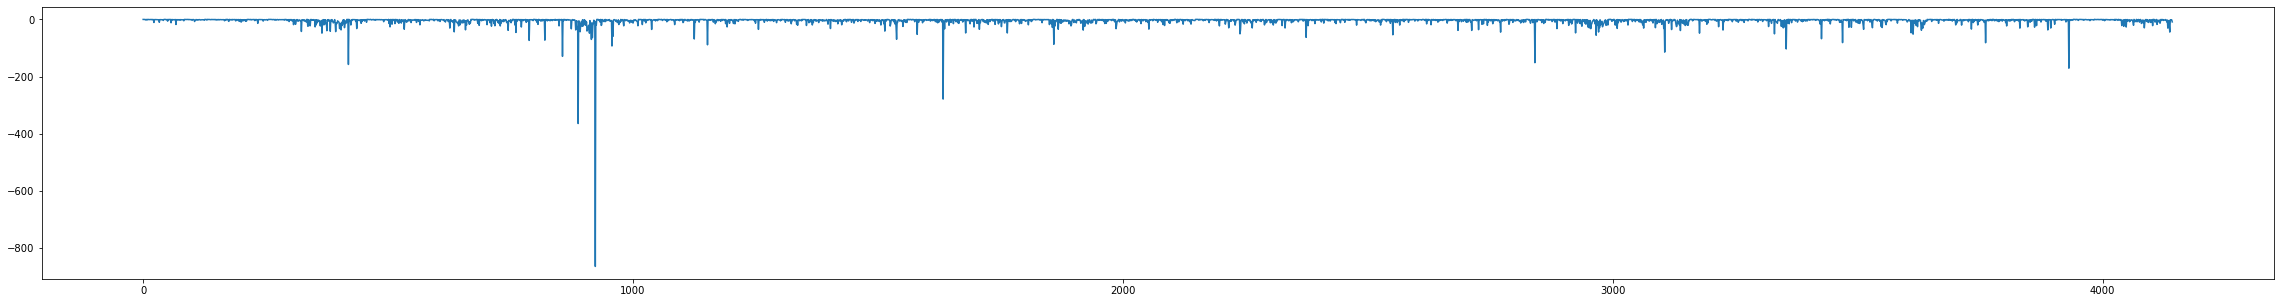

In [67]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(40,5))
plt.plot(np.arange(4143), [x.item() - y.item() for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
#plt.plot(np.arange(4143), [x.item() for x in ])

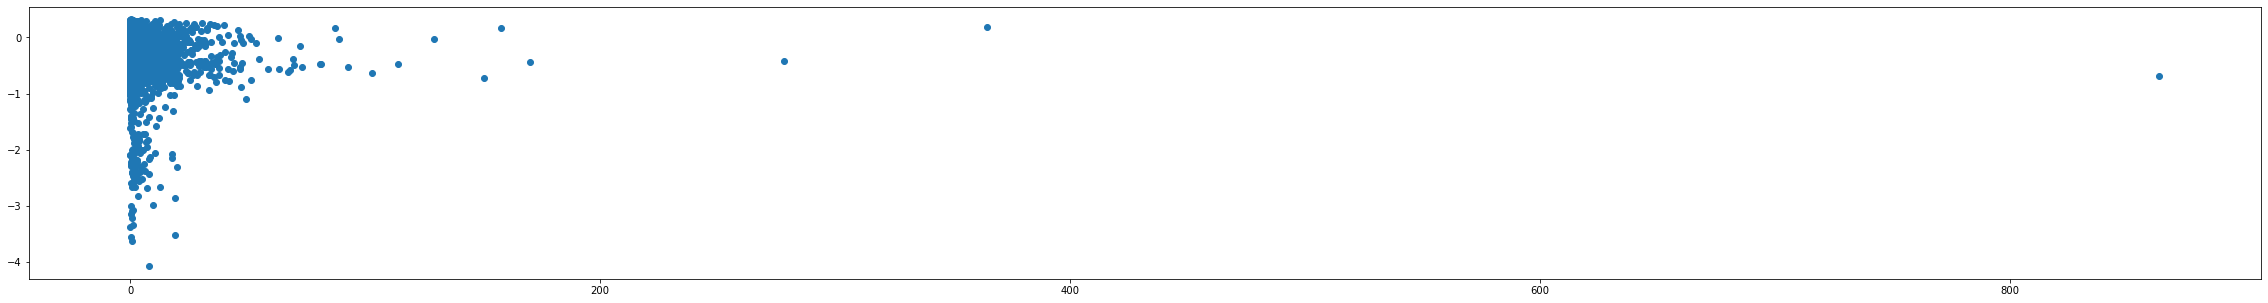

In [68]:
gt = [y.item() for y in y_test.reshape(-1)]
pred = [y.item() for y in pred_y.reshape(-1)]
plt.figure(figsize=(40,5))
plt.scatter(gt, pred)

In [69]:
r = np.corrcoef(gt, pred)
print (r)

import scipy.stats as stat
stat.pearsonr(gt, pred)
res = stat.linregress(gt, pred)
print (res)

[[ 1.         -0.01567202]
 [-0.01567202  1.        ]]
LinregressResult(slope=-0.00039644207018548367, intercept=-0.337836079303233, rvalue=-0.015672024335426613, pvalue=0.3132119682451594, stderr=0.0003930507977896021)


In [70]:
torch.mean(torch.abs((pred_y - y_test)))

tensor(4.7674, device='cuda:0', grad_fn=<MeanBackward0>)

In [71]:
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x7f54956a4d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5495621400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54956a49a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5495621ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5495621e20>],
 'means': []}

<Figure size 72x7200 with 0 Axes>

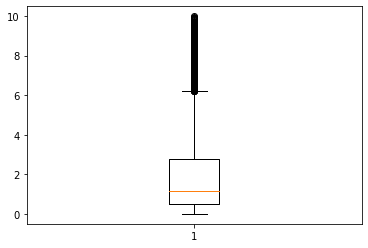

In [72]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1)) if np.abs(x.item() - y.item()) < 10])


[Text(1, 0, 'BEFORE')]

<Figure size 72x7200 with 0 Axes>

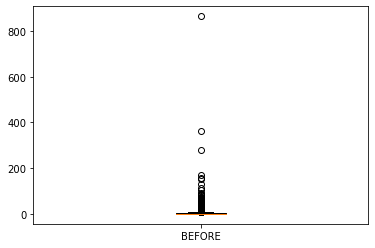

In [73]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [74]:
new_diff_list = diff_list[np.abs(diff_list) < 1*diff_list.std()]
(new_diff_list).mean()

2.7382073192559164

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5495661af0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f549566e220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5495661790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f549566e8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f549566ec40>],
 'means': []}

<Figure size 72x7200 with 0 Axes>

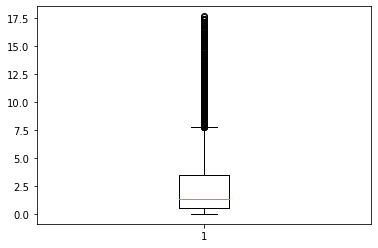

In [75]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot(new_diff_list)

In [76]:
diff_list = np.sort(diff_list)

In [77]:
q1 = np.percentile(diff_list, 25)
q3 = np.percentile(diff_list, 75)

In [78]:
q3

4.231547109782696

In [79]:
iqr = q3 - q1

In [80]:
outlier = 1.5*iqr

In [81]:
outlier

5.447239335626364

In [82]:
outlier

5.447239335626364

In [83]:
r = np.array([x for x in diff_list if (x > q1 - outlier and x < q3 +outlier)])
len(r)

3644

In [84]:
r.mean()

1.9870720124160144

In [85]:
r1 = np.array([x for x in diff_list if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

499

<ipython-input-86-51b7d7383511>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["AFTER"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f54955beb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54956820a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54955be730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54bc097ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54bc090700>],
 'means': []}

<Figure size 72x7200 with 0 Axes>

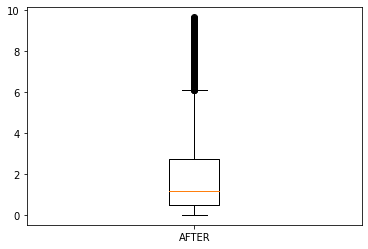

In [86]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r)

In [53]:
diff_list_L2 = np.array([np.sqrt(np.power(x.item() - y.item(), 2)) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])

In [70]:
diff_list_L2.mean()

5.806702988741026

In [75]:
diff_list_L1 = np.array([np.abs(np.abs(x.item()) - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])

In [76]:
diff_list_L1.mean()

5.806702988741026

In [74]:
(diff_list_L1 - diff_list_L2).sum()

0.0

# for bar plot

In [256]:
outlier_l1_after = 1.98#np.round(r.mean(), 2)

In [257]:
outlier_l1_before = 4.76#np.round(diff_list.mean(), 2)

In [258]:
outlier_l2_after = np.round(r.mean(), 2)

In [259]:
outlier_l2_before = np.round(diff_list.mean(), 2)

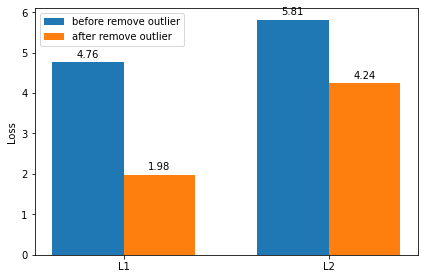

In [264]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['L1', 'L2']
before_list = [outlier_l1_before, outlier_l2_before]
after_list = [outlier_l1_after, outlier_l2_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [136]:
torch.save(deepmodel2.state_dict(), path+"mv_last_L1.pth")

In [24]:
### FIN

In [25]:
torch.save(deepmodel.state_dict(), path+"mv_last.pth")

In [26]:
##REAL FIN

In [77]:
abs_pred_y = torch.abs(pred_y)

In [78]:
torch.mean(torch.sqrt((abs_pred_y - y_test) ** 2))

tensor(5.8067, device='cuda:0', grad_fn=<MeanBackward0>)

In [55]:
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=8, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [56]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=b3e5664890071da03172721bf52ff133aff5f75bb935cbed79257a1ef2335310
  Stored in directory: /home/jihoon/.cache/pip/wheels/21/c4/af/3efa088be2f95b4953ed4bc8e39a4a95a82d19a7134a4c7a1b
Successfully built torchviz


In [114]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
cnt = 0
tot = []
for i in range(len(res)):
    if res[i] > 20:
        cnt+=1
        tot.append(res[i])
        


115


/home/jihoon/anaconda3/envs/iqn_torch/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


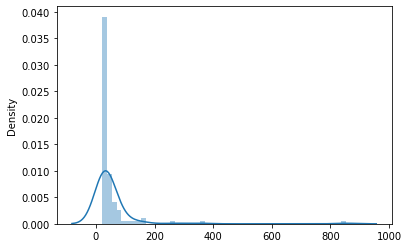

In [115]:
print(cnt)
sns.distplot(tot)

In [116]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
print(len(res))
last = []
for i in range(len(res)):
    if not res[i] > 20:
        last.append(res[i])
        


4143


In [117]:
len(last)

4028

In [118]:
np.mean(last)

4.502831545600565

In [78]:
!pip install seaborn
import seaborn as sns

     |████████████████████████████████| 285 kB 2.2 MB/s eta 0:00:01


/home/jihoon/anaconda3/envs/iqn_torch/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


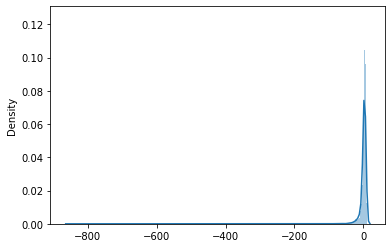

In [84]:
sns.distplot(res, bins=1000)

In [85]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/x.std(), axis=0)

In [87]:
res1 = np.array(res)
res1 = (res1 - res1.mean()) / res1.std()

/home/jihoon/anaconda3/envs/iqn_torch/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


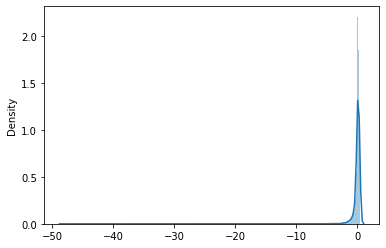

In [90]:
sns.distplot(res1, bins=1000)

In [29]:
df = pd.read_csv('test.csv')

# idx = df[df['TARIFF_AVG'].isnull()].index
# df = df.drop(idx)
# idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
# df = df.drop(idx)
df['TARIFF_AVG'] = df['TARIFF_AVG'].fillna(0.0)
df['TRADE_HSCD_COUNTRYCD'] = df['TRADE_HSCD_COUNTRYCD'].fillna(0.0)


hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = x+1
      break
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = x+1
      break

df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100

df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
df['gdp_percent'] = df['gdp_percent'] / 100
df['KMDIST'] = df['KMDIST']/10000

# arr = df['TRADE_HSCD_COUNTRYCD']

df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM', 'SNDIST', 'PA_NUS_FCRF'])
df = df.drop(columns=['SP_POP_TOTL', 'KR_TRADE_HSCD_COUNTRYCD','TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])
df['KR_TRADE_HSCD_COUNTRYCD'] = 0.0
df.head()

/home/jihoon/anaconda3/envs/iqn_torch/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,HSCD,COUNTRYCD,TARIFF_AVG,IC_BUS_EASE_DFRN_DB,KMDIST,item_total_percent,item_world_percent,gdp_percent,KR_TRADE_HSCD_COUNTRYCD
0,1,1,0.270,0.462269,0.995401,0.016089,0.030533,1.030812,0.0
1,1,2,0.012,0.807601,0.832965,0.200713,2.170310,1.078010,0.0
2,1,3,0.028,0.787069,0.828903,0.267390,2.248410,1.090732,0.0
3,1,4,0.028,0.721815,0.872211,0.166672,3.459023,1.081632,0.0
4,1,5,0.171,0.558015,1.836451,0.022029,0.183575,0.914026,0.0


In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1015)
device = torch.device("cuda")

x_test = torch.FloatTensor(df.iloc[:,:-1].values).to(device)


deepmodel = DeepModel(8, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"mv_last.pth"))
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=8, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
percent = (deepmodel(x_test) / 100).reshape(-1)

res = []
for i in range(len(percent)):
    res['KR_TRADE_HSCD_COUNTRYCD'].iloc[i] = (percent[i].item() * res['TRADE_HSCD_COUNTRYCD'].iloc[i])

In [ ]:
res = pd.read_csv('test.csv')


In [47]:
df.head()

,HSCD,COUNTRYCD,TARIFF_AVG,IC_BUS_EASE_DFRN_DB,KMDIST,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,0,12,30.0,46.109810,99.540098,0.007418,0.017537,106.355199,0.224130
1,0,36,0.0,80.223690,83.296523,0.192061,2.252181,109.954916,1.206797
2,0,40,0.0,78.856460,82.890293,0.272237,2.326404,105.477932,0.074098
3,0,56,0.0,72.409200,87.221143,0.173844,3.626739,105.666541,0.024586
4,0,76,18.0,55.382403,183.645059,0.020783,0.160822,114.876093,0.392121


In [46]:
df['KMDIST'].min()

9.55651062

In [41]:
y_test.max()

tensor(863.6414, device='cuda:0')

In [35]:
y_test.reshape(-1,1)

tensor([[0.1905],
        [0.0487],
        [0.0264],
        ...,
        [0.4124],
        [0.2739],
        [6.8481]], device='cuda:0')

In [40]:
pred_y.max()

tensor(47.1870, device='cuda:0', grad_fn=<MaxBackward1>)

In [ ]:
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-7)
n_epochs = 6000

for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel(x_train).to(device)
    cost = F.mse_loss(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
torch.mean((pred_y - y_test) ** 2)

In [ ]:
x_test.shape

In [ ]:
y_test.reshape(-1,1)

In [ ]:
pred_y

In [ ]:
df.iloc[tr+te:tr+te + 10]

In [ ]:
df['KMDIST']/100

In [ ]:
pred_y.min()

In [ ]:
x_test[:10]

In [ ]:
pd.options.display.float_format = '{:.5f}'.format
x_train

In [ ]:
class Test(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(Test, self).__init__()
    self.bn = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, out_channel)
  def forward(self, x):
    x = x.to(device)
    return self.bn(x)

  
m = Test(9,1).to(device)
m(x_train)

In [ ]:
df[df['percent'] == df['percent'].min()]

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
torch.mean((pred_y - y_test) ** 2)

In [ ]:
df.head()

In [ ]:
model(new_var)

In [ ]:
import torch

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values)

max(y_train)
# y_train = torch.reshape(y_train, (-1,1))


In [ ]:
W = torch.zeros((9,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W,b], lr=1e-5)

epochs = 1000
for epoch in range(epochs):
  hypothesis = (x_train.matmul(W) + b)
  cost = torch.mean((hypothesis - y_train) ** 2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if epoch % 50 == 0:
    print("Ep {} cost : {}".format(epoch, cost.item()))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
batch_size = 16
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 3

units = 16
output_size = 3358  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim), activation='relu')
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

In [ ]:
df_perc = df["percent"].copy()
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df_back = df.copy()
df = mean_norm(df)
df["percent"] = df_perc
df.head()

In [ ]:
import torch

x_train = np.array(df.iloc[:tr+te,:-1].values)
y_train = np.array(df.iloc[:tr+te,-1].values)
x_test = np.array(df.iloc[tr+te:,:-1].values)
y_test = np.array(df.iloc[tr+te:,-1].values)

max(y_train)

In [ ]:
## Linear Test Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
torch.manual_seed(1)

In [ ]:
x_train.shape

In [ ]:
x_train[0]

In [ ]:
model = nn.Linear(x_train.shape[1], 1)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
epochs = 20000

In [ ]:
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

y_train = y_train.reshape(-1,1)

for epoch in range(epochs+1):
    pred = model(x_train)
    
    cost = F.mse_loss(pred, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch : {}/{}, Cost = {}'.format(epoch, epochs, cost.item()))
        

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
new_var = torch.FloatTensor(df.iloc[2][:-1])
new_var = new_var.reshape(1,-1)
new_var

In [ ]:
pred_y = model(new_var)

In [ ]:
pred_y

In [ ]:
df.iloc[2][:-1]

In [ ]:
torch.FloatTensor(x_test[0]).reshape(1,-1)

In [ ]:
import math

err_sum = 0.0
for i in range(x_test.shape[0]):
    new_var = torch.FloatTensor(x_test[i]).reshape(1,-1)
    pred_y = model(new_var)
    err_val = y_test[i] - pred_y
    err_sum += np.sqrt(math.pow(err_val, 2))


In [ ]:
err_sum / x_test.shape[0]

In [ ]:
test_df = pd.read_csv(path + 'test.csv')
test_df.head()

In [ ]:
columns = ["HSCD","COUNTRYCD","TRADE_COUNTRYCD","TRADE_HSCD","TARIFF_AVG","SNDIST","NY_GDP_MKTP_CD","NY_GDP_MKTP_CD_1Y","SP_POP_TOTL","IC_BUS_EASE_DFRN_DB","KMDIST","TRADE_HSCD_COUNTRYCD","KR_TRADE_HSCD_COUNTRYCD"]
test_df = test_df[columns].copy()

test_df['SNDIST'] = test_df['SNDIST'].fillna(test_df['SNDIST'].mean())
test_df['TARIFF_AVG'] = test_df['TARIFF_AVG'].fillna(test_df['TARIFF_AVG'].mean())


test_df = test_df.drop('SNDIST', axis=1).copy()
test_df = test_df.drop('KMDIST', axis=1).copy()


In [ ]:
test_df.head()

In [ ]:
test_df = mean_norm(test_df)
x_test = np.array(test_df.iloc[:,:-2].values)
x_test[0]

In [ ]:
result = pd.read_csv(path + 'test.csv')
pd.options.display.float_format = '{:.5f}'.format
res = []
for i in range(x_test.shape[0]):
    new_var = torch.FloatTensor(x_test[i]).reshape(1,-1)
    pred_y = model(new_var)
    result["KR_TRADE_HSCD_COUNTRYCD"][i] = (result["TRADE_HSCD_COUNTRYCD"][i] * (float(pred_y)/100))



In [ ]:
result.to_csv(path+"filename.csv", mode='w')

In [ ]:
df.head()